# Open-Meteo API data Analysis (Las Vegas, NV)

In [25]:
# Notes :
# Location to be analyzed, located at similar Latitude and geographics, but has very different weather (rain precipitation):
#    a. Las Vegas (dry), coord: 36.1716° N, 115.1391° W
#    b. Nashville (wet), coord: 36.1627° N, 86.7816° W
###############################################################################################
import openmeteo_requests
import requests_cache
from retry_requests import retry
import pandas as pd

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://api.open-meteo.com/v1/forecast"
params = {
	"latitude": 36.175,
	"longitude": -115.1372,
	"hourly": ["temperature_2m", "relative_humidity_2m", "dew_point_2m", "apparent_temperature", "precipitation_probability", "precipitation", "rain", "showers", "pressure_msl", "surface_pressure", "cloud_cover", "cloud_cover_low", "cloud_cover_mid", "cloud_cover_high", "visibility", "wind_speed_10m", "soil_moisture_0_to_1cm", "soil_moisture_1_to_3cm", "soil_moisture_3_to_9cm", "soil_moisture_9_to_27cm", "soil_moisture_27_to_81cm", "evapotranspiration", "snowfall", "snow_depth", "et0_fao_evapotranspiration", "vapour_pressure_deficit", "wind_speed_80m", "wind_speed_120m", "wind_speed_180m", "wind_direction_10m", "wind_direction_80m", "wind_direction_120m", "wind_direction_180m", "temperature_80m", "temperature_120m", "temperature_180m", "soil_temperature_0cm", "soil_temperature_6cm", "soil_temperature_18cm", "soil_temperature_54cm", "wind_gusts_10m"],
	"past_days": 92,
	"forecast_days": 1
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()}{response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
hourly_dew_point_2m = hourly.Variables(2).ValuesAsNumpy()
hourly_apparent_temperature = hourly.Variables(3).ValuesAsNumpy()
hourly_precipitation_probability = hourly.Variables(4).ValuesAsNumpy()
hourly_precipitation = hourly.Variables(5).ValuesAsNumpy()
hourly_rain = hourly.Variables(6).ValuesAsNumpy()
hourly_showers = hourly.Variables(7).ValuesAsNumpy()
hourly_pressure_msl = hourly.Variables(8).ValuesAsNumpy()
hourly_surface_pressure = hourly.Variables(9).ValuesAsNumpy()
hourly_cloud_cover = hourly.Variables(10).ValuesAsNumpy()
hourly_cloud_cover_low = hourly.Variables(11).ValuesAsNumpy()
hourly_cloud_cover_mid = hourly.Variables(12).ValuesAsNumpy()
hourly_cloud_cover_high = hourly.Variables(13).ValuesAsNumpy()
hourly_visibility = hourly.Variables(14).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(15).ValuesAsNumpy()
hourly_soil_moisture_0_to_1cm = hourly.Variables(16).ValuesAsNumpy()
hourly_soil_moisture_1_to_3cm = hourly.Variables(17).ValuesAsNumpy()
hourly_soil_moisture_3_to_9cm = hourly.Variables(18).ValuesAsNumpy()
hourly_soil_moisture_9_to_27cm = hourly.Variables(19).ValuesAsNumpy()
hourly_soil_moisture_27_to_81cm = hourly.Variables(20).ValuesAsNumpy()
hourly_evapotranspiration = hourly.Variables(21).ValuesAsNumpy()
hourly_snowfall = hourly.Variables(22).ValuesAsNumpy()
hourly_snow_depth = hourly.Variables(23).ValuesAsNumpy()
hourly_et0_fao_evapotranspiration = hourly.Variables(24).ValuesAsNumpy()
hourly_vapour_pressure_deficit = hourly.Variables(25).ValuesAsNumpy()
hourly_wind_speed_80m = hourly.Variables(26).ValuesAsNumpy()
hourly_wind_speed_120m = hourly.Variables(27).ValuesAsNumpy()
hourly_wind_speed_180m = hourly.Variables(28).ValuesAsNumpy()
hourly_wind_direction_10m = hourly.Variables(29).ValuesAsNumpy()
hourly_wind_direction_80m = hourly.Variables(30).ValuesAsNumpy()
hourly_wind_direction_120m = hourly.Variables(31).ValuesAsNumpy()
hourly_wind_direction_180m = hourly.Variables(32).ValuesAsNumpy()
hourly_temperature_80m = hourly.Variables(33).ValuesAsNumpy()
hourly_temperature_120m = hourly.Variables(34).ValuesAsNumpy()
hourly_temperature_180m = hourly.Variables(35).ValuesAsNumpy()
hourly_soil_temperature_0cm = hourly.Variables(36).ValuesAsNumpy()
hourly_soil_temperature_6cm = hourly.Variables(37).ValuesAsNumpy()
hourly_soil_temperature_18cm = hourly.Variables(38).ValuesAsNumpy()
hourly_soil_temperature_54cm = hourly.Variables(39).ValuesAsNumpy()
hourly_wind_gusts_10m = hourly.Variables(40).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}

hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m
hourly_data["dew_point_2m"] = hourly_dew_point_2m
hourly_data["apparent_temperature"] = hourly_apparent_temperature
hourly_data["precipitation_probability"] = hourly_precipitation_probability
hourly_data["precipitation"] = hourly_precipitation
hourly_data["rain"] = hourly_rain
hourly_data["showers"] = hourly_showers
hourly_data["pressure_msl"] = hourly_pressure_msl
hourly_data["surface_pressure"] = hourly_surface_pressure
hourly_data["cloud_cover"] = hourly_cloud_cover
hourly_data["cloud_cover_low"] = hourly_cloud_cover_low
hourly_data["cloud_cover_mid"] = hourly_cloud_cover_mid
hourly_data["cloud_cover_high"] = hourly_cloud_cover_high
hourly_data["visibility"] = hourly_visibility
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m
hourly_data["soil_moisture_0_to_1cm"] = hourly_soil_moisture_0_to_1cm
hourly_data["soil_moisture_1_to_3cm"] = hourly_soil_moisture_1_to_3cm
hourly_data["soil_moisture_3_to_9cm"] = hourly_soil_moisture_3_to_9cm
hourly_data["soil_moisture_9_to_27cm"] = hourly_soil_moisture_9_to_27cm
hourly_data["soil_moisture_27_to_81cm"] = hourly_soil_moisture_27_to_81cm
hourly_data["evapotranspiration"] = hourly_evapotranspiration
hourly_data["snowfall"] = hourly_snowfall
hourly_data["snow_depth"] = hourly_snow_depth
hourly_data["et0_fao_evapotranspiration"] = hourly_et0_fao_evapotranspiration
hourly_data["vapour_pressure_deficit"] = hourly_vapour_pressure_deficit
hourly_data["wind_speed_80m"] = hourly_wind_speed_80m
hourly_data["wind_speed_120m"] = hourly_wind_speed_120m
hourly_data["wind_speed_180m"] = hourly_wind_speed_180m
hourly_data["wind_direction_10m"] = hourly_wind_direction_10m
hourly_data["wind_direction_80m"] = hourly_wind_direction_80m
hourly_data["wind_direction_120m"] = hourly_wind_direction_120m
hourly_data["wind_direction_180m"] = hourly_wind_direction_180m
hourly_data["temperature_80m"] = hourly_temperature_80m
hourly_data["temperature_120m"] = hourly_temperature_120m
hourly_data["temperature_180m"] = hourly_temperature_180m
hourly_data["soil_temperature_0cm"] = hourly_soil_temperature_0cm
hourly_data["soil_temperature_6cm"] = hourly_soil_temperature_6cm
hourly_data["soil_temperature_18cm"] = hourly_soil_temperature_18cm
hourly_data["soil_temperature_54cm"] = hourly_soil_temperature_54cm
hourly_data["wind_gusts_10m"] = hourly_wind_gusts_10m

hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)

Coordinates 36.16437911987305°N -115.1439208984375°E
Elevation 609.0 m asl
Timezone NoneNone
Timezone difference to GMT+0 0 s
                          date  temperature_2m  relative_humidity_2m  \
0    2025-03-01 00:00:00+00:00             NaN                   NaN   
1    2025-03-01 01:00:00+00:00             NaN                   NaN   
2    2025-03-01 02:00:00+00:00             NaN                   NaN   
3    2025-03-01 03:00:00+00:00             NaN                   NaN   
4    2025-03-01 04:00:00+00:00             NaN                   NaN   
...                        ...             ...                   ...   
2227 2025-06-01 19:00:00+00:00       39.169502                  11.0   
2228 2025-06-01 20:00:00+00:00       39.219501                  11.0   
2229 2025-06-01 21:00:00+00:00       39.269501                  12.0   
2230 2025-06-01 22:00:00+00:00       39.219501                  12.0   
2231 2025-06-01 23:00:00+00:00       38.669502                  12.0   

      dew

In [26]:
# Store the data into the CSV file
path1 = r'C:\PAULDATA\Paulus_Data_Analyst\Portfolio_Projects\Global_Weather\openmeteo_data_lasvegas_nv.csv'
hourly_dataframe.to_csv(path1, header='column_names')

   longitude  latitude  value                   geometry
0  -115.1391   36.1716     10  POINT (-115.1391 36.1716)
1   -86.7816   36.1627     20   POINT (-86.7816 36.1627)


<Axes: title={'center': 'Geolocation of Las Vegas and Nashville'}>

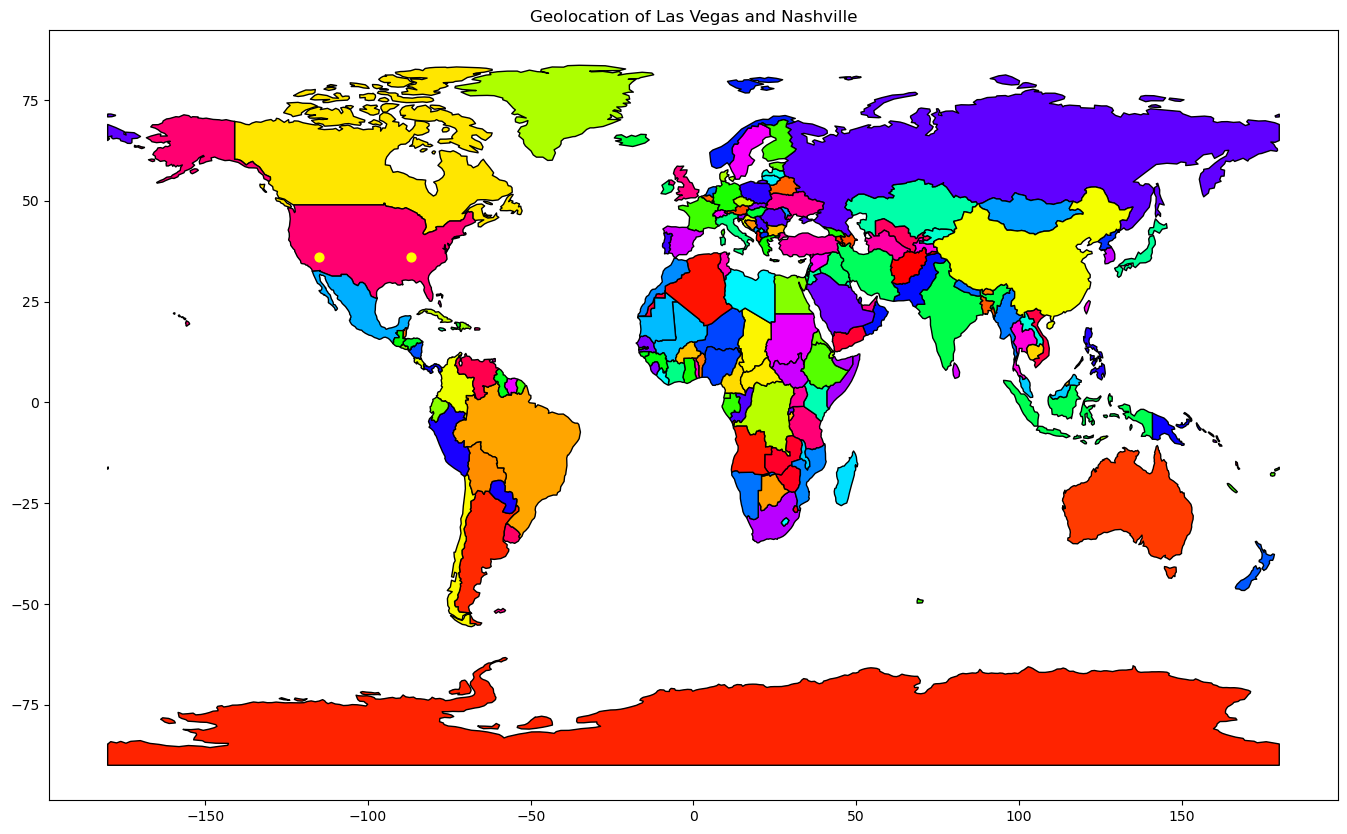

In [3]:
# Visualize geolocation by Latitude and Longitude of Las Vegas and Nashville
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,10)

# Load a world map shapefile (built-in dataset)
world = gpd.read_file(r'C:\PAULDATA\Paulus_Data_Analyst\Portfolio_Projects\110m_cultural\ne_110m_admin_0_countries.shp')
worldpop = gpd.read_file(r'C:\PAULDATA\Paulus_Data_Analyst\Portfolio_Projects\110m_cultural\ne_110m_populated_places.shp')

#    a. Las Vegas (dry), coord: 36.1716° N, 115.1391° W
#    b. Nashville (wet), coord: 36.1627° N, 86.7816° W

data = {'longitude': [-115.1391, -86.7816],
        'latitude': [36.1716, 36.1627],
        'value': [10, 20]}

df = pd.DataFrame(data)

# Create geometry column
geometry = gpd.points_from_xy(df['longitude'], df['latitude'], crs="EPSG:4326")

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

print(gdf)

usapop = worldpop[worldpop['ADM0NAME'] == 'United States of America']

# # Plotting multiple layers
fig, ax = plt.subplots()
plt.title('Geolocation of Las Vegas and Nashville')
world.plot(ax = ax, cmap = 'hsv', edgecolor = 'black', column = 'SOVEREIGNT')
gdf.plot(ax = ax, color = 'yellow', markersize = 40)  # The location of Las Vegas and Nashville can be seen as yellow dots in the map

C:\Users\Paulus Hendarwan\AppData\Roaming\Python\Python312\site-packages\geopandas\geodataframe.py:1981: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Paulus Hendarwan\AppData\Roaming\Python\Python312\site-packages\geopandas\geodataframe.py:1981: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

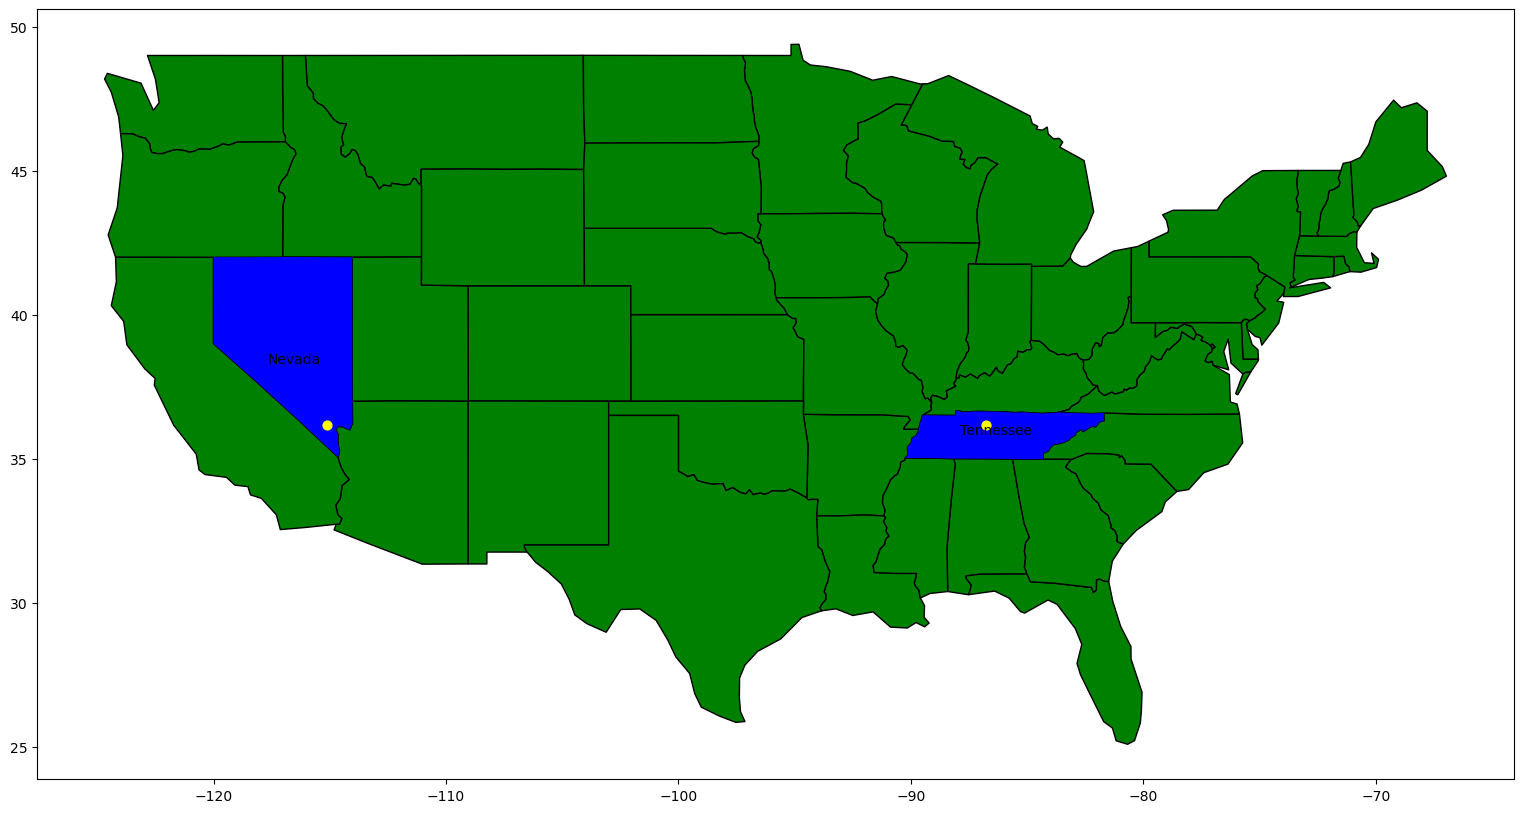

In [4]:
# Visualize Las Vegas (and Nevada) and Nashville (and Tennessee)
# States are depicted with blue color
# Cities are depicted with yellow color
stateprov = gpd.read_file(r'C:\PAULDATA\Paulus_Data_Analyst\Portfolio_Projects\110m_cultural\ne_110m_admin_1_states_provinces.shp')

usamain = stateprov[stateprov["name"] != "Alaska"]
usamain = usamain[usamain["name"] != "Hawaii"]
nevada = stateprov[stateprov["name"] == "Nevada"]
tennessee = stateprov[stateprov["name"] == "Tennessee"]

nevada['coords'] = nevada['geometry'].apply(lambda x: x.representative_point().coords[:])
nevada['coords'] = [coords[0] for coords in nevada['coords']]
tennessee['coords'] = tennessee['geometry'].apply(lambda x: x.representative_point().coords[:])
tennessee['coords'] = [coords[0] for coords in tennessee['coords']]

# # Plotting multiple layers
fig, ax = plt.subplots()

for idx, row in nevada.iterrows():
    plt.annotate(text=row['name'], xy=row['coords'],
                 horizontalalignment='center')

for idx, row in tennessee.iterrows():
    plt.annotate(text=row['name'], xy=row['coords'],
                 horizontalalignment='center')

usamain.plot(ax = ax, color='green', edgecolor = 'black')
nevada.plot(ax = ax, color = 'blue', markersize = 40)
tennessee.plot(ax = ax, color = 'blue', markersize = 40)
gdf.plot(ax = ax, color = 'yellow', markersize = 40)

In [1]:
# Maps of Las Vegas
import pandas as pd
import geopandas as gpd
gdf = gpd.read_file(r"C:\PAULDATA\Paulus_Data_Analyst\Portfolio_Projects\cities.geojson")
lasvegasdf = gdf.loc[gdf['NAME'].isin(['LAS VEGAS'])]

# Remove all unwanted Las Vegases, just leave the one with Index 19199, Las Vegas in Nevada state.
# We use drop Method coz this Method doesn't change the GeoDataframe into Series.
# If we use .iloc or .loc Method, it will change the GeoDataframe into Series.
lasvegasdf = lasvegasdf.drop(19212)
lasvegasdf = lasvegasdf.drop(24676)

lasvegasdf.explore()

In [1]:
# Read from the CSV file
import pandas as pd
import matplotlib.pyplot as plt
path1 = r'C:\PAULDATA\Paulus_Data_Analyst\Portfolio_Projects\Global_Weather\openmeteo_data_lasvegas_nv.csv'
df1 = pd.read_csv(path1)
df1

Unnamed: 0                       date  temperature_2m  \
0              0  2025-03-01 00:00:00+00:00             NaN   
1              1  2025-03-01 01:00:00+00:00             NaN   
2              2  2025-03-01 02:00:00+00:00             NaN   
3              3  2025-03-01 03:00:00+00:00             NaN   
4              4  2025-03-01 04:00:00+00:00             NaN   
...          ...                        ...             ...   
2227        2227  2025-06-01 19:00:00+00:00       39.169502   
2228        2228  2025-06-01 20:00:00+00:00       39.219500   
2229        2229  2025-06-01 21:00:00+00:00       39.269500   
2230        2230  2025-06-01 22:00:00+00:00       39.219500   
2231        2231  2025-06-01 23:00:00+00:00       38.669502   

      relative_humidity_2m  dew_point_2m  apparent_temperature  \
0                      NaN           NaN                   NaN   
1                      NaN           NaN                   NaN   
2                      NaN           NaN                   NaN   
3                      NaN           NaN                   NaN   
4                      NaN           NaN                   NaN   
...                    ...           ...                   ...   
2227                  11.0      3.341017             36.008010   
2228                  11.0      3.379128             35.056602   
2229                  12.0      4.657262             36.113987   
2230                  12.0      4.618772             35.940290   
2231                  12.0      4.195249             33.902687   

      precipitation_probability  precipitation  rain  showers  ...  \
0                           0.0            NaN   NaN      NaN  ...   
1                           0.0            NaN   NaN      NaN  ...   
2                           0.0            NaN   NaN      NaN  ...   
3                           0.0            NaN   NaN      NaN  ...   
4                           0.0            NaN   NaN      NaN  ...   
...                         ...            ...   ...      ...  ...   
2227                        1.0            0.0   0.0      0.0  ...   
2228                        1.0            0.0   0.0      0.0  ...   
2229                        2.0            0.0   0.0      0.0  ...   
2230                        2.0            0.0   0.0      0.0  ...   
2231                        3.0            0.0   0.0      0.0  ...   

      wind_direction_120m  wind_direction_180m  temperature_80m  \
0                     NaN                  NaN              NaN   
1                     NaN                  NaN              NaN   
2                     NaN                  NaN              NaN   
3                     NaN                  NaN              NaN   
4                     NaN                  NaN              NaN   
...                   ...                  ...              ...   
2227            169.07724            159.90468        34.609997   
2228            179.42130            187.12492        35.059998   
2229            235.30478            210.73541        34.809998   
2230            222.01846            217.71605        34.059998   
2231            182.62234            216.38445        32.859997   

      temperature_120m  temperature_180m  soil_temperature_0cm  \
0                  NaN               NaN                   NaN   
1                  NaN               NaN                   NaN   
2                  NaN               NaN                   NaN   
3                  NaN               NaN                   NaN   
4                  NaN               NaN                   NaN   
...                ...               ...                   ...   
2227         34.359997         32.564000             45.114000   
2228         34.809998         32.963997             44.114000   
2229         34.559998         32.864000             44.364000   
2230         33.809998         32.764000             42.963997   
2231         32.609997         32.764000             42.413998   

      soil_temper

In [2]:
# Remove Duplicate data from raw table
df1 = df1.drop_duplicates()

# Drop/remove all entries with blanks
# df.dropna(subset='temperature_2m', inplace=True)
# df.dropna(subset='relative_humidity_2m', inplace=True)
df1.dropna(inplace=True)

In [3]:
# Set to display all columns
pd.set_option('display.max_columns',None)
plt.rcParams['figure.figsize'] = (12, 8)

# Check whether there's still any blank rows/columns
df1[df1.isna().any(axis=1)]

Empty DataFrame
Columns: [Unnamed: 0, date, temperature_2m, relative_humidity_2m, dew_point_2m, apparent_temperature, precipitation_probability, precipitation, rain, showers, pressure_msl, surface_pressure, cloud_cover, cloud_cover_low, cloud_cover_mid, cloud_cover_high, visibility, wind_speed_10m, soil_moisture_0_to_1cm, soil_moisture_1_to_3cm, soil_moisture_3_to_9cm, soil_moisture_9_to_27cm, soil_moisture_27_to_81cm, evapotranspiration, snowfall, snow_depth, et0_fao_evapotranspiration, vapour_pressure_deficit, wind_speed_80m, wind_speed_120m, wind_speed_180m, wind_direction_10m, wind_direction_80m, wind_direction_120m, wind_direction_180m, temperature_80m, temperature_120m, temperature_180m, soil_temperature_0cm, soil_temperature_6cm, soil_temperature_18cm, soil_temperature_54cm, wind_gusts_10m]
Index: []

In [4]:
# Add Column 'Location'
df1['Location'] = 'Las Vegas'

# Split the Date into Year, Month and Date
df1[['ymd','hmstz']] = df1['date'].str.split(' ', expand=True)
df1[['year','month','day']] = df1['ymd'].str.split('-', expand=True)
df1[['hour','minute','sectz','tzsec']] = df1['hmstz'].str.split(':', expand=True)

In [5]:
df1

Unnamed: 0                       date  temperature_2m  \
437          437  2025-03-19 05:00:00+00:00       14.459500   
438          438  2025-03-19 06:00:00+00:00       13.459500   
439          439  2025-03-19 07:00:00+00:00       12.659500   
440          440  2025-03-19 08:00:00+00:00       12.159500   
441          441  2025-03-19 09:00:00+00:00       11.559500   
...          ...                        ...             ...   
2227        2227  2025-06-01 19:00:00+00:00       39.169502   
2228        2228  2025-06-01 20:00:00+00:00       39.219500   
2229        2229  2025-06-01 21:00:00+00:00       39.269500   
2230        2230  2025-06-01 22:00:00+00:00       39.219500   
2231        2231  2025-06-01 23:00:00+00:00       38.669502   

      relative_humidity_2m  dew_point_2m  apparent_temperature  \
437                   14.0    -12.757421              8.626808   
438                   17.0    -11.145491              8.152900   
439                   20.0     -9.752880              7.904532   
440                   21.0     -9.549829              7.835932   
441                   22.0     -9.461175              7.294112   
...                    ...           ...                   ...   
2227                  11.0      3.341017             36.008010   
2228                  11.0      3.379128             35.056602   
2229                  12.0      4.657262             36.113987   
2230                  12.0      4.618772             35.940290   
2231                  12.0      4.195249             33.902687   

      precipitation_probability  precipitation  rain  showers  pressure_msl  \
437                         0.0            0.0   0.0      0.0        1024.6   
438                         0.0            0.0   0.0      0.0        1025.4   
439                         0.0            0.0   0.0      0.0        1026.2   
440                         0.0            0.0   0.0      0.0        1026.8   
441                         0.0            0.0   0.0      0.0        1027.4   
...                         ...            ...   ...      ...           ...   
2227                        1.0            0.0   0.0      0.0        1005.9   
2228                        1.0            0.0   0.0      0.0        1005.2   
2229                        2.0            0.0   0.0      0.0        1004.7   
2230                        2.0            0.0   0.0      0.0        1003.7   
2231                        3.0            0.0   0.0      0.0        1003.6   

      surface_pressure  cloud_cover  cloud_cover_low  cloud_cover_mid  \
437          953.57040          0.0              0.0              0.0   
438          954.07745          0.0              0.0              0.0   
439          954.63040          0.0              0.0              0.0   
440          955.06824          0.0              0.0              0.0   
441          955.48145          0.0              0.0              0.0   
...                ...          ...              ...              ...   
2227         941.46960        100.0              0.0              1.0   
2228         940.82416        100.0              0.0              0.0   
2229         940.36640        100.0              0.0              5.0   
2230         939.42020         55.0              0.0              0.0   
2231         939.21796         76.0              0.0              0.0   

      cloud_cover_high  visibility  wind_speed_10m  soil_moisture_0_to_1cm  \
437                0.0     24140.0       16.343367                   0.038   
438                0.0     24140.0       13.493999                   0.038   
439                0.0     24140.0       10.440000                   0.038   
440                0.0     24140.0        7.594208                   0.038   
441                0.0     24140.0        7.244860                   0.038   
...                ...         ...             ...                     ...   
2227             100.0     90000.0       23.950148                   0.032   
2228  

In [6]:
# Find out the correlation among Columns to filter what Columns we'll use for analysis
# For first glance, we filter out by common logic, what Columns are possible to have strong enough correlations.
# We choose a bunch of Columns specified with Index numbers.
df1h = df1[['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','relative_humidity_2m',
            'dew_point_2m','vapour_pressure_deficit','temperature_2m','cloud_cover_high','cloud_cover_low','wind_speed_10m',
            'soil_moisture_3_to_9cm','temperature_80m','soil_temperature_0cm']]
df1h

precipitation_probability  cloud_cover_mid  soil_moisture_0_to_1cm  \
437                         0.0              0.0                   0.038   
438                         0.0              0.0                   0.038   
439                         0.0              0.0                   0.038   
440                         0.0              0.0                   0.038   
441                         0.0              0.0                   0.038   
...                         ...              ...                     ...   
2227                        1.0              1.0                   0.032   
2228                        1.0              0.0                   0.032   
2229                        2.0              5.0                   0.031   
2230                        2.0              0.0                   0.031   
2231                        3.0              0.0                   0.031   

      soil_moisture_1_to_3cm  relative_humidity_2m  dew_point_2m  \
437                    0.067                  14.0    -12.757421   
438                    0.067                  17.0    -11.145491   
439                    0.067                  20.0     -9.752880   
440                    0.067                  21.0     -9.549829   
441                    0.067                  22.0     -9.461175   
...                      ...                   ...           ...   
2227                   0.076                  11.0      3.341017   
2228                   0.076                  11.0      3.379128   
2229                   0.076                  12.0      4.657262   
2230                   0.076                  12.0      4.618772   
2231                   0.076                  12.0      4.195249   

      vapour_pressure_deficit  temperature_2m  cloud_cover_high  \
437                  1.417936       14.459500               0.0   
438                  1.282614       13.459500               0.0   
439                  1.173374       12.659500               0.0   
440                  1.121307       12.159500               0.0   
441                  1.064184       11.559500               0.0   
...                       ...             ...               ...   
2227                 6.279035       39.169502             100.0   
2228                 6.295875       39.219500             100.0   
2229                 6.241590       39.269500             100.0   
2230                 6.224906       39.219500              55.0   
2231                 6.043872       38.669502              76.0   

      cloud_cover_low  wind_speed_10m  soil_moisture_3_to_9cm  \
437               0.0       16.343367                   0.100   
438               0.0       13.493999                   0.100   
439               0.0       10.440000                   0.100   
440               0.0        7.594208                   0.100   
441               0.0        7.244860                   0.100   
...               ...             ...                     ...   
2227              0.0       23.950148                   0.105   
2228              0.0       29.686360                   0.105   
2229              0.0       25.499080                   0.105   
2230              0.0       24.485292                   0.105   
2231              0.0       29.810522                   0.105   

      temperature_80m  soil_temperature_0cm  
437         12.460000              9.714001  
438         12.010000              9.264000  
439         11.460000              8.164001  
440         10.760000              6.914000  
441         10.460000              5.864000  
...               ...                   ...  
2227        34.609997             45.114000  
2228        35.059998             44.114000  
2229        34.809998             44.364000  
2230        34.059998             42.963997  
2231        32.859997             42.413998  

[1795 rows x 14 columns]

In [7]:
# Create a Function to generate sorted, limited Correlation Table of a certain Column/parameter
def gencorr(param):
    df1hcorr = df1h.corr(numeric_only=True).abs().sort_values(by=param, ascending=False)
    df1hcorr = df1hcorr.where(df1hcorr[param] > 0.5)
    df1hcorr = df1hcorr.dropna()
    corresult = df1hcorr[param].round(2)
    return corresult

In [8]:
# Generate Correlation Table for 'temperature_2m'
gencorr('temperature_2m')

temperature_2m             1.00
vapour_pressure_deficit    0.96
temperature_80m            0.93
soil_temperature_0cm       0.84
relative_humidity_2m       0.57
Name: temperature_2m, dtype: float64

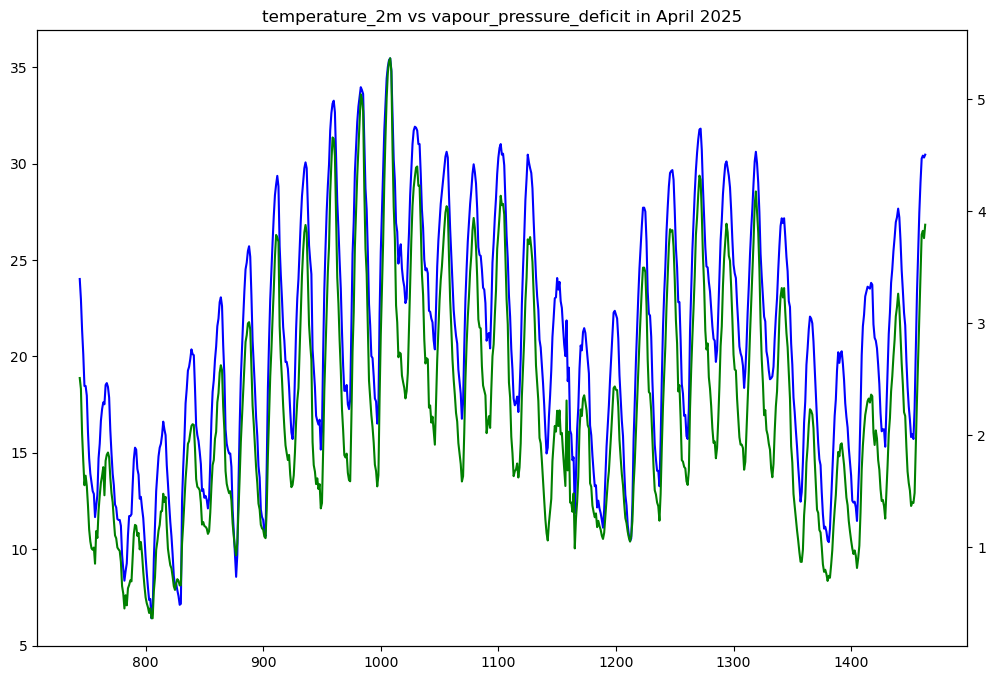

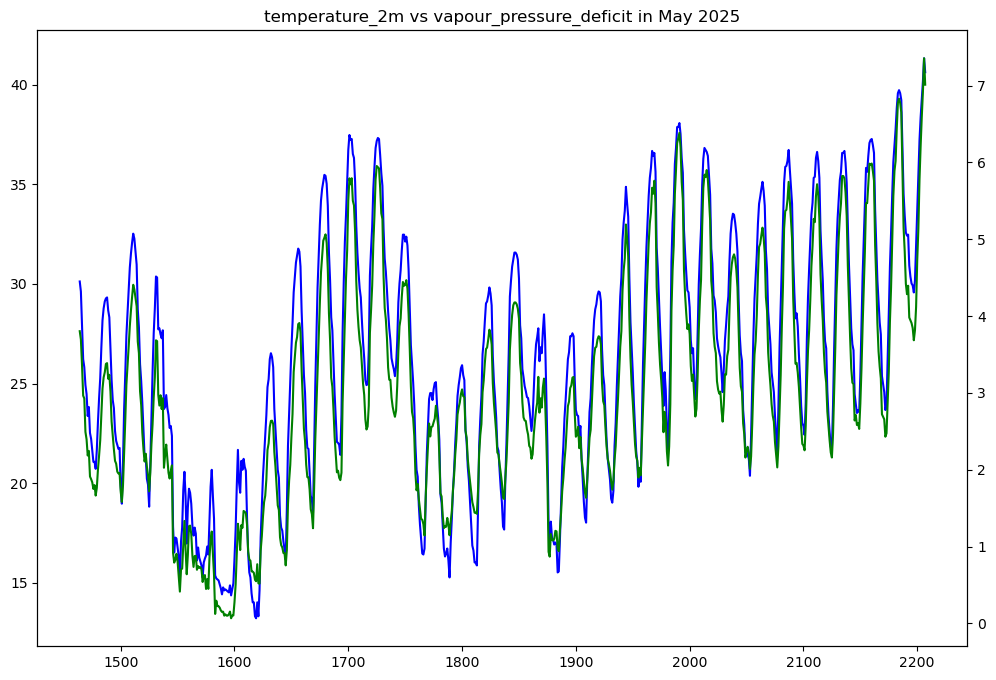

In [9]:
# Draw plot of the most correlated column (vapour_pressure_deficit) with 'temperature_2m' with dual y-axis plot.
# The 'temperature_2m' and 'vapour_pressure_deficit' fluctuations for the most part are similar except at several points.
df04 = df1.where(df1['month'] == '04').dropna()
df05 = df1.where(df1['month'] == '05').dropna()

import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
plt.title('temperature_2m vs vapour_pressure_deficit in April 2025')
ax1.plot(df04[['temperature_2m']], color='blue')
ax2 = ax1.twinx()
ax2.plot(df04[['vapour_pressure_deficit']], color='green', label='Data 2')

fig, ax1 = plt.subplots()
plt.title('temperature_2m vs vapour_pressure_deficit in May 2025')
ax1.plot(df05[['temperature_2m']], color='blue', label='Data 1')
ax2 = ax1.twinx()
ax2.plot(df05[['vapour_pressure_deficit']], color='green', label='Data 2')

array([<Axes: >], dtype=object)

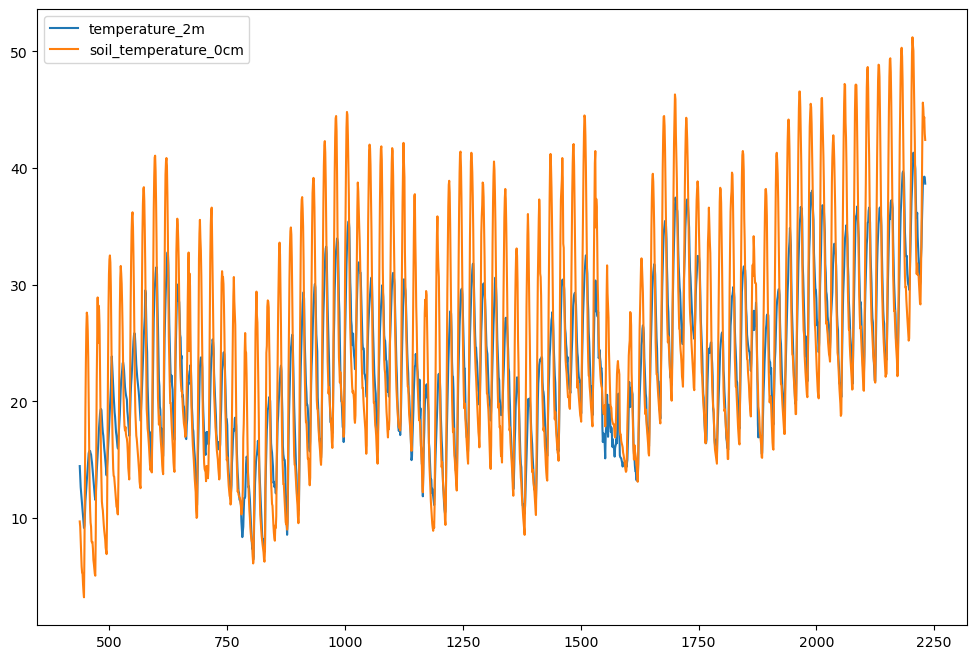

In [10]:
# Draw plot of the most correlated columns (soil_temperature_0cm) with 'temperature_2m' in single y-axis plot.
# For the most part of the Plot, the fluctuation of the 'soil_temperature_0cm' is similar except on several points.
df1[['temperature_2m','soil_temperature_0cm']].plot(subplots=[('temperature_2m','soil_temperature_0cm')])

In [11]:
# Generate Correlation Table for 'relative_humidity_2m'
gencorr('relative_humidity_2m')

relative_humidity_2m         1.00
dew_point_2m                 0.73
soil_moisture_0_to_1cm       0.68
vapour_pressure_deficit      0.66
cloud_cover_low              0.64
temperature_80m              0.59
temperature_2m               0.57
precipitation_probability    0.56
Name: relative_humidity_2m, dtype: float64

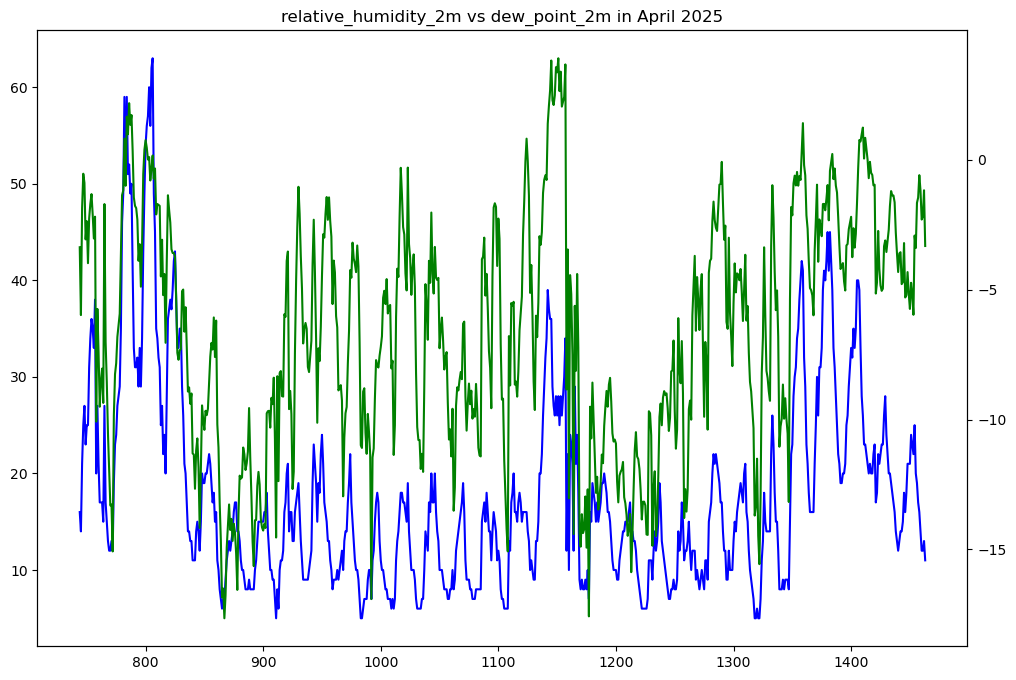

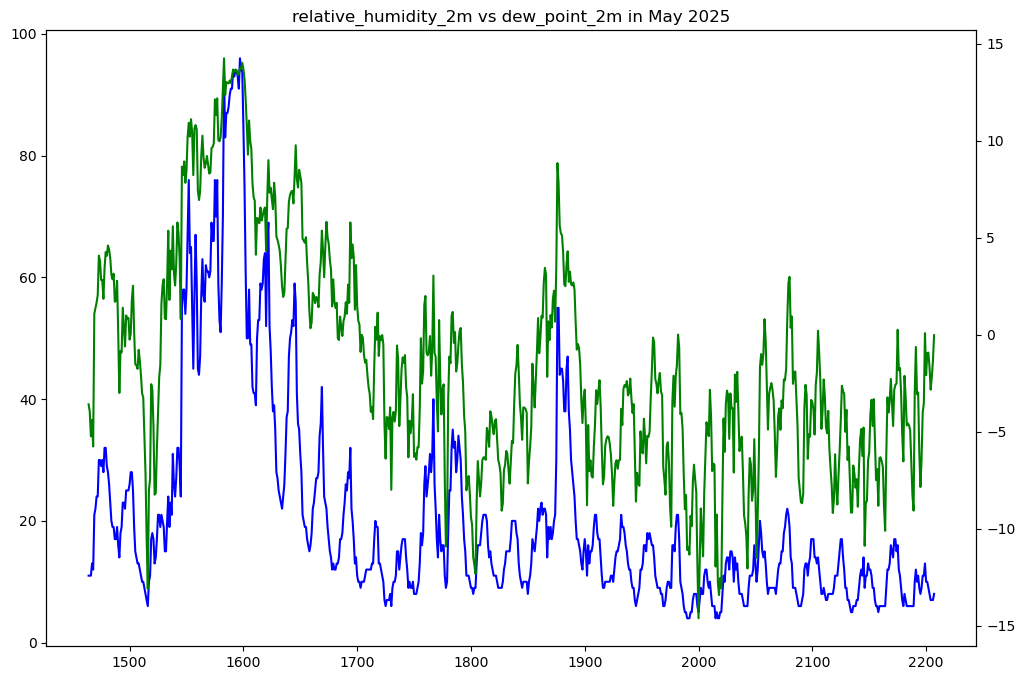

In [12]:
# Draw plot of the most correlated column (dew_point_2m) with 'relative_humidity_2m'
# The relative_humidity_2m values fluctuations for the most part are similar to dew_point_2m except at several points.
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
plt.title('relative_humidity_2m vs dew_point_2m in April 2025')
ax1.plot(df04[['relative_humidity_2m']], color='blue')
ax2 = ax1.twinx()
ax2.plot(df04[['dew_point_2m']], color='green', label='Data 2')

fig, ax1 = plt.subplots()
plt.title('relative_humidity_2m vs dew_point_2m in May 2025')
ax1.plot(df05[['relative_humidity_2m']], color='blue', label='Data 1')
ax2 = ax1.twinx()
ax2.plot(df05[['dew_point_2m']], color='green', label='Data 2')

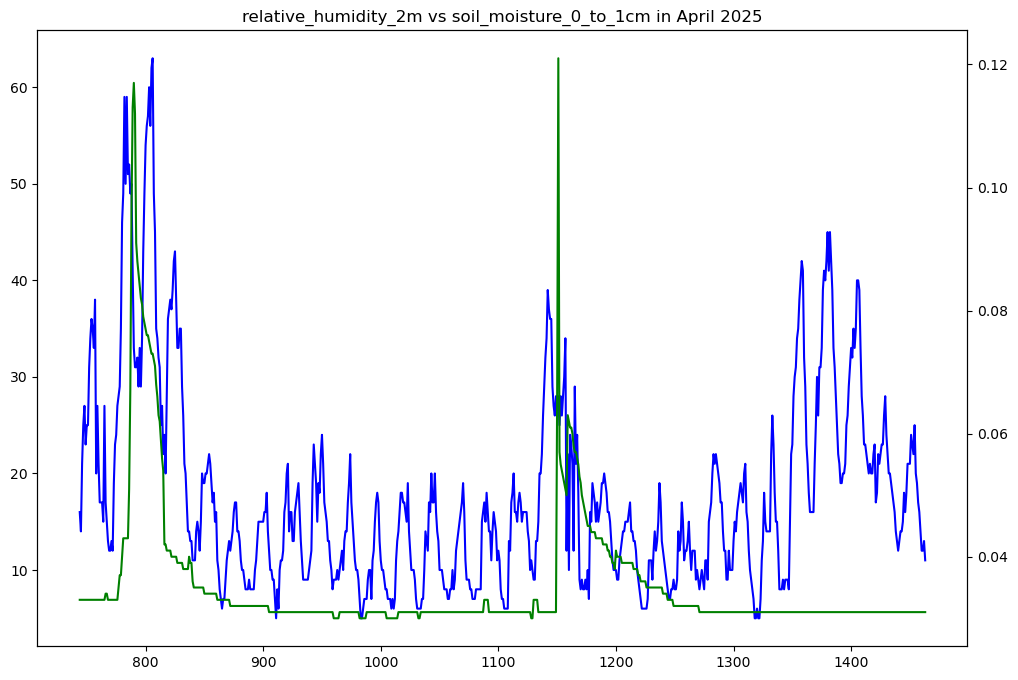

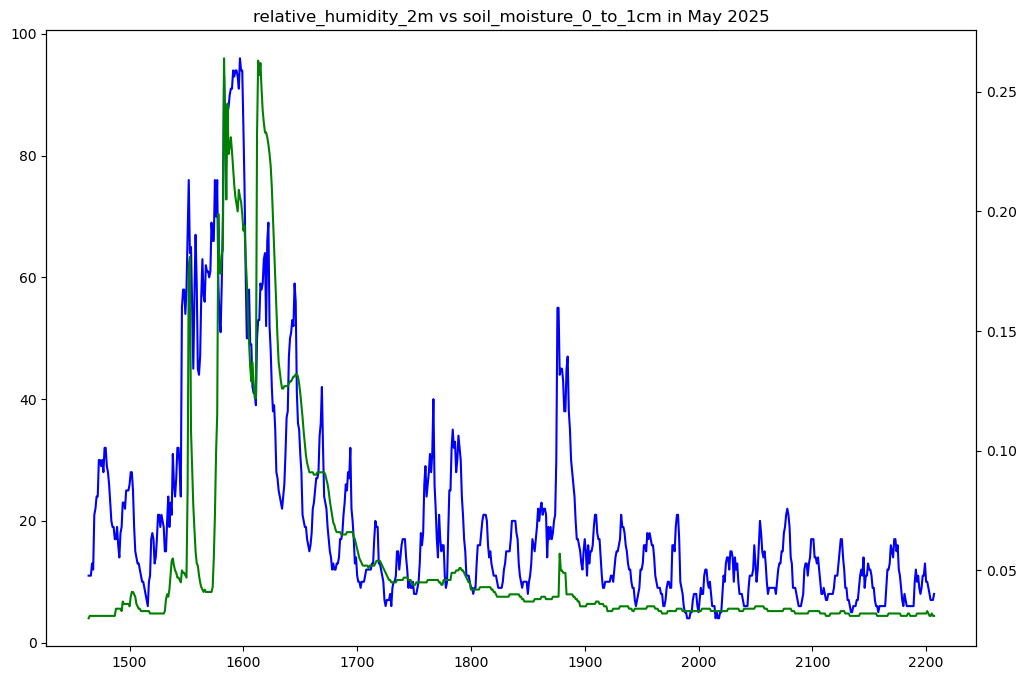

In [13]:
# Draw plot of the most correlated column (soil_moisture_0_to_1cm) with 'relative_humidity_2m'
# The relative_humidity_2m values fluctuations for the most part are similar to dew_point_2m except at several points.
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
plt.title('relative_humidity_2m vs soil_moisture_0_to_1cm in April 2025')
ax1.plot(df04[['relative_humidity_2m']], color='blue')
ax2 = ax1.twinx()
ax2.plot(df04[['soil_moisture_0_to_1cm']], color='green', label='Data 2')

fig, ax1 = plt.subplots()
plt.title('relative_humidity_2m vs soil_moisture_0_to_1cm in May 2025')
ax1.plot(df05[['relative_humidity_2m']], color='blue', label='Data 1')
ax2 = ax1.twinx()
ax2.plot(df05[['soil_moisture_0_to_1cm']], color='green', label='Data 2')

In [14]:
# Generate Correlation Table for 'dew_point_2m'
gencorr('dew_point_2m')

dew_point_2m              1.00
relative_humidity_2m      0.73
soil_moisture_0_to_1cm    0.55
soil_moisture_1_to_3cm    0.51
Name: dew_point_2m, dtype: float64

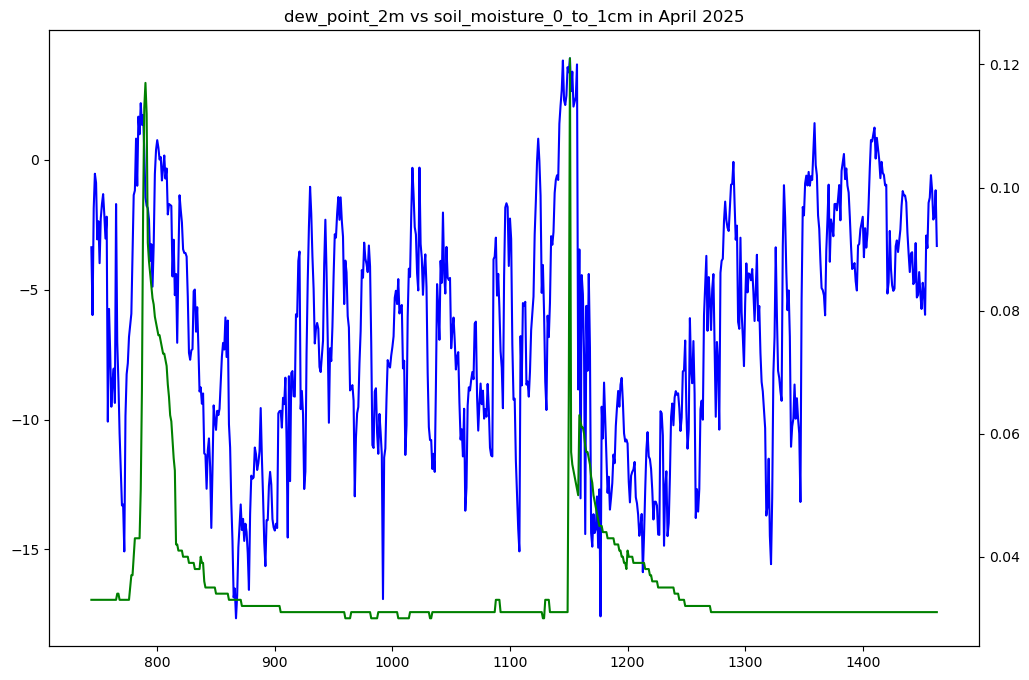

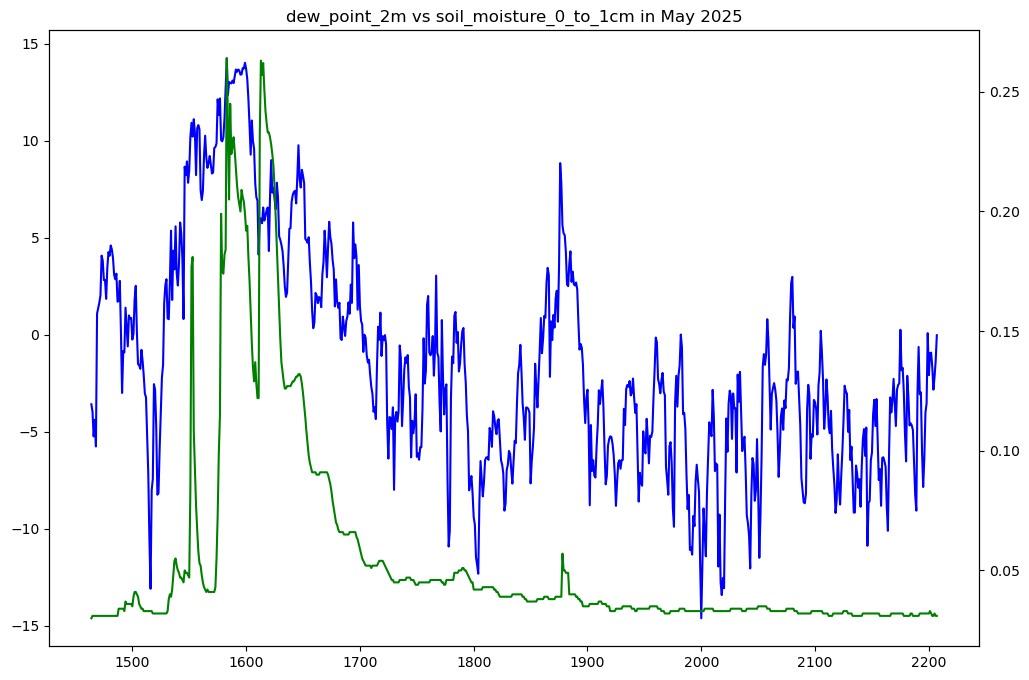

In [15]:
# Draw plot of the most correlated column (soil_moisture_0_to_1cm) with 'dew_point_2m'
# The dew_point_2m values fluctuations for the more than halfpart are similar to soil_moisture_0_to_1cm.
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
plt.title('dew_point_2m vs soil_moisture_0_to_1cm in April 2025')
ax1.plot(df04[['dew_point_2m']], color='blue')
ax2 = ax1.twinx()
ax2.plot(df04[['soil_moisture_0_to_1cm']], color='green', label='Data 2')

fig, ax1 = plt.subplots()
plt.title('dew_point_2m vs soil_moisture_0_to_1cm in May 2025')
ax1.plot(df05[['dew_point_2m']], color='blue', label='Data 1')
ax2 = ax1.twinx()
ax2.plot(df05[['soil_moisture_0_to_1cm']], color='green', label='Data 2')

In [16]:
# Generate Correlation Table for 'precipitation_probability'
gencorr('precipitation_probability')

precipitation_probability    1.00
cloud_cover_low              0.61
relative_humidity_2m         0.56
Name: precipitation_probability, dtype: float64

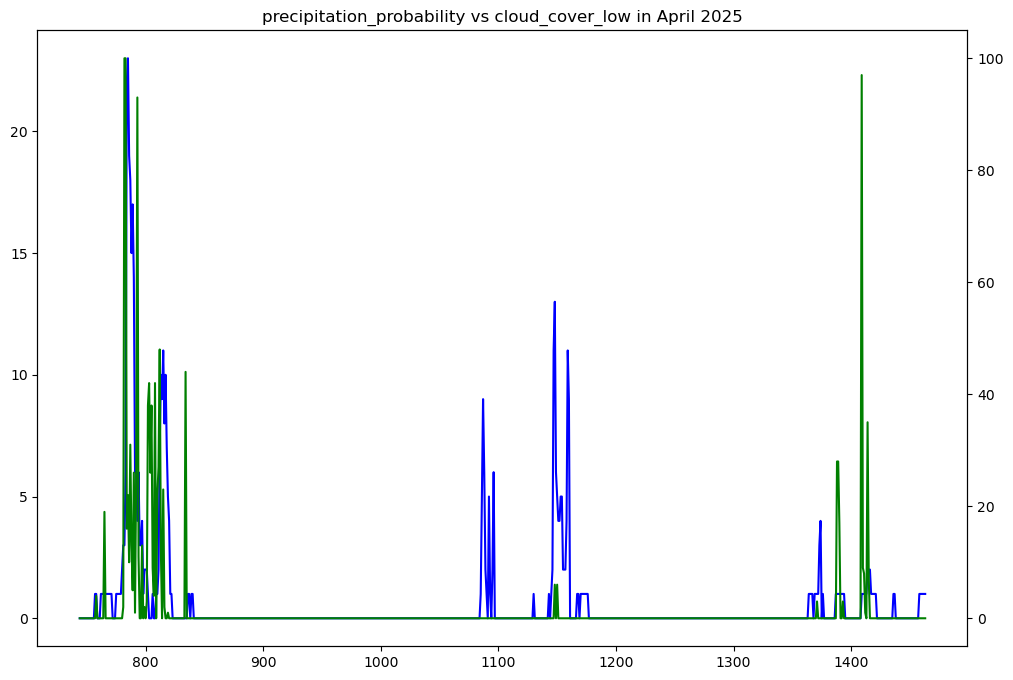

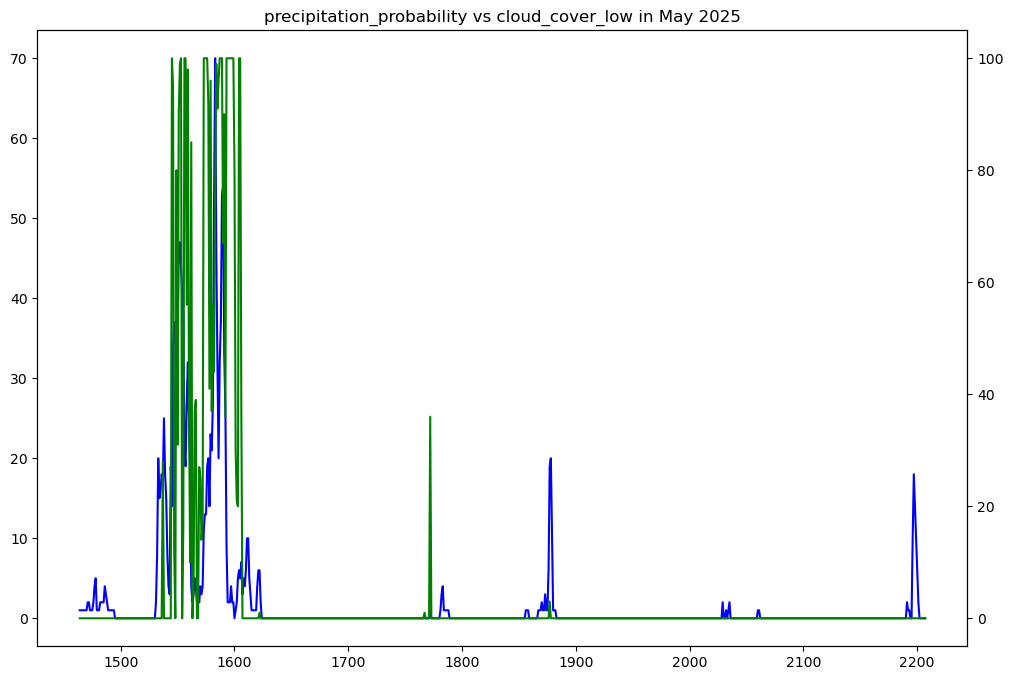

In [17]:
# Draw plot of the most correlated column (cloud_cover_low) with 'precipitation_probability'
# The dew_point_2m values fluctuations for the more than halfpart are similar to soil_moisture_0_to_1cm.
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
plt.title('precipitation_probability vs cloud_cover_low in April 2025')
ax1.plot(df04[['precipitation_probability']], color='blue')
ax2 = ax1.twinx()
ax2.plot(df04[['cloud_cover_low']], color='green', label='Data 2')

fig, ax1 = plt.subplots()
plt.title('precipitation_probability vs cloud_cover_low in May 2025')
ax1.plot(df05[['precipitation_probability']], color='blue', label='Data 1')
ax2 = ax1.twinx()
ax2.plot(df05[['cloud_cover_low']], color='green', label='Data 2')

In [18]:
# Generate Correlation Table for 'cloud_cover_low'
gencorr('cloud_cover_low')

cloud_cover_low              1.00
relative_humidity_2m         0.64
precipitation_probability    0.61
soil_moisture_0_to_1cm       0.50
Name: cloud_cover_low, dtype: float64

<Axes: title={'center': 'cloud_cover_low vs relative_humidity_2m in May 2025'}>

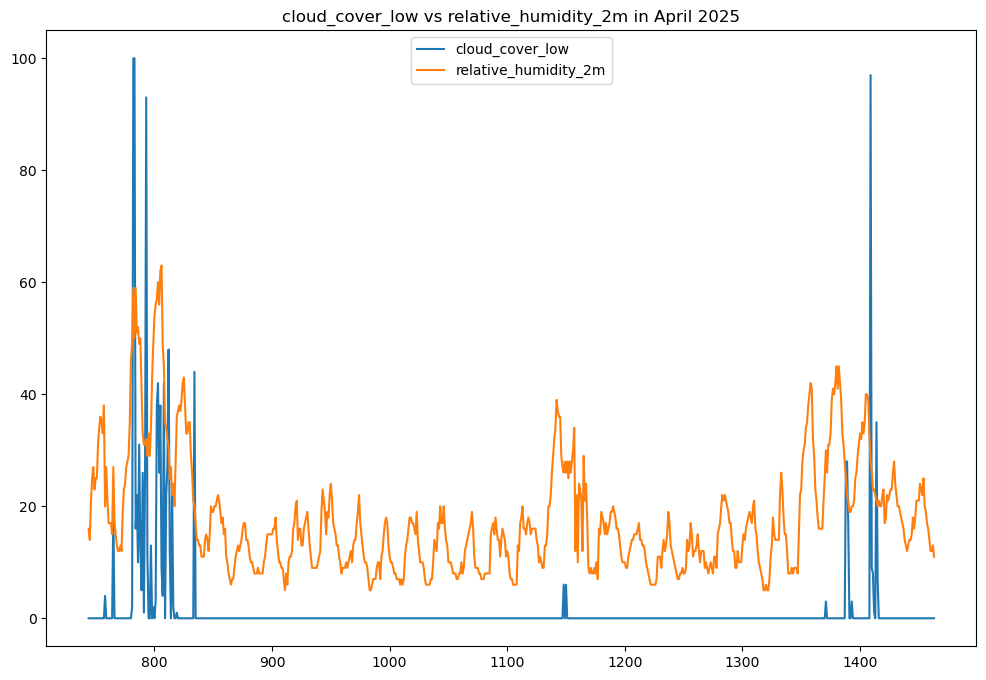

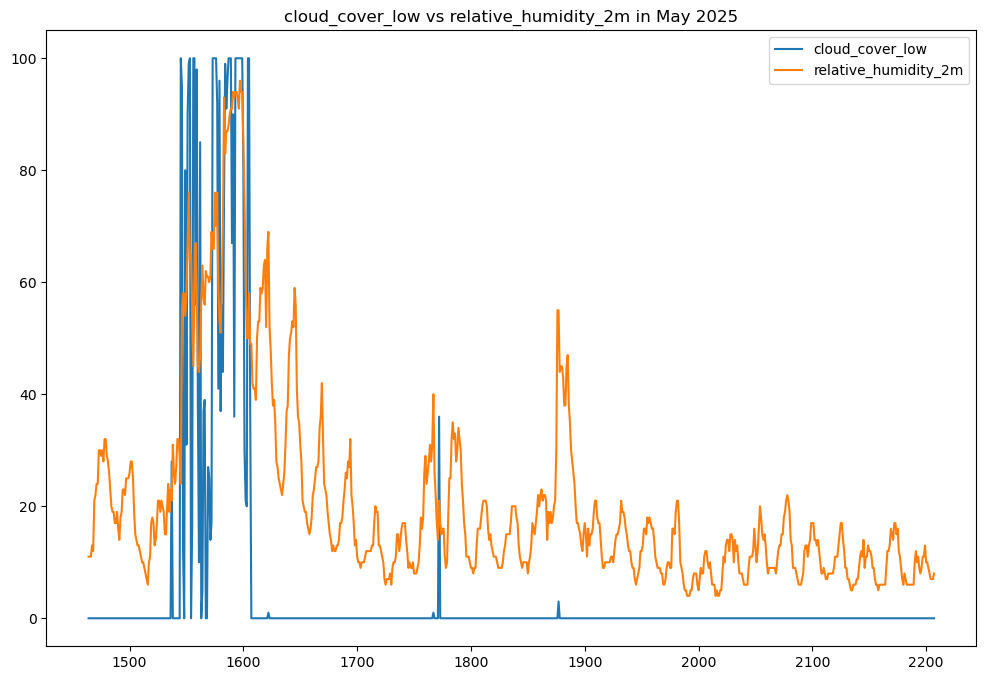

In [19]:
# Draw plot of the most correlated column (relative_humidity_2m) with 'cloud_cover_low'
# The 'cloud_cover_low' and 'relative_humidity_2m' fluctuations for more than half part are similar except at several points.
import matplotlib.pyplot as plt
df04[['cloud_cover_low','relative_humidity_2m']].plot(title='cloud_cover_low vs relative_humidity_2m in April 2025')
df05[['cloud_cover_low','relative_humidity_2m']].plot(title='cloud_cover_low vs relative_humidity_2m in May 2025')

In [20]:
# Generate Correlation Table for 'cloud_cover_mid'
gencorr('cloud_cover_mid')

cloud_cover_mid    1.0
Name: cloud_cover_mid, dtype: float64

In [21]:
# Generate Correlation Table for 'cloud_cover_high'
gencorr('cloud_cover_high')

cloud_cover_high    1.0
Name: cloud_cover_high, dtype: float64

In [22]:
# Generate Correlation Table for 'wind_speed_10m'
gencorr('wind_speed_10m')

wind_speed_10m    1.0
Name: wind_speed_10m, dtype: float64

In [23]:
# Generate Correlation Table for 'soil_moisture_0_to_1cm'
gencorr('soil_moisture_0_to_1cm')

soil_moisture_0_to_1cm    1.00
soil_moisture_1_to_3cm    0.71
relative_humidity_2m      0.68
soil_moisture_3_to_9cm    0.60
dew_point_2m              0.55
cloud_cover_low           0.50
Name: soil_moisture_0_to_1cm, dtype: float64

<Axes: title={'center': 'soil_moisture_0_to_1cm vs soil_moisture_1_to_3cm in May 2025'}>

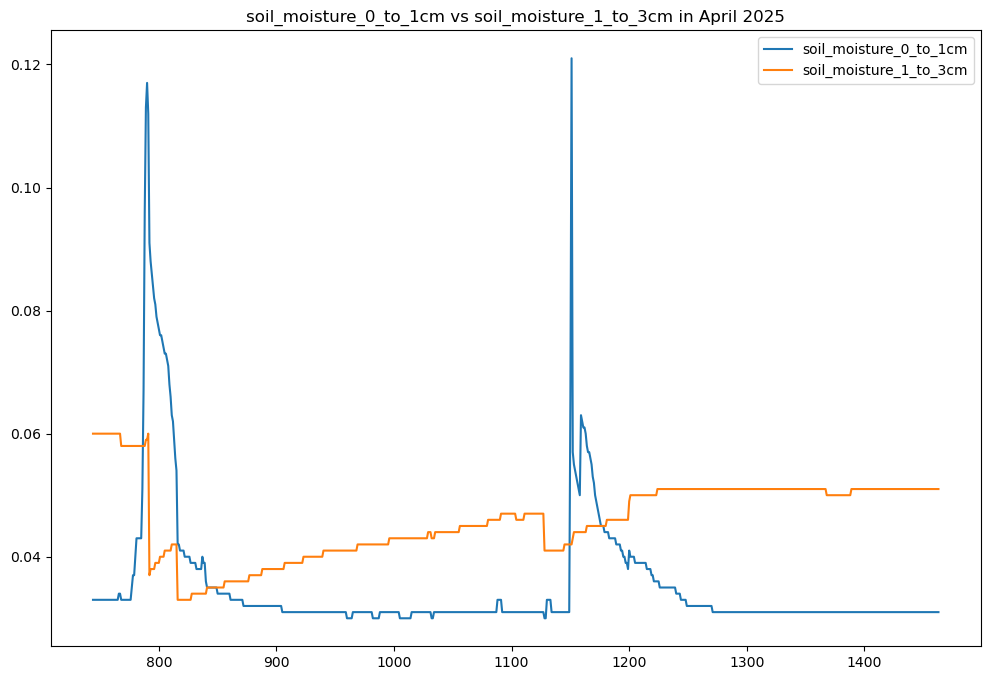

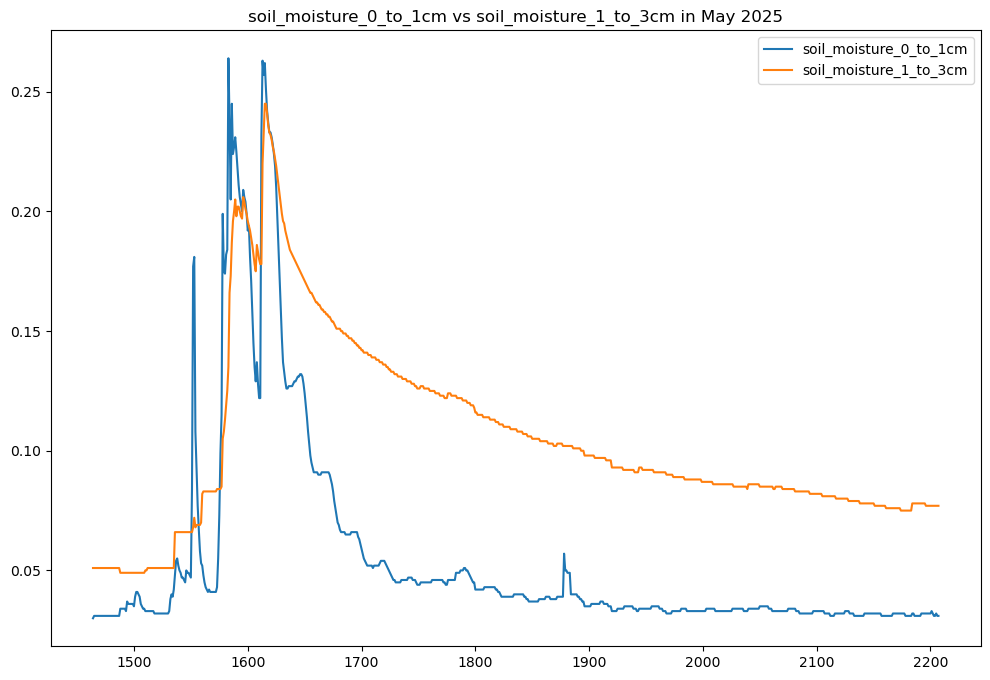

In [24]:
# Draw plot of the most correlated column (soil_moisture_1_to_3cm) with 'soil_moisture_0_to_1cm'
# The 'soil_moisture_0_to_1cm' and 'soil_moisture_1_to_3cm' fluctuations for more than half part are similar.
import matplotlib.pyplot as plt
# plt.title('dew_point_2m vs temperature_2m in April 2025')
df04[['soil_moisture_0_to_1cm','soil_moisture_1_to_3cm']].plot(title='soil_moisture_0_to_1cm vs soil_moisture_1_to_3cm in April 2025')
df05[['soil_moisture_0_to_1cm','soil_moisture_1_to_3cm']].plot(title='soil_moisture_0_to_1cm vs soil_moisture_1_to_3cm in May 2025')

<Axes: title={'center': 'soil_moisture_0_to_1cm vs soil_moisture_3_to_9cm in May 2025'}>

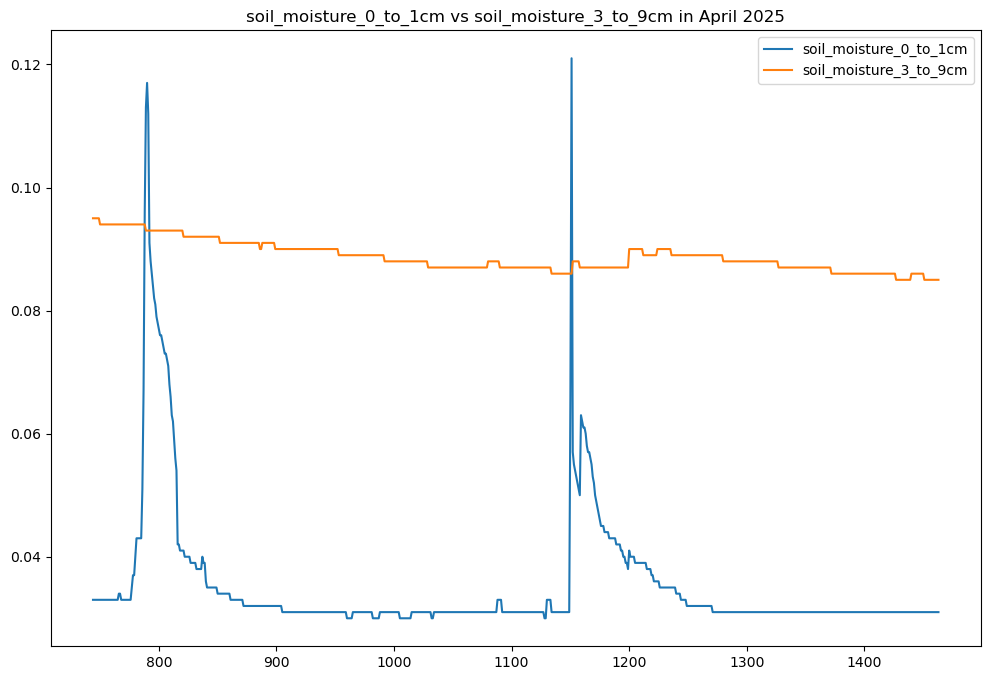

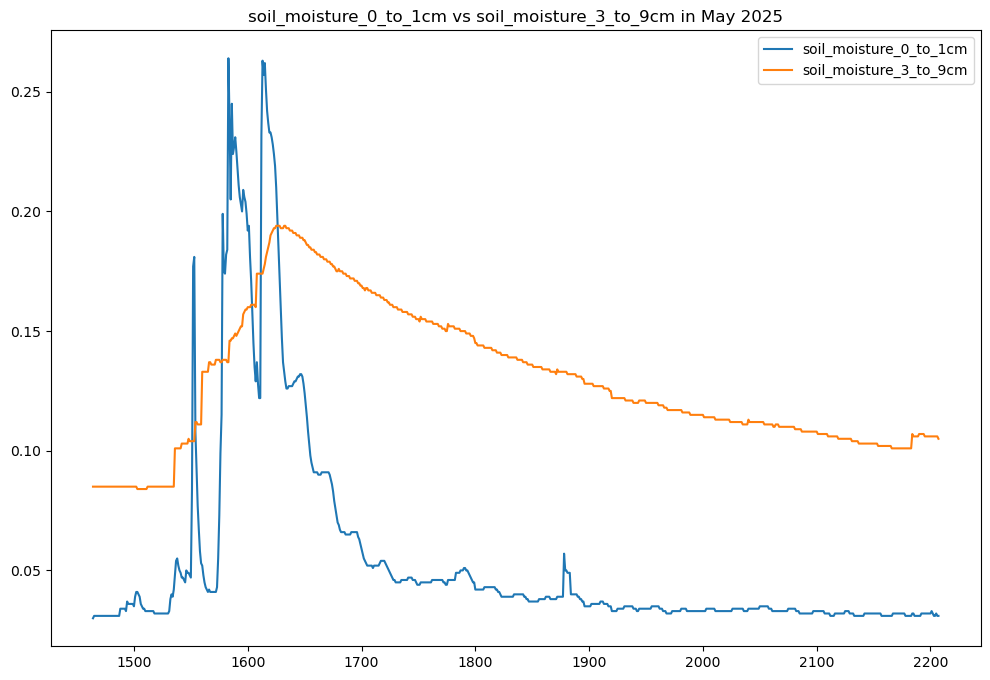

In [25]:
# Draw plot of the most correlated column (soil_moisture_3_to_9cm) with 'soil_moisture_0_to_1cm'
# The 'soil_moisture_0_to_1cm' and 'soil_moisture_3_to_9cm' fluctuations for more than half part are similar.
import matplotlib.pyplot as plt
# plt.title('dew_point_2m vs temperature_2m in April 2025')
df04[['soil_moisture_0_to_1cm','soil_moisture_3_to_9cm']].plot(title='soil_moisture_0_to_1cm vs soil_moisture_3_to_9cm in April 2025')
df05[['soil_moisture_0_to_1cm','soil_moisture_3_to_9cm']].plot(title='soil_moisture_0_to_1cm vs soil_moisture_3_to_9cm in May 2025')

In [26]:
# Generate Correlation Table for 'temperature_80m'
gencorr('temperature_80m')

temperature_80m            1.00
temperature_2m             0.93
vapour_pressure_deficit    0.90
soil_temperature_0cm       0.68
relative_humidity_2m       0.59
Name: temperature_80m, dtype: float64

<Axes: title={'center': 'temperature_80m vs temperature_2m in May 2025'}>

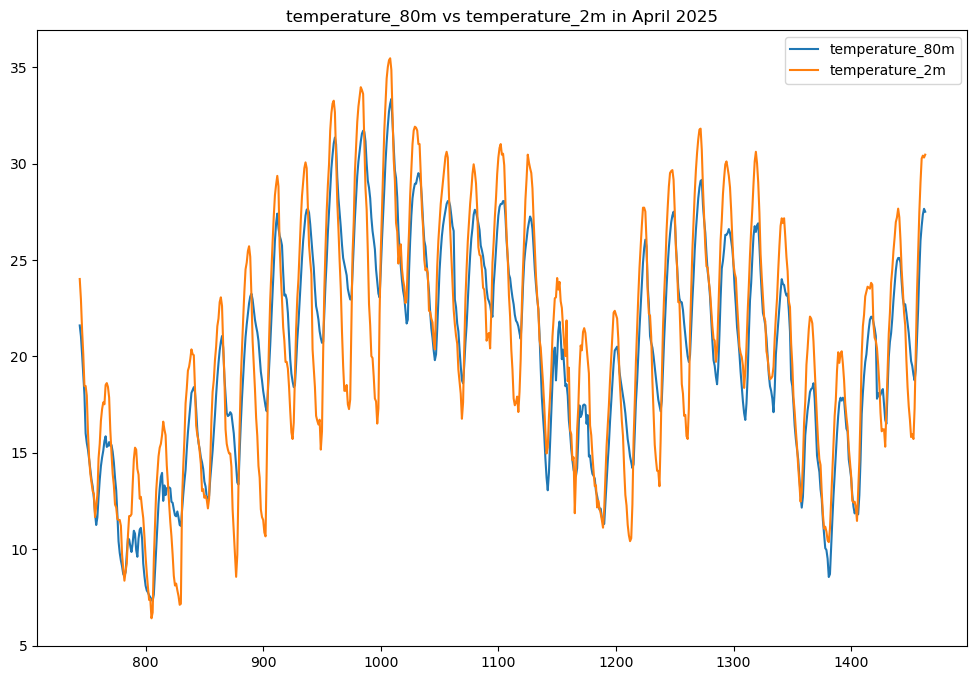

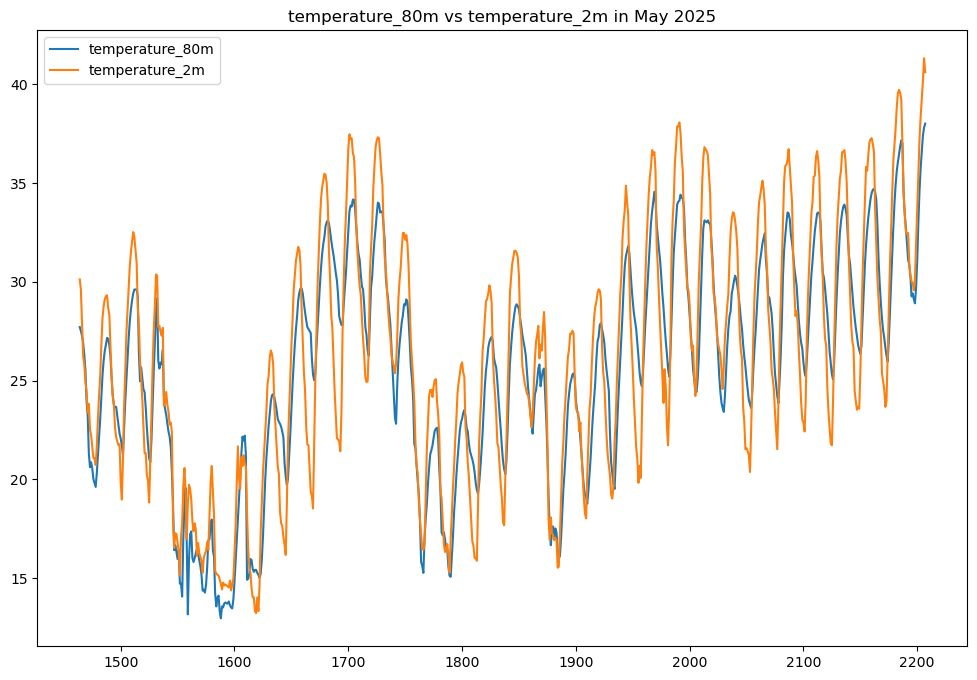

In [27]:
# Draw plot of the most correlated column with 'temperature_80m'
# The 'temperature_80m' and 'temperature_2m' fluctuations for the most part are similar except at very few points.
import matplotlib.pyplot as plt
# plt.title('dew_point_2m vs temperature_2m in April 2025')
df04[['temperature_80m','temperature_2m']].plot(title='temperature_80m vs temperature_2m in April 2025')
df05[['temperature_80m','temperature_2m']].plot(title='temperature_80m vs temperature_2m in May 2025')

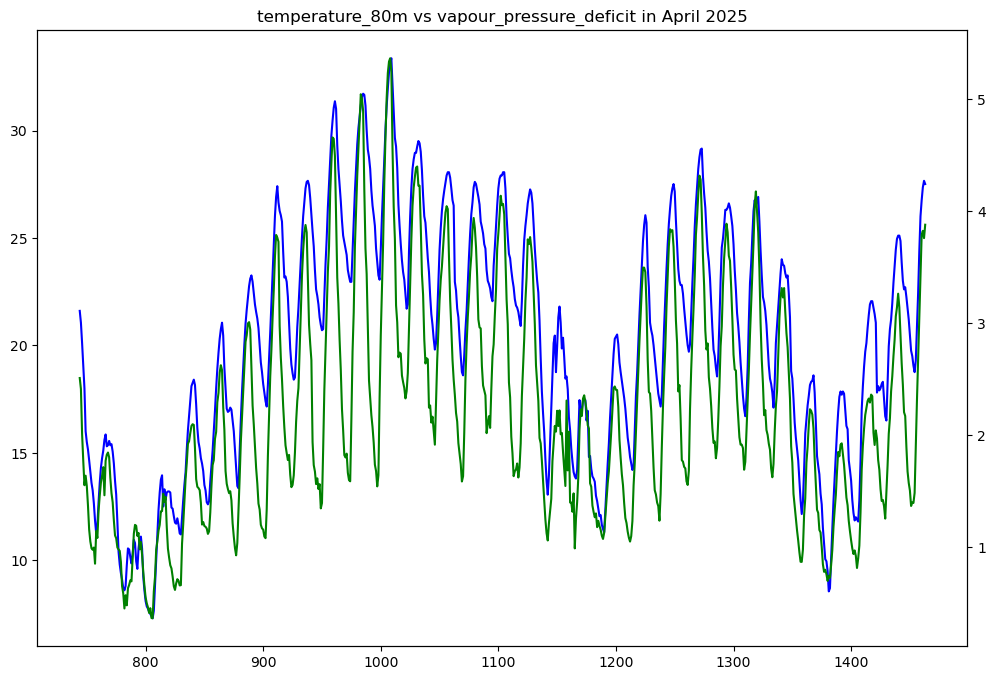

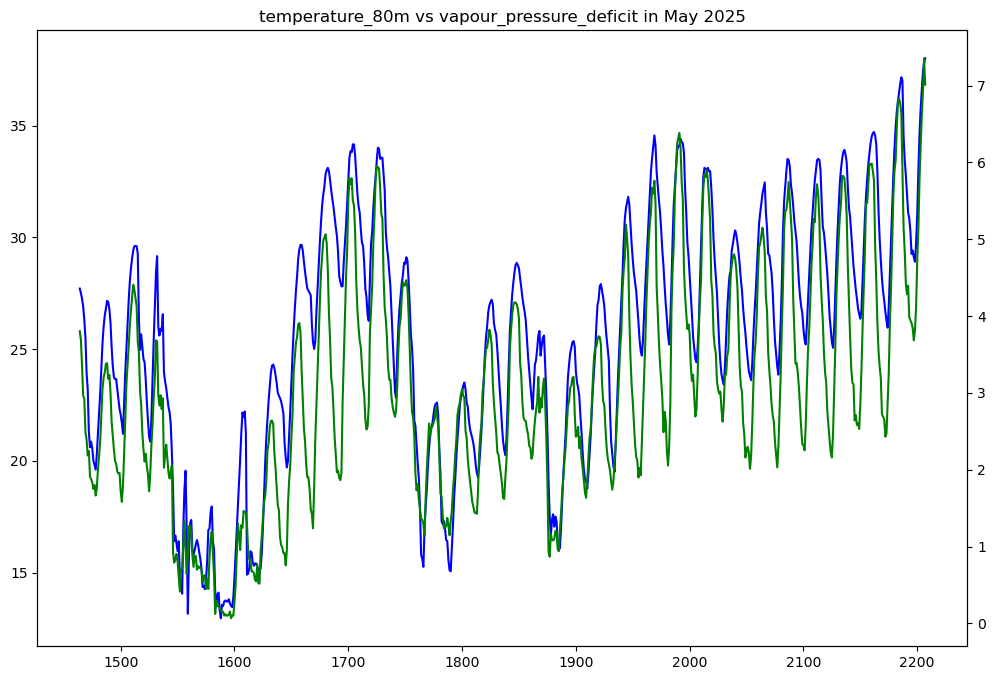

In [28]:
# Draw plot of the most correlated column (cloud_cover_low) with 'temperature_80m'
# The vapour_pressure_deficit values fluctuations for the most part are similar except at very few points.
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
plt.title('temperature_80m vs vapour_pressure_deficit in April 2025')
ax1.plot(df04[['temperature_80m']], color='blue')
ax2 = ax1.twinx()
ax2.plot(df04[['vapour_pressure_deficit']], color='green', label='Data 2')

fig, ax1 = plt.subplots()
plt.title('temperature_80m vs vapour_pressure_deficit in May 2025')
ax1.plot(df05[['temperature_80m']], color='blue', label='Data 1')
ax2 = ax1.twinx()
ax2.plot(df05[['vapour_pressure_deficit']], color='green', label='Data 2')

<Axes: title={'center': 'temperature_80m vs soil_temperature_0cm in May 2025'}>

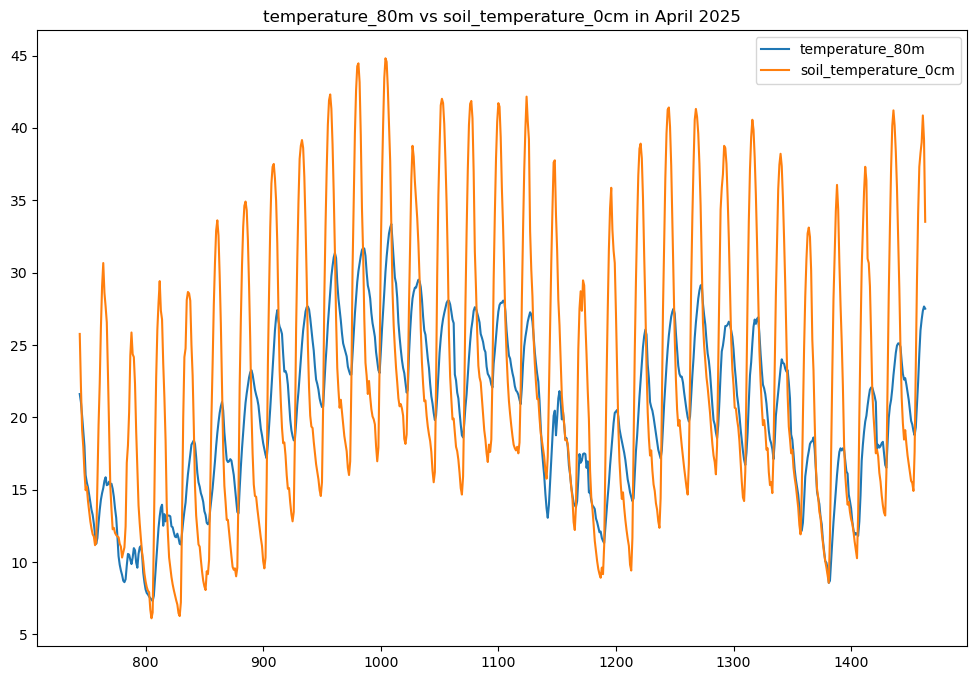

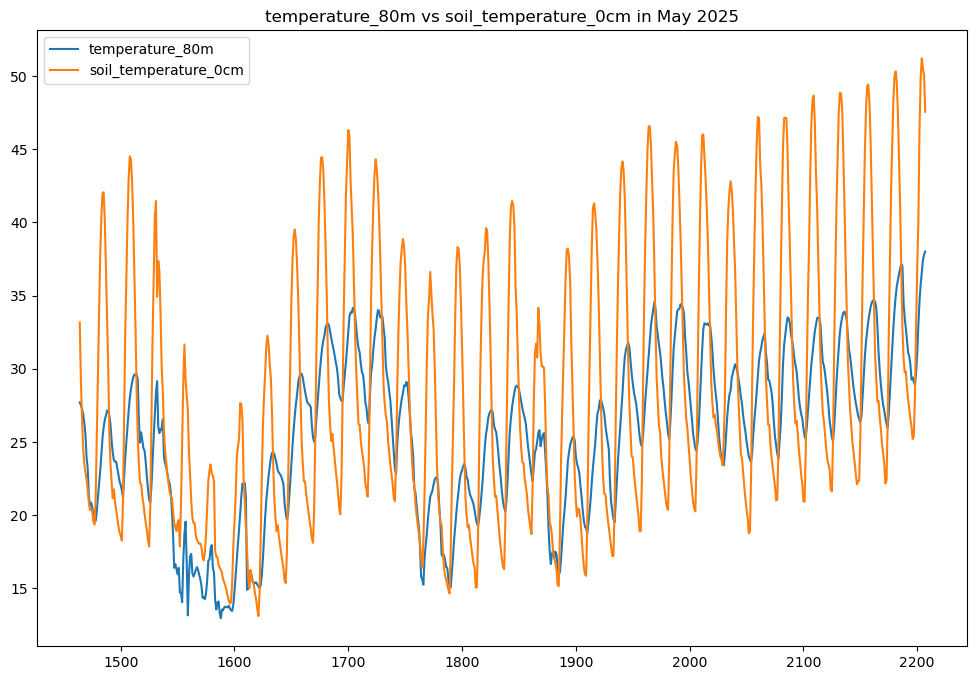

In [29]:
# Draw plot of the most correlated column with 'temperature_80m'
# The 'temperature_80m' and 'soil_temperature_0cm' fluctuations for the most part are similar except at several points.
import matplotlib.pyplot as plt
# plt.title('temperature_80m vs soil_temperature_0cm in April 2025')
df04[['temperature_80m','soil_temperature_0cm']].plot(title='temperature_80m vs soil_temperature_0cm in April 2025')
df05[['temperature_80m','soil_temperature_0cm']].plot(title='temperature_80m vs soil_temperature_0cm in May 2025')

In [30]:
# Generate Correlation Table for 'soil_temperature_0cm'
gencorr('soil_temperature_0cm')

soil_temperature_0cm       1.00
temperature_2m             0.84
vapour_pressure_deficit    0.80
temperature_80m            0.68
Name: soil_temperature_0cm, dtype: float64

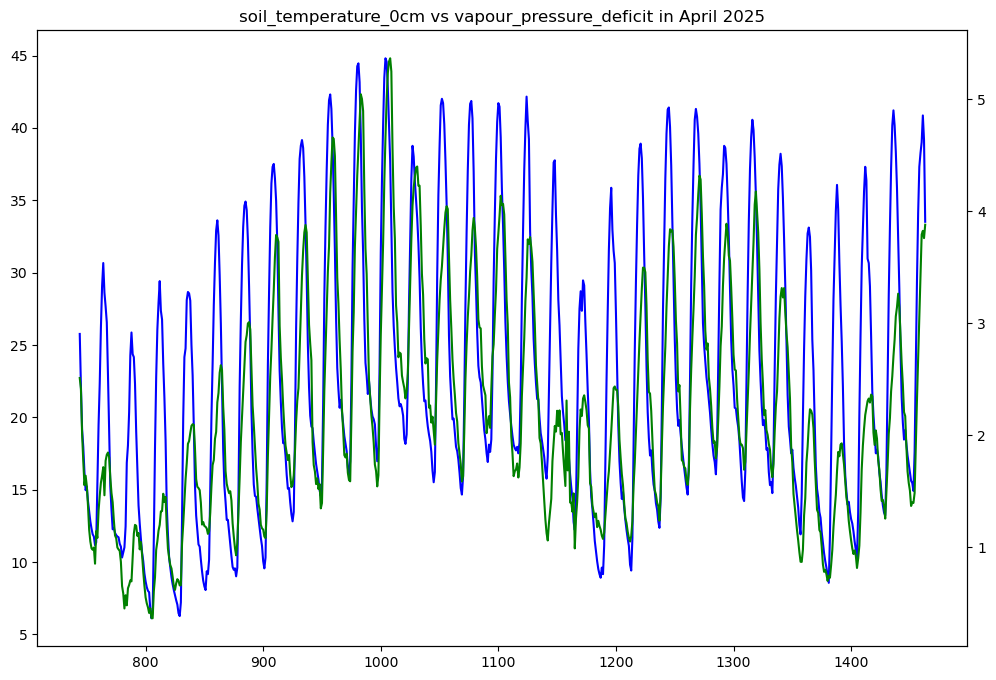

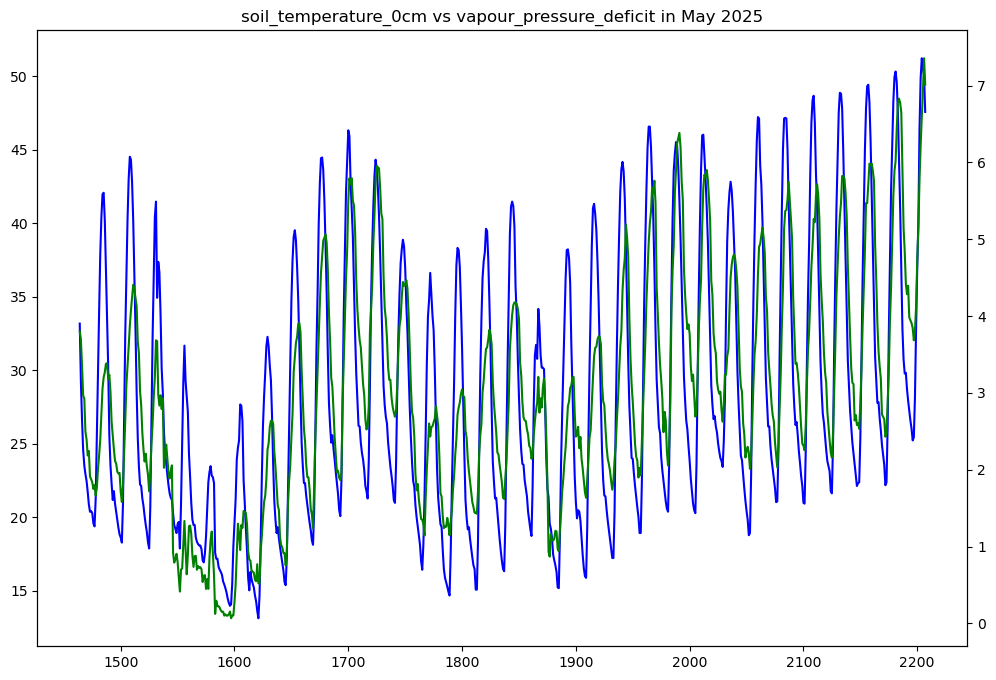

In [31]:
# Draw plot of the most correlated column (vapour_pressure_deficit) with 'soil_temperature_0cm'
# The soil_temperature_0cm and vapour_pressure_deficit values fluctuations for the most part are similar except at very few points.
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
plt.title('soil_temperature_0cm vs vapour_pressure_deficit in April 2025')
ax1.plot(df04[['soil_temperature_0cm']], color='blue')
ax2 = ax1.twinx()
ax2.plot(df04[['vapour_pressure_deficit']], color='green', label='Data 2')

fig, ax1 = plt.subplots()
plt.title('soil_temperature_0cm vs vapour_pressure_deficit in May 2025')
ax1.plot(df05[['soil_temperature_0cm']], color='blue', label='Data 1')
ax2 = ax1.twinx()
ax2.plot(df05[['vapour_pressure_deficit']], color='green', label='Data 2')

In [32]:
# Generate Correlation Table for 'soil_moisture_1_to_3cm'
gencorr('soil_moisture_1_to_3cm')

soil_moisture_1_to_3cm    1.00
soil_moisture_3_to_9cm    0.95
soil_moisture_0_to_1cm    0.71
dew_point_2m              0.51
Name: soil_moisture_1_to_3cm, dtype: float64

<Axes: title={'center': 'soil_moisture_1_to_3cm vs soil_moisture_3_to_9cm in May 2025'}>

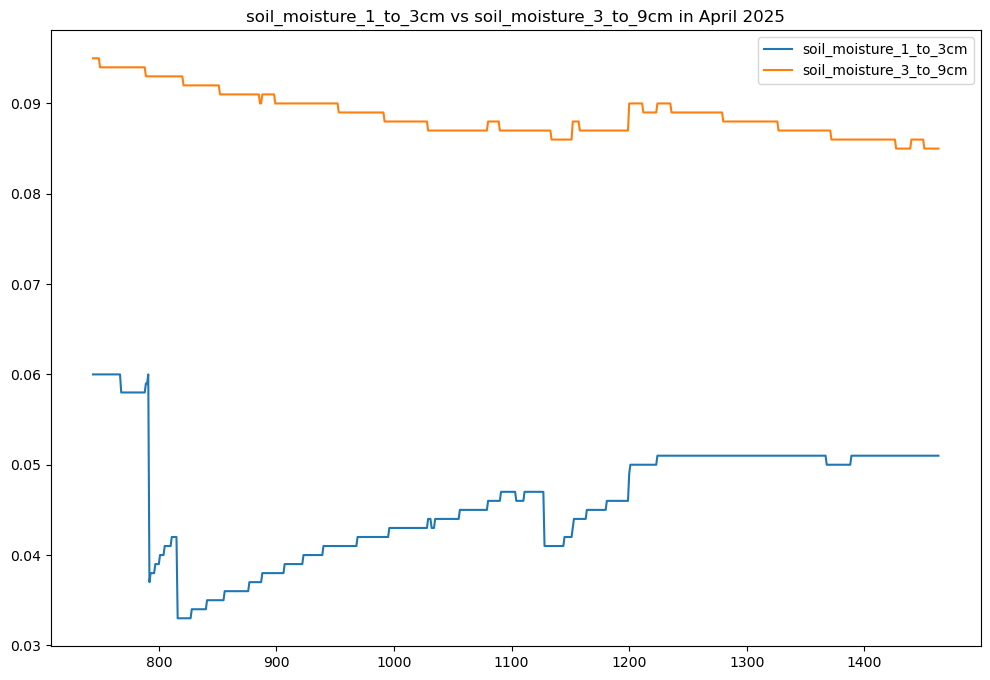

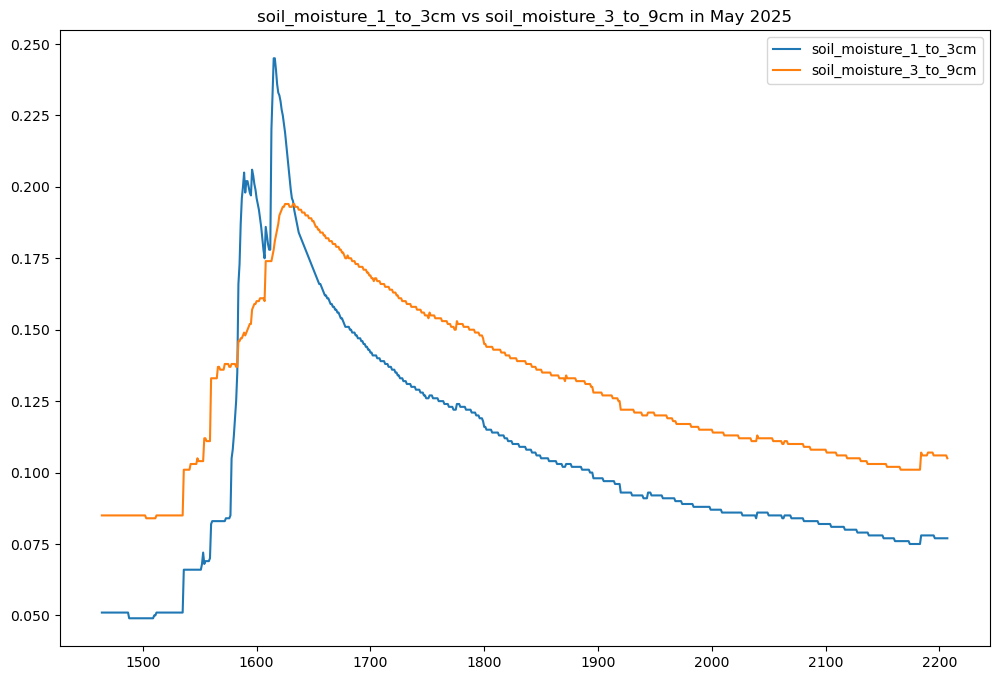

In [33]:
# Draw plot of the most correlated column with 'soil_moisture_1_to_3cm'
# The 'soil_moisture_1_to_3cm' and 'soil_moisture_3_to_9cm' fluctuations for the most part are similar except at very few points.
import matplotlib.pyplot as plt
# plt.title('dew_point_2m vs temperature_2m in April 2025')
df04[['soil_moisture_1_to_3cm','soil_moisture_3_to_9cm']].plot(title='soil_moisture_1_to_3cm vs soil_moisture_3_to_9cm in April 2025')
df05[['soil_moisture_1_to_3cm','soil_moisture_3_to_9cm']].plot(title='soil_moisture_1_to_3cm vs soil_moisture_3_to_9cm in May 2025')

In [34]:
# Generate Correlation Table for 'soil_moisture_3_to_9cm'
gencorr('soil_moisture_3_to_9cm')

soil_moisture_3_to_9cm    1.00
soil_moisture_1_to_3cm    0.95
soil_moisture_0_to_1cm    0.60
Name: soil_moisture_3_to_9cm, dtype: float64

In [35]:
# Generate Correlation Table for 'vapour_pressure_deficit'
gencorr('vapour_pressure_deficit')

vapour_pressure_deficit    1.00
temperature_2m             0.96
temperature_80m            0.90
soil_temperature_0cm       0.80
relative_humidity_2m       0.66
Name: vapour_pressure_deficit, dtype: float64

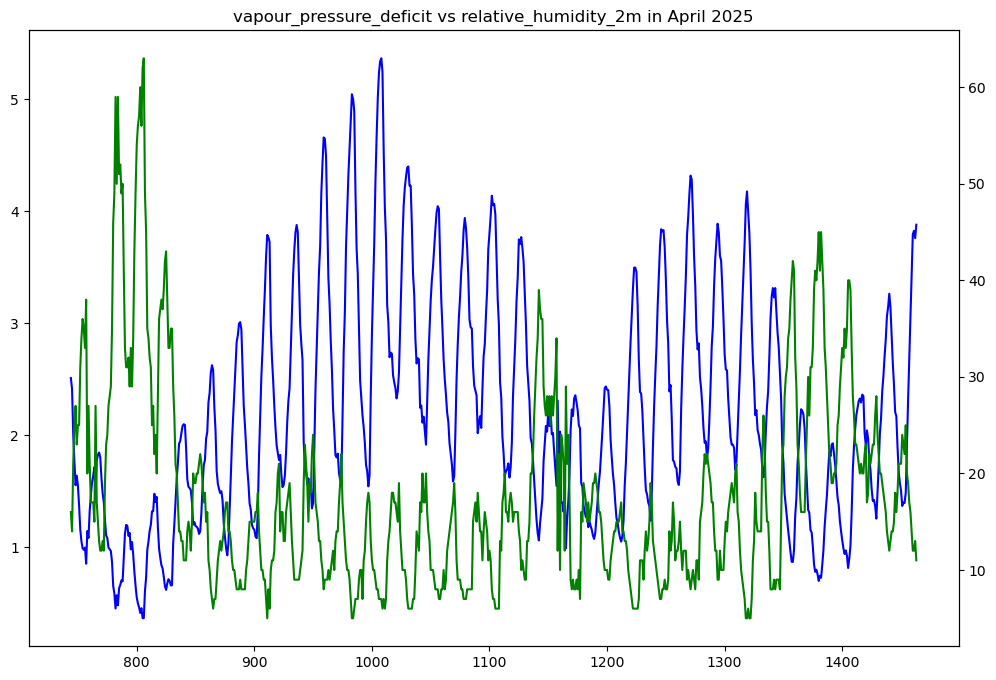

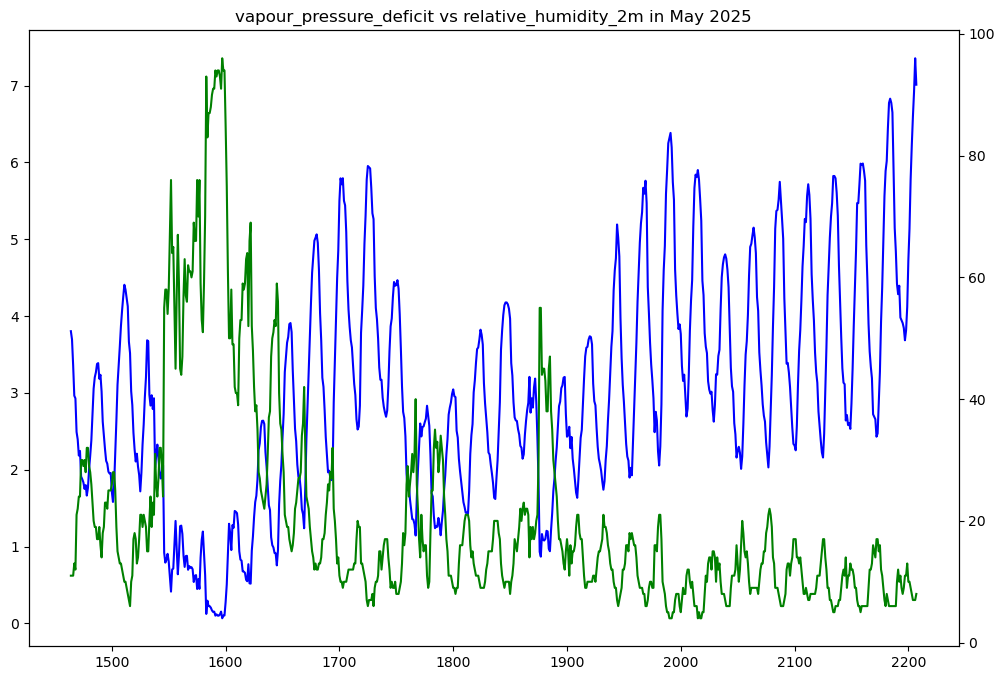

In [36]:
# Draw plot of the most correlated column (vapour_pressure_deficit) with 'relative_humidity_2m'
# The vapour_pressure_deficit and relative_humidity_2m values fluctuations for more than half part are good reverse.
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
plt.title('vapour_pressure_deficit vs relative_humidity_2m in April 2025')
ax1.plot(df04[['vapour_pressure_deficit']], color='blue')
ax2 = ax1.twinx()
ax2.plot(df04[['relative_humidity_2m']], color='green', label='Data 2')

fig, ax1 = plt.subplots()
plt.title('vapour_pressure_deficit vs relative_humidity_2m in May 2025')
ax1.plot(df05[['vapour_pressure_deficit']], color='blue', label='Data 1')
ax2 = ax1.twinx()
ax2.plot(df05[['relative_humidity_2m']], color='green', label='Data 2')

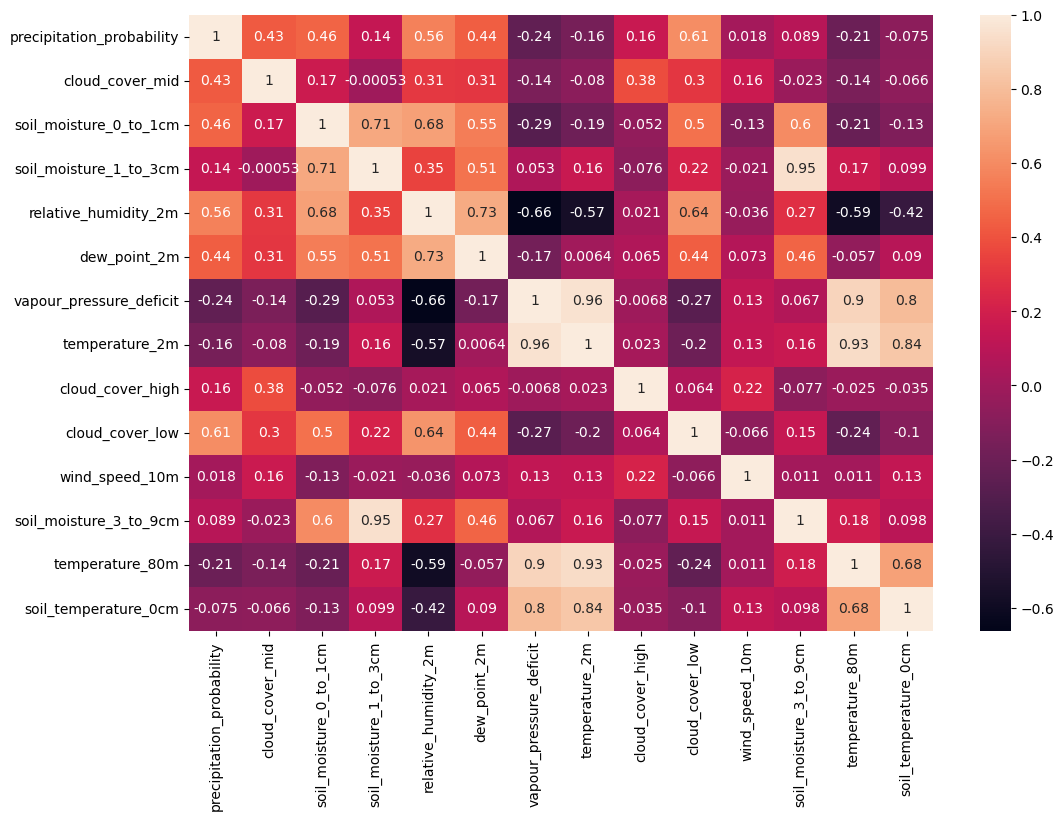

In [37]:
# Draw the Heatmap of Weather Data Correlation
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df1h.corr(numeric_only=True), annot=True)
plt.rcParams['figure.figsize'] = (20,10)
plt.show()

In [38]:
# How about if we limit the 'temperature_2m' to certain range, let's say, more than 18C
# Data for 4 Columns where temperature_2m more than 18 C
df1h2 = df1h.where(df1h['temperature_2m'] > 18)
df1h2 = df1h2.dropna()
df1h2

precipitation_probability  cloud_cover_mid  soil_moisture_0_to_1cm  \
479                         0.0              0.0                   0.037   
480                         0.0              0.0                   0.038   
481                         0.0              0.0                   0.038   
482                         0.0              0.0                   0.038   
483                         0.0              0.0                   0.038   
...                         ...              ...                     ...   
2227                        1.0              1.0                   0.032   
2228                        1.0              0.0                   0.032   
2229                        2.0              5.0                   0.031   
2230                        2.0              0.0                   0.031   
2231                        3.0              0.0                   0.031   

      soil_moisture_1_to_3cm  relative_humidity_2m  dew_point_2m  \
479                    0.067                  12.0    -11.587272   
480                    0.069                  12.0    -11.116996   
481                    0.069                  11.0    -11.971617   
482                    0.069                  11.0    -11.894015   
483                    0.069                  11.0    -11.971617   
...                      ...                   ...           ...   
2227                   0.076                  11.0      3.341017   
2228                   0.076                  11.0      3.379128   
2229                   0.076                  12.0      4.657262   
2230                   0.076                  12.0      4.618772   
2231                   0.076                  12.0      4.195249   

      vapour_pressure_deficit  temperature_2m  cloud_cover_high  \
479                  1.859420       18.359500             100.0   
480                  1.930476       18.959500             100.0   
481                  1.989208       19.259500             100.0   
482                  2.001618       19.359500              93.0   
483                  1.989208       19.259500              46.0   
...                       ...             ...               ...   
2227                 6.279035       39.169502             100.0   
2228                 6.295875       39.219500             100.0   
2229                 6.241590       39.269500             100.0   
2230                 6.224906       39.219500              55.0   
2231                 6.043872       38.669502              76.0   

      cloud_cover_low  wind_speed_10m  soil_moisture_3_to_9cm  \
479               0.0        4.104631                   0.099   
480               0.0        3.563818                   0.101   
481               0.0        2.545584                   0.101   
482               0.0        4.349896                   0.101   
483               0.0        6.120000                   0.101   
...               ...             ...                     ...   
2227              0.0       23.950148                   0.105   
2228              0.0       29.686360                   0.105   
2229              0.0       25.499080                   0.105   
2230              0.0       24.485292                   0.105   
2231              0.0       29.810522                   0.105   

      temperature_80m  soil_temperature_0cm  
479         17.410000             26.514000  
480         17.960001             23.164000  
481         18.110000             19.364000  
482         18.010000             15.264000  
483         17.810000             13.264000  
...               ...                   ...  
2227        34.609997             45.114000  
2228        35.059998             44.114000  
2229        34.809998             44.364000  
2230        34.059998             42.963997  
2231        32.859997             42.413998  

[1329 rows x 14 columns]

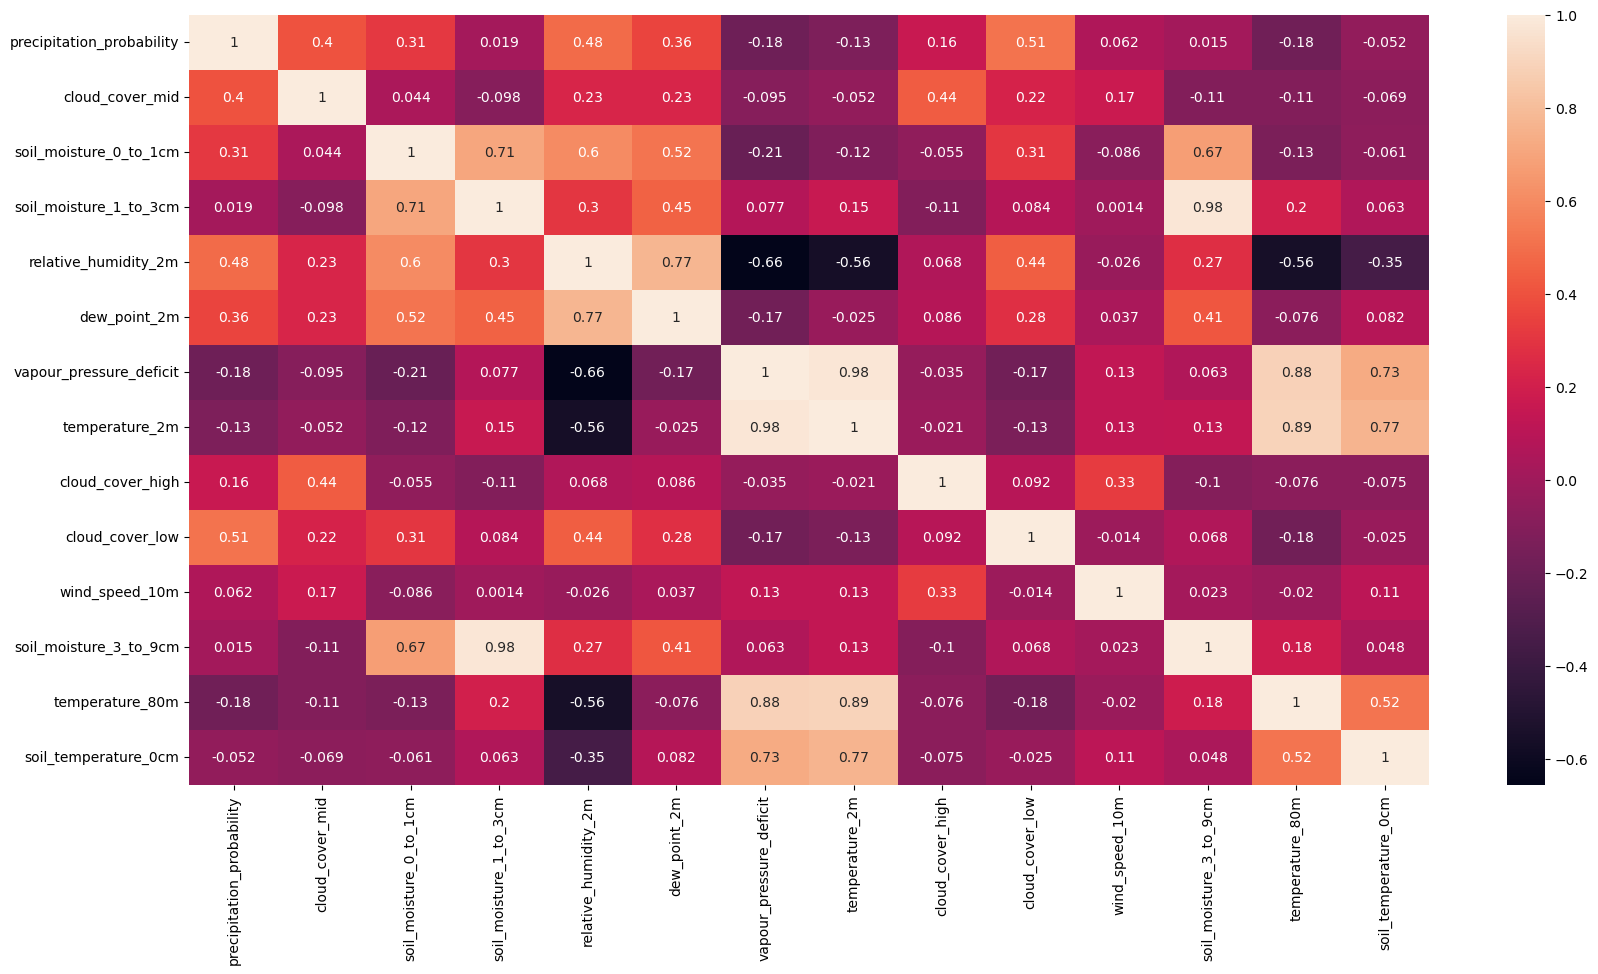

In [39]:
sns.heatmap(df1h2.corr(numeric_only=True), annot=True)
plt.rcParams['figure.figsize'] = (20,10)
plt.show()

In [40]:
######### Conclusion from the Heatmap ##############
# temperature_2m has correlation of 0.96 to vapour_pressure_deficit.
# temperature_2m has correlation of 0.84 to soil_temperature_0cm.
# relative_humidity_2m has correlation of 0.73 to dew_point_2m.
# relative_humidity_2m has correlation of 0.68 to soil_moisture_0_to_1cm.
# dew_point_2m has correlation of 0.55 to soil_moisture_0_to_1cm 
# precipitation_probability has correlation of 0.61 to cloud_cover_low.
# cloud_cover_low has correlation of 0.64 to relative_humidity_2m.
# soil_moisture_0_to_1cm has correlation of 0.71 to soil_moisture_1_to_3cm.
# soil_moisture_0_to_1cm has correlation of 0.60 to soil_moisture_3_to_9cm.
# temperature_80m has correlation of 0.93 to temperature_2m.
# temperature_80m has correlation of 0.90 to vapour_pressure_deficit.
# temperature_80m has correlation of 0.68 to soil_temperature_0cm.
# soil_temperature_0cm has correlation of 0.80 to vapour_pressure_deficit.
# soil_moisture_1_to_3cm has correlation of 0.95 to soil_moisture_3_to_9cm
# vapour_pressure_deficit has correlation of 0.66 to relative_humidity_2m.

In [41]:
# LAB : Check 'corr' method of Pandas with mathematical high order polynomial equations (quadratic to power-of-5 equations)
# Equations used:
# 1. y1 = 2x^2 + 5x + 6
# 2. y2 = 2x^3 + 7x^2 + 10x + 20
# 3. y3 = 5x^4 + 12x^3 + 8x^2 + 6x + 20
# 4. y4 = 3x^5 + 8x^4 + 10x^3 + 4x^2 + 9x + 17
dfq = pd.read_csv(r'C:\PAULDATA\Paulus_Data_Analyst\Portfolio_Projects\Global_Weather\quadratic_equation.csv')
dfq

x   y1     y2      y3       y4
0    1   13     39      51       51
1    2   24     84     240      355
2    3   39    167     839     1727
3    4   58    300    2220     5877
4    5   81    495    4875    15787
5    6  108    764    9416    36071
6    7  139   1119   16575    73335
7    8  174   1572   27204   136537
8    9  213   2135   42275   237347
9   10  256   2820   62880   390507
10  11  303   3639   90231   614191
11  12  354   4604  125660   930365
12  13  409   5727  170619  1365147
13  14  468   7020  226680  1949167
14  15  531   8495  295535  2717927
15  16  598  10164  378996  3712161
16  17  669  12039  478995  4978195
17  18  744  14132  597584  6568307

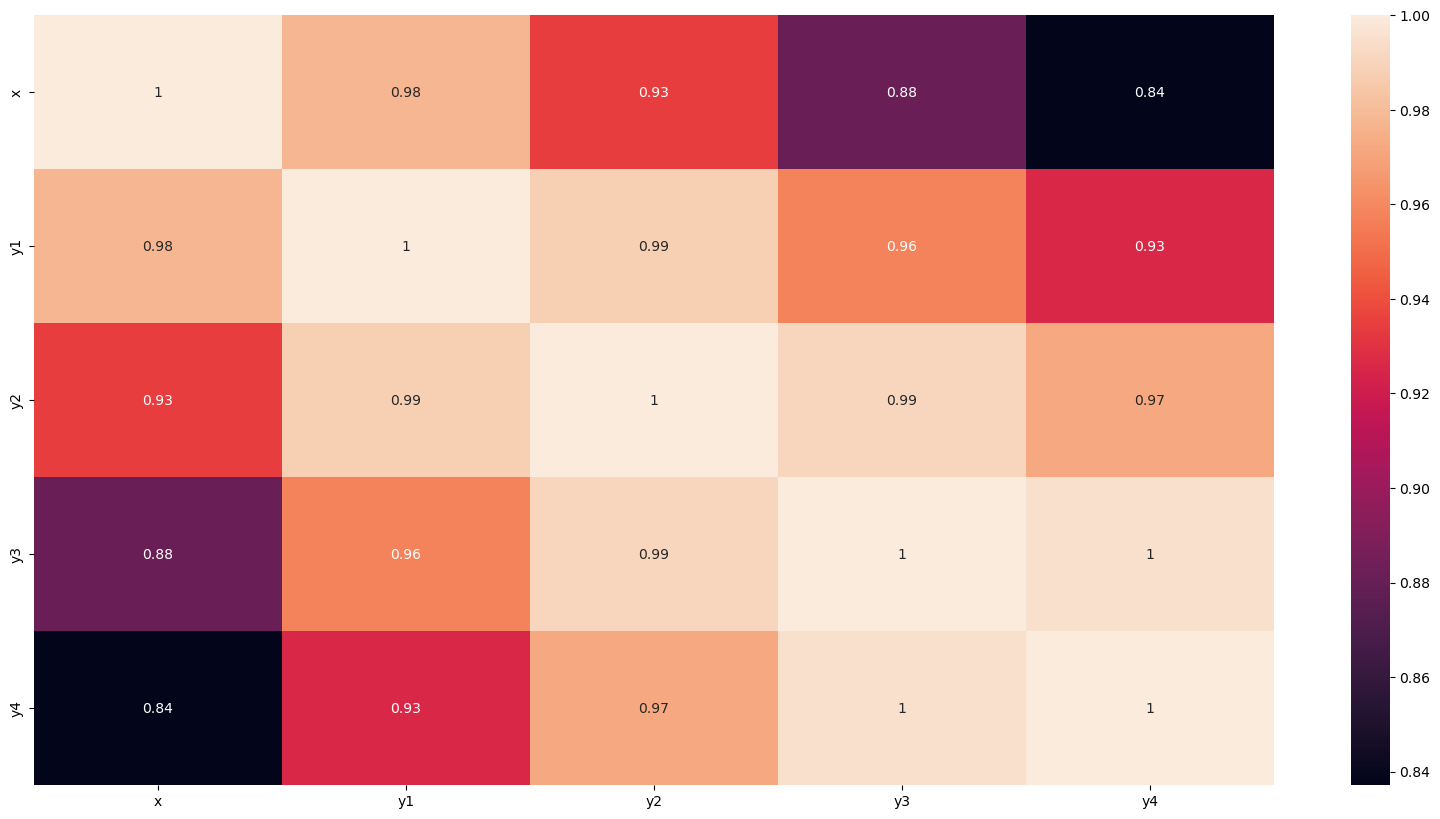

In [42]:
sns.heatmap(dfq.corr(numeric_only=True), annot=True)
plt.rcParams['figure.figsize'] = (20,10)
plt.show()

In [43]:
# CONCLUSION: 
# 'corr' Method of Pandas is accurate enough until cube equation, but for higher order equation, is much less.
# Correlation value of 0.8 is still can be regarded as correlated enough, due to corr method algorithm limitation.

In [44]:
# The plot of all data of all Columns/parameters
df1

Unnamed: 0                       date  temperature_2m  \
437          437  2025-03-19 05:00:00+00:00       14.459500   
438          438  2025-03-19 06:00:00+00:00       13.459500   
439          439  2025-03-19 07:00:00+00:00       12.659500   
440          440  2025-03-19 08:00:00+00:00       12.159500   
441          441  2025-03-19 09:00:00+00:00       11.559500   
...          ...                        ...             ...   
2227        2227  2025-06-01 19:00:00+00:00       39.169502   
2228        2228  2025-06-01 20:00:00+00:00       39.219500   
2229        2229  2025-06-01 21:00:00+00:00       39.269500   
2230        2230  2025-06-01 22:00:00+00:00       39.219500   
2231        2231  2025-06-01 23:00:00+00:00       38.669502   

      relative_humidity_2m  dew_point_2m  apparent_temperature  \
437                   14.0    -12.757421              8.626808   
438                   17.0    -11.145491              8.152900   
439                   20.0     -9.752880              7.904532   
440                   21.0     -9.549829              7.835932   
441                   22.0     -9.461175              7.294112   
...                    ...           ...                   ...   
2227                  11.0      3.341017             36.008010   
2228                  11.0      3.379128             35.056602   
2229                  12.0      4.657262             36.113987   
2230                  12.0      4.618772             35.940290   
2231                  12.0      4.195249             33.902687   

      precipitation_probability  precipitation  rain  showers  pressure_msl  \
437                         0.0            0.0   0.0      0.0        1024.6   
438                         0.0            0.0   0.0      0.0        1025.4   
439                         0.0            0.0   0.0      0.0        1026.2   
440                         0.0            0.0   0.0      0.0        1026.8   
441                         0.0            0.0   0.0      0.0        1027.4   
...                         ...            ...   ...      ...           ...   
2227                        1.0            0.0   0.0      0.0        1005.9   
2228                        1.0            0.0   0.0      0.0        1005.2   
2229                        2.0            0.0   0.0      0.0        1004.7   
2230                        2.0            0.0   0.0      0.0        1003.7   
2231                        3.0            0.0   0.0      0.0        1003.6   

      surface_pressure  cloud_cover  cloud_cover_low  cloud_cover_mid  \
437          953.57040          0.0              0.0              0.0   
438          954.07745          0.0              0.0              0.0   
439          954.63040          0.0              0.0              0.0   
440          955.06824          0.0              0.0              0.0   
441          955.48145          0.0              0.0              0.0   
...                ...          ...              ...              ...   
2227         941.46960        100.0              0.0              1.0   
2228         940.82416        100.0              0.0              0.0   
2229         940.36640        100.0              0.0              5.0   
2230         939.42020         55.0              0.0              0.0   
2231         939.21796         76.0              0.0              0.0   

      cloud_cover_high  visibility  wind_speed_10m  soil_moisture_0_to_1cm  \
437                0.0     24140.0       16.343367                   0.038   
438                0.0     24140.0       13.493999                   0.038   
439                0.0     24140.0       10.440000                   0.038   
440                0.0     24140.0        7.594208                   0.038   
441                0.0     24140.0        7.244860                   0.038   
...                ...         ...             ...                     ...   
2227             100.0     90000.0       23.950148                   0.032   
2228  

In [45]:
# Try to find the other Columns value when the 'temperature_2m' is maximum
#temperature_2m_max = df[df1.columns[1]].max()  # OR temperature_2m_max = df['temperature_2m'].max()
temperature_2m_max = df1['temperature_2m'].max()
print(temperature_2m_max)
df1ht2mmax = df1.where(df1['temperature_2m'] == temperature_2m_max)
df1ht2mmax = df1ht2mmax.dropna()
df1ht2mmax[['date','temperature_2m','relative_humidity_2m','dew_point_2m','precipitation_probability','cloud_cover_low','cloud_cover_mid',
            'cloud_cover_high','wind_speed_10m','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm',
            'soil_moisture_3_to_9cm','vapour_pressure_deficit','temperature_80m','soil_temperature_0cm']]

41.3195


date  temperature_2m  relative_humidity_2m  \
2206  2025-05-31 22:00:00+00:00         41.3195                   7.0   

      dew_point_2m  precipitation_probability  cloud_cover_low  \
2206     -1.346894                        0.0              0.0   

      cloud_cover_mid  cloud_cover_high  wind_speed_10m  \
2206             46.0               0.0        5.116561   

      soil_moisture_0_to_1cm  soil_moisture_1_to_3cm  soil_moisture_3_to_9cm  \
2206                   0.031                   0.077                   0.106   

      vapour_pressure_deficit  temperature_80m  soil_temperature_0cm  
2206                 7.356871        37.809998                50.064

In [46]:
# Try to find the other Columns value when the 'temperature_2m' is minimum
temperature_2m_min = df1['temperature_2m'].min()
print(temperature_2m_min)
df1ht2mmin = df1.where(df1['temperature_2m'] == temperature_2m_min)
df1ht2mmin = df1ht2mmin.dropna()
df1ht2mmin[['date','temperature_2m','relative_humidity_2m','dew_point_2m','precipitation_probability','cloud_cover_low','cloud_cover_mid',
            'cloud_cover_high','wind_speed_10m','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm',
            'soil_moisture_3_to_9cm','vapour_pressure_deficit','temperature_80m','soil_temperature_0cm']]

6.4195


date  temperature_2m  relative_humidity_2m  \
805  2025-04-03 13:00:00+00:00          6.4195                  62.0   

     dew_point_2m  precipitation_probability  cloud_cover_low  \
805     -0.337105                        0.0             38.0   

     cloud_cover_mid  cloud_cover_high  wind_speed_10m  \
805             42.0               0.0        4.379589   

     soil_moisture_0_to_1cm  soil_moisture_1_to_3cm  soil_moisture_3_to_9cm  \
805                   0.073                   0.041                   0.093   

     vapour_pressure_deficit  temperature_80m  soil_temperature_0cm  
805                 0.366641             7.41                 6.114

In [47]:
# Find values when the 'precipitation_probability' is Maximum
precipitation_probability_max = df1['precipitation_probability'].max()
print(precipitation_probability_max)
df1hppmax = df1.where(df1['precipitation_probability'] == precipitation_probability_max).sort_values(by = ['cloud_cover_mid','soil_moisture_0_to_1cm'], ascending=[False,False])
df1hppmax = df1hppmax.dropna()
df1hppmax[['date','temperature_2m','relative_humidity_2m','dew_point_2m','precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm',
           'cloud_cover_low','cloud_cover_high','wind_speed_10m','soil_moisture_1_to_3cm',
            'soil_moisture_3_to_9cm','vapour_pressure_deficit','temperature_80m','soil_temperature_0cm']]

70.0


date  temperature_2m  relative_humidity_2m  \
1583  2025-05-05 23:00:00+00:00         15.3695                  93.0   

      dew_point_2m  precipitation_probability  cloud_cover_mid  \
1583     14.243151                       70.0             80.0   

      soil_moisture_0_to_1cm  cloud_cover_low  cloud_cover_high  \
1583                   0.264             75.0              60.0   

      wind_speed_10m  soil_moisture_1_to_3cm  soil_moisture_3_to_9cm  \
1583       12.682018                   0.135                   0.137   

      vapour_pressure_deficit  temperature_80m  soil_temperature_0cm  
1583                 0.122335            14.21             17.564001

In [48]:
# Find values when the 'precipitation_probability' is 50%
df1hpp50 = df1.where(df1['precipitation_probability'] == 50).sort_values(by = ['cloud_cover_mid'], ascending=[False])
df1hpp50 = df1hpp50.dropna()
df1hpp50[['date','temperature_2m','relative_humidity_2m','dew_point_2m','precipitation_probability','cloud_cover_mid','cloud_cover_low',
            'cloud_cover_high','wind_speed_10m','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm',
            'soil_moisture_3_to_9cm','vapour_pressure_deficit','temperature_80m','soil_temperature_0cm']]

Empty DataFrame
Columns: [date, temperature_2m, relative_humidity_2m, dew_point_2m, precipitation_probability, cloud_cover_mid, cloud_cover_low, cloud_cover_high, wind_speed_10m, soil_moisture_0_to_1cm, soil_moisture_1_to_3cm, soil_moisture_3_to_9cm, vapour_pressure_deficit, temperature_80m, soil_temperature_0cm]
Index: []

In [49]:
# Find values when the 'precipitation_probability' is Minimum
precipitation_probability_min = df1['precipitation_probability'].min()
print(precipitation_probability_min)
df1hppmin = df1.where(df1['precipitation_probability'] == precipitation_probability_min).sort_values(by = ['cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_3_to_9cm','cloud_cover_low',
            'relative_humidity_2m','cloud_cover_high','dew_point_2m',
            'vapour_pressure_deficit'], ascending=[True,True,True,True,True,True,True,True]).head(5)
df1hppmin = df1hppmin.dropna()
df1hppmin[['date','temperature_2m','precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm',
           'soil_moisture_3_to_9cm','relative_humidity_2m','cloud_cover_high','dew_point_2m','vapour_pressure_deficit',
           'cloud_cover_low','wind_speed_10m','soil_moisture_1_to_3cm','temperature_80m','soil_temperature_0cm']]

0.0


date  temperature_2m  precipitation_probability  \
468   2025-03-20 12:00:00+00:00         12.3595                        0.0   
1009  2025-04-12 01:00:00+00:00         34.8695                        0.0   
1010  2025-04-12 02:00:00+00:00         32.5195                        0.0   
1006  2025-04-11 22:00:00+00:00         35.0195                        0.0   
1007  2025-04-11 23:00:00+00:00         35.3695                        0.0   

      cloud_cover_mid  soil_moisture_0_to_1cm  soil_moisture_3_to_9cm  \
468              -1.0                   0.038                   0.100   
1009              0.0                   0.030                   0.088   
1010              0.0                   0.030                   0.088   
1006              0.0                   0.030                   0.088   
1007              0.0                   0.030                   0.088   

      relative_humidity_2m  cloud_cover_high  dew_point_2m  \
468                   14.0             100.0    -14.438404   
1009                   6.0               0.0     -8.026972   
1010                   7.0               0.0     -7.733895   
1006                   7.0               0.0     -5.913356   
1007                   7.0               0.0     -5.658859   

      vapour_pressure_deficit  cloud_cover_low  wind_speed_10m  \
468                  1.236642              0.0        6.109403   
1009                 5.248589              0.0        8.311245   
1010                 4.554785              0.0       17.709658   
1006                 5.235899              0.0       18.875126   
1007                 5.337968              0.0       15.077082   

      soil_moisture_1_to_3cm  temperature_80m  soil_temperature_0cm  
468                    0.067        11.910000                 5.614  
1009                   0.043        33.359997                33.064  
1010                   0.043        32.110000                28.664  
1006                   0.043        31.960001                42.764  
1007                   0.043        32.710000                40.264

In [111]:
# Try to find the other Columns value when the 'relative_humidity_2m' is maximum
relative_humidity_2m_max = df1['relative_humidity_2m'].max()
print(relative_humidity_2m_max)
df1hrh2mmax = df1.where(df1['relative_humidity_2m'] == relative_humidity_2m_max)
df1hrh2mmax = df1hrh2mmax.dropna()
df1hrh2mmax[['date','relative_humidity_2m','temperature_2m','dew_point_2m','precipitation_probability','cloud_cover_low','cloud_cover_mid',
            'cloud_cover_high','wind_speed_10m','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm',
            'soil_moisture_3_to_9cm','vapour_pressure_deficit','temperature_80m','soil_temperature_0cm']]

96.0


date  relative_humidity_2m  temperature_2m  \
1597  2025-05-06 13:00:00+00:00                  96.0         14.3695   

      dew_point_2m  precipitation_probability  cloud_cover_low  \
1597     13.739599                        4.0            100.0   

      cloud_cover_mid  cloud_cover_high  wind_speed_10m  \
1597             34.0               0.0        3.219938   

      soil_moisture_0_to_1cm  soil_moisture_1_to_3cm  soil_moisture_3_to_9cm  \
1597                   0.206                   0.204                   0.158   

      vapour_pressure_deficit  temperature_80m  soil_temperature_0cm  
1597                 0.065552            13.51                14.064

In [ ]:
# Unique Fact: when the 'relative_humidity_2m' reach Maximum value, the 'precipitation_probability' reach almost zero percent (4%).
# This contradicts common logic, which suggests high humidity increases precipitation chances.

In [112]:
# Find values when the 'relative_humidity_2m' is 50%
df1hrh50 = df1.where(df1['relative_humidity_2m'] == 50).sort_values(by = ['precipitation_probability'], ascending=[False])
df1hrh50 = df1hrh50.dropna()
df1hrh50[['date','relative_humidity_2m','temperature_2m','vapour_pressure_deficit','dew_point_2m','precipitation_probability','cloud_cover_mid','cloud_cover_low',
            'cloud_cover_high','wind_speed_10m','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm',
            'soil_moisture_3_to_9cm','temperature_80m','soil_temperature_0cm']]

date  relative_humidity_2m  temperature_2m  \
788   2025-04-02 20:00:00+00:00                  50.0       11.819500   
1612  2025-05-07 04:00:00+00:00                  50.0       16.469501   
783   2025-04-02 15:00:00+00:00                  50.0        8.869500   
1604  2025-05-06 20:00:00+00:00                  50.0       20.019500   
1603  2025-05-06 19:00:00+00:00                  50.0       21.669500   
1641  2025-05-08 09:00:00+00:00                  50.0       17.769500   

      vapour_pressure_deficit  dew_point_2m  precipitation_probability  \
788                  0.694066      1.725359                       15.0   
1612                 0.937701      6.011217                       10.0   
783                  0.570095     -0.996837                        6.0   
1604                 1.171222      9.279046                        6.0   
1603                 1.296059     10.796674                        5.0   
1641                 1.017986      7.208303                        0.0   

      cloud_cover_mid  cloud_cover_low  cloud_cover_high  wind_speed_10m  \
788             100.0             13.0               0.0       23.977188   
1612             99.0              0.0               0.0       21.933426   
783             100.0            100.0               0.0       29.810522   
1604            100.0            100.0               0.0        8.647496   
1603             13.0             20.0               0.0        8.145870   
1641              0.0              0.0               0.0        7.091177   

      soil_moisture_0_to_1cm  soil_moisture_1_to_3cm  soil_moisture_3_to_9cm  \
788                    0.096                   0.058                   0.094   
1612                   0.232                   0.178                   0.174   
783                    0.043                   0.058                   0.094   
1604                   0.158                   0.186                   0.161   
1603                   0.171                   0.189                   0.161   
1641                   0.129                   0.180                   0.191   

      temperature_80m  soil_temperature_0cm  
788          9.860001             25.864000  
1612        14.960000             15.864000  
783          8.810000             12.464001  
1604        19.110000             25.214000  
1603        18.010000             24.714000  
1641        22.660000             17.414000

In [ ]:
# Conclusion: when 'relative_humidity_2m' reaches 50%, the highest 'precipitation_probability' is 15%.
# This is less than half the 'precipitation_probability' in Las Vegas.

In [113]:
# Try to find the other Columns value when the 'relative_humidity_2m' is minimum
relative_humidity_2m_min = df1['relative_humidity_2m'].min()
print(relative_humidity_2m_min)
df1hrh2mmin = df1.where(df1['relative_humidity_2m'] == relative_humidity_2m_min)
df1hrh2mmin = df1hrh2mmin.dropna()
df1hrh2mmin[['date','relative_humidity_2m','temperature_2m','dew_point_2m','precipitation_probability','cloud_cover_low','cloud_cover_mid',
            'cloud_cover_high','wind_speed_10m','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm',
            'soil_moisture_3_to_9cm','vapour_pressure_deficit','temperature_80m','soil_temperature_0cm']].sort_values(by='precipitation_probability', ascending=True)

4.0


date  relative_humidity_2m  temperature_2m  \
1990  2025-05-22 22:00:00+00:00                   4.0       37.869500   
1991  2025-05-22 23:00:00+00:00                   4.0       38.069500   
1992  2025-05-23 00:00:00+00:00                   4.0       37.519500   
2015  2025-05-23 23:00:00+00:00                   4.0       36.619500   
2017  2025-05-24 01:00:00+00:00                   4.0       35.419502   
2018  2025-05-24 02:00:00+00:00                   4.0       34.469500   

      dew_point_2m  precipitation_probability  cloud_cover_low  \
1990    -11.091969                        0.0              0.0   
1991    -10.955633                        0.0              0.0   
1992    -11.330648                        0.0              0.0   
2015    -11.944863                        0.0              0.0   
2017    -12.764890                        0.0              0.0   
2018    -13.414946                        0.0              0.0   

      cloud_cover_mid  cloud_cover_high  wind_speed_10m  \
1990              0.0               0.0       26.525429   
1991              0.0               0.0       25.864943   
1992              0.0               0.0       27.059933   
2015              0.0               0.0       25.772078   
2017              0.0               0.0       25.704100   
2018              0.0               0.0       21.129883   

      soil_moisture_0_to_1cm  soil_moisture_1_to_3cm  soil_moisture_3_to_9cm  \
1990                   0.033                   0.088                   0.115   
1991                   0.033                   0.088                   0.115   
1992                   0.033                   0.088                   0.115   
2015                   0.033                   0.086                   0.113   
2017                   0.033                   0.086                   0.113   
2018                   0.033                   0.086                   0.113   

      vapour_pressure_deficit  temperature_80m  soil_temperature_0cm  
1990                 6.316258        34.059998             43.814000  
1991                 6.384925        34.109997             41.514000  
1992                 6.197625        34.410000             38.963997  
2015                 5.901392        33.010000             41.064000  
2017                 5.525542        32.960000             35.413998  
2018                 5.242886        32.960000             31.914000

In [ ]:
# Conclusion: 
# - when the 'relative_humidity_2m' reaches minimum (4%), the 'precipitation_probability' reaches minimum also (0%).
# - when the 'relative_humidity_2m' reaches minimum (4%), the 'dew_point_2m' reaches very low also (-13.4C) (lower than Nashville, -3.68C).

In [50]:
# Find Daily Average of Precipitation Probability (Table)
dfda1 = df1.groupby('ymd')[df1h.columns[0:]].mean().sort_values('precipitation_probability', ascending=False).head(5)
dfda1

precipitation_probability  cloud_cover_mid  \
ymd                                                      
2025-05-04                  25.833333        90.166667   
2025-05-06                  16.041667        46.166667   
2025-05-05                  15.083333        87.833333   
2025-04-02                   6.541667        69.541667   
2025-04-03                   3.166667        56.916667   

            soil_moisture_0_to_1cm  soil_moisture_1_to_3cm  \
ymd                                                          
2025-05-04                0.068042                0.067083   
2025-05-06                0.198167                0.192750   
2025-05-05                0.088417                0.091833   
2025-04-02                0.050708                0.058167   
2025-04-03                0.073500                0.040042   

            relative_humidity_2m  dew_point_2m  vapour_pressure_deficit  \
ymd                                                                       
2025-05-04             46.125000      7.227499                 1.409673   
2025-05-06             80.708333     12.630033                 0.416490   
2025-05-05             61.750000      9.809922                 0.780684   
2025-04-02             34.041667     -4.608082                 1.001607   
2025-04-03             41.166667     -1.681834                 0.864802   

            temperature_2m  cloud_cover_high  cloud_cover_low  wind_speed_10m  \
ymd                                                                             
2025-05-04       20.388250         84.416667        41.875000       13.252176   
2025-05-06       16.373667          4.083333        77.791667        5.971521   
2025-05-05       17.438250         43.166667        47.416667        7.254426   
2025-04-02       12.475750          0.000000        13.583333       20.729977   
2025-04-03       11.790333          0.000000        19.958333        8.770723   

            soil_moisture_3_to_9cm  temperature_80m  soil_temperature_0cm  
ymd                                                                        
2025-05-04                0.104875        19.235000             23.645250  
2025-05-06                0.154250        15.266250             18.634834  
2025-05-05                0.136167        15.976667             20.030667  
2025-04-02                0.093875        11.568334             16.072334  
2025-04-03                0.093000         9.916250             15.389000

In [51]:
# Find Daily Average of relative_humidity_2m (Table)
dfda1 = df1.groupby('ymd')[df1h.columns[[4,0]]].mean().sort_values('relative_humidity_2m', ascending=False).head(5)
dfda1

relative_humidity_2m  precipitation_probability
ymd                                                        
2025-05-06             80.708333                  16.041667
2025-05-05             61.750000                  15.083333
2025-05-07             47.625000                   2.750000
2025-05-04             46.125000                  25.833333
2025-04-03             41.166667                   3.166667

array([<Axes: xlabel='ymd'>, <Axes: xlabel='ymd'>], dtype=object)

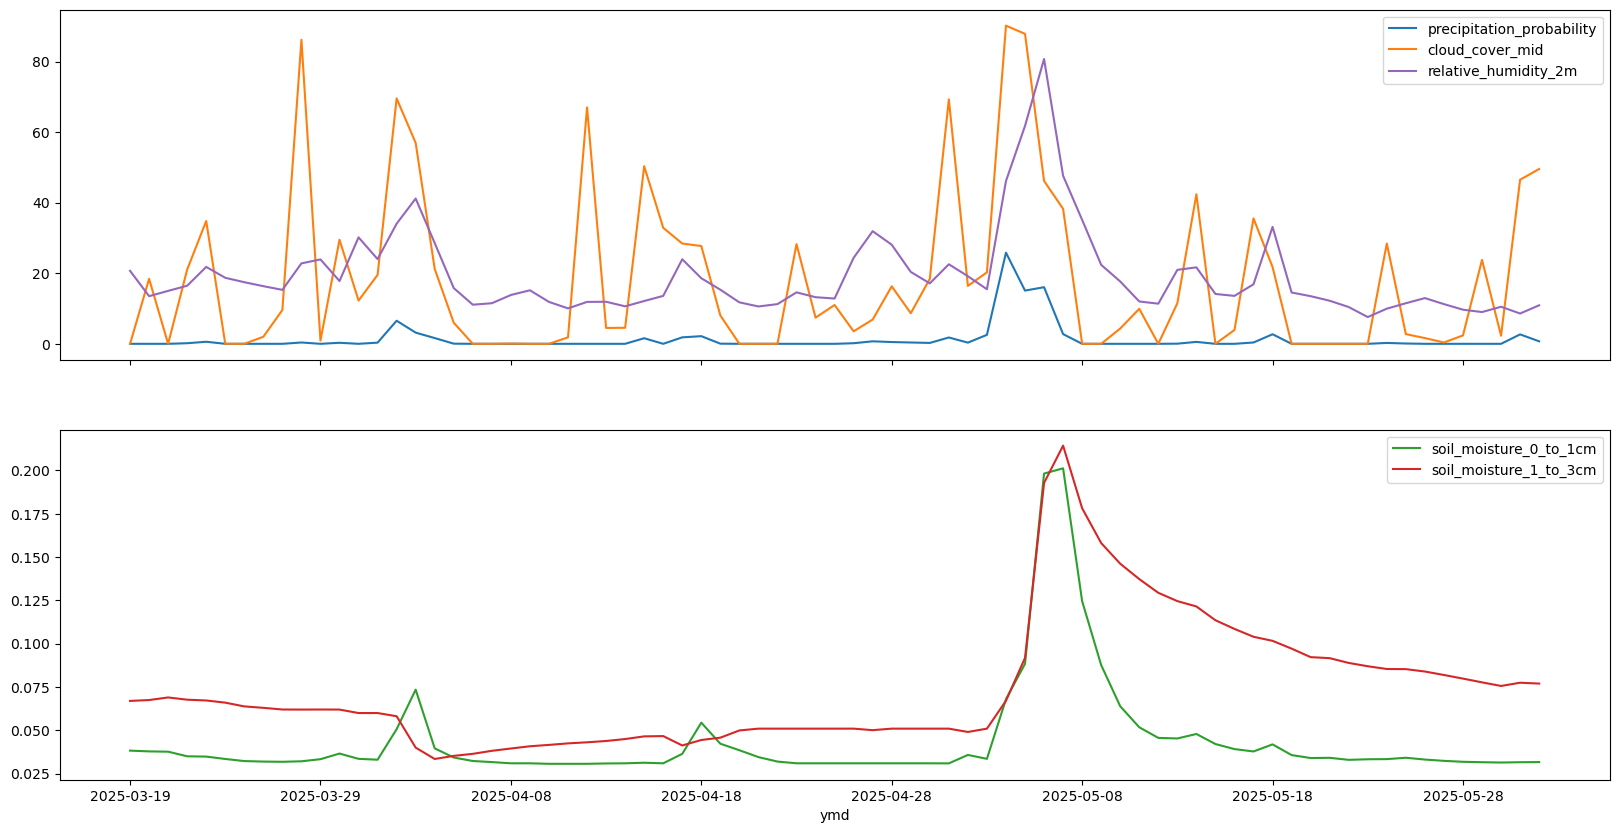

In [52]:
# Find Daily Average of Precipitation Probability (Plot)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)  # Set global size for all plots
dfda2 = df1.groupby('ymd')[['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','relative_humidity_2m']].mean().sort_values('ymd', ascending=True)
dfda2.plot(subplots=[('precipitation_probability','cloud_cover_mid','relative_humidity_2m'),('soil_moisture_0_to_1cm','soil_moisture_1_to_3cm')])

In [107]:
# Find Daily Average of Relative Humidity 2m (Table)
dfda3 = df1.groupby('ymd')[df1h.columns[[4,0]]].mean().sort_values('relative_humidity_2m', ascending=False).head(10)
dfda3

relative_humidity_2m  precipitation_probability
ymd                                                        
2025-05-06             80.708333                  16.041667
2025-05-05             61.750000                  15.083333
2025-05-07             47.625000                   2.750000
2025-05-04             46.125000                  25.833333
2025-04-03             41.166667                   3.166667
2025-05-08             35.125000                   0.000000
2025-04-02             34.041667                   6.541667
2025-05-18             33.125000                   2.708333
2025-04-27             31.916667                   0.708333
2025-03-31             30.166667                   0.000000

In [53]:
# Find Monthly Average values of Precipitation Probability (Table)
dfma1 = df1.groupby(['year','month'])[df1h.columns[0:]].mean().sort_values(by = ['precipitation_probability','cloud_cover_mid',
                                        'soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','soil_moisture_3_to_9cm','cloud_cover_low',
                                        'relative_humidity_2m','cloud_cover_high','dew_point_2m','vapour_pressure_deficit'], 
                                        ascending=[False,False,False,False,False,False,False,False,False,False])
dfma1

precipitation_probability  cloud_cover_mid  \
year month                                               
2025 05                      2.291667        19.543011   
     06                      0.708333        49.541667   
     04                      0.644444        16.631944   
     03                      0.110749        16.781759   

            soil_moisture_0_to_1cm  soil_moisture_1_to_3cm  \
year month                                                   
2025 05                   0.055297                0.104656   
     06                   0.031708                0.077000   
     04                   0.035333                0.046068   
     03                   0.034495                0.064528   

            relative_humidity_2m  dew_point_2m  vapour_pressure_deficit  \
year month                                                                
2025 05                21.094086     -1.432394                 3.013983   
     06                10.916667      0.225036                 5.343179   
     04                17.704167     -6.591822                 2.215045   
     03                19.198697     -4.984482                 1.991165   

            temperature_2m  cloud_cover_high  cloud_cover_low  wind_speed_10m  \
year month                                                                      
2025 05          26.219500         11.091398         5.444892       12.789477   
     06          35.834084         64.125000         0.000000       17.594226   
     04          20.750542         11.543056         1.559722       13.329188   
     03          19.878979         34.921824         0.032573       11.694789   

            soil_moisture_3_to_9cm  temperature_80m  soil_temperature_0cm  
year month                                                                 
2025 05                   0.129192        25.585807             28.517293  
     06                   0.106000        33.482916             36.422333  
     04                   0.088725        20.237639             23.047889  
     03                   0.097678        19.683290             20.777681

array([<Axes: xlabel='year,month'>, <Axes: xlabel='year,month'>],
      dtype=object)

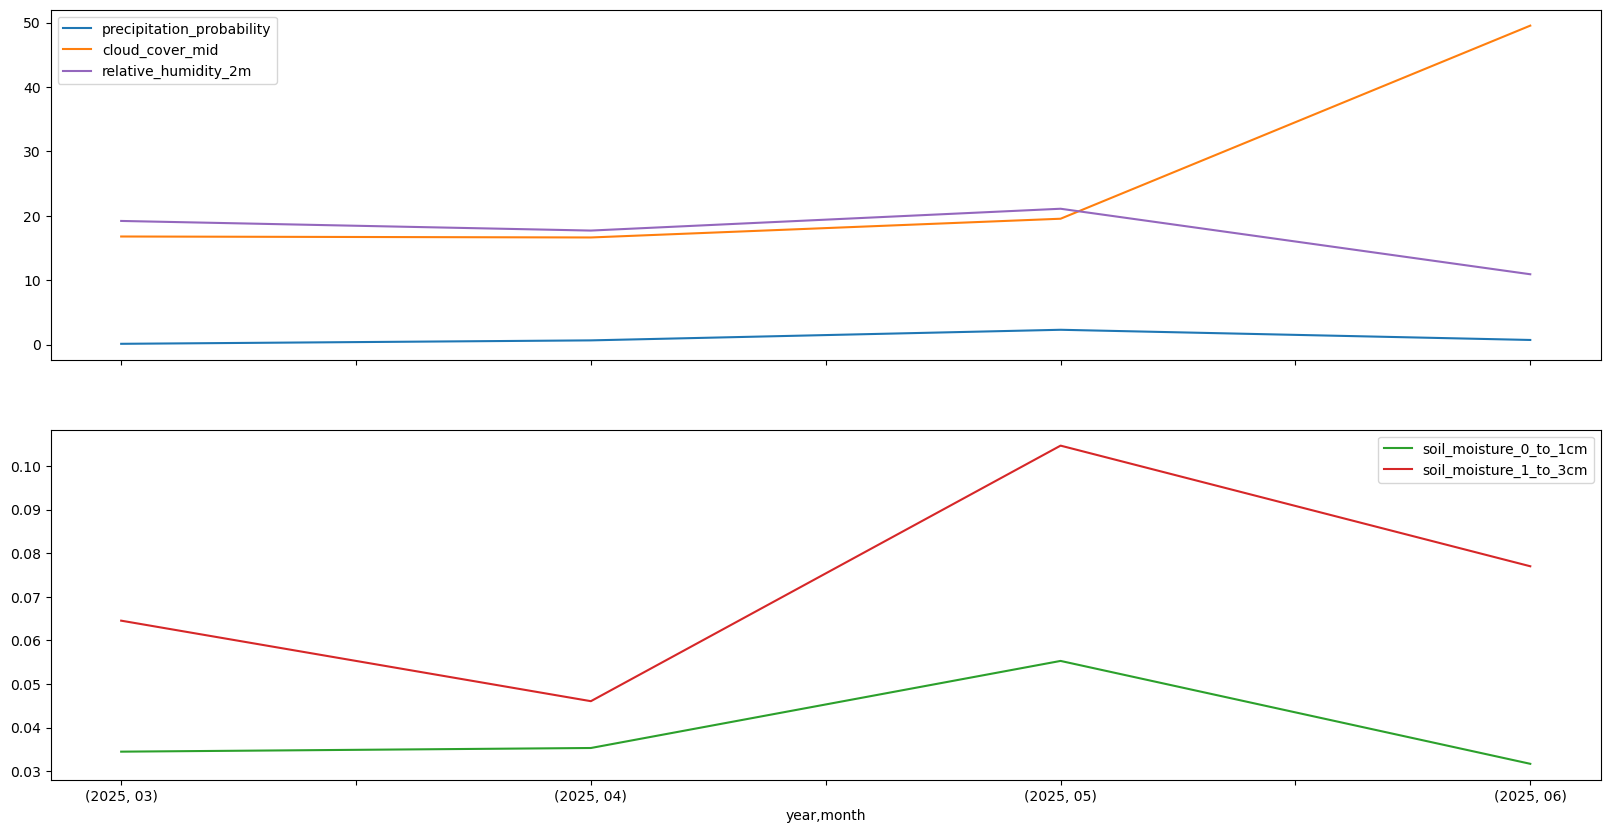

In [54]:
# Find Monthly Average values of Precipitation Probability (Plot)
dfma2 = df1.groupby(['year','month'])[['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','relative_humidity_2m']].mean().sort_values(by = ['year', 'month'], ascending=[True,True])
# dfma2.plot(subplots=[('precipitation_probability', 'soil_moisture_0_to_1cm')])
dfma2.plot(subplots=[('precipitation_probability','cloud_cover_mid','relative_humidity_2m'),('soil_moisture_0_to_1cm','soil_moisture_1_to_3cm')])

In [108]:
# Find Monthly Average values of Relative Humidity 2m (Table)
dfma3 = df1.groupby(['year','month'])[df1h.columns[[4,0]]].mean().sort_values(by = ['relative_humidity_2m'], ascending=[False])
dfma3

relative_humidity_2m  precipitation_probability
year month                                                 
2025 05                21.094086                   2.291667
     03                19.198697                   0.110749
     04                17.704167                   0.644444
     06                10.916667                   0.708333

In [55]:
# Find Hourly Average values of Precipitation Probability (Table)
dfha1 = df1.groupby(['hmstz'])[df1h.columns[0:]].mean().sort_values(by = ['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','soil_moisture_3_to_9cm','cloud_cover_low',
            'relative_humidity_2m','cloud_cover_high','dew_point_2m',
            'vapour_pressure_deficit'], ascending=[False,False,False,False,False,False,False,False,False,False])
dfha1

precipitation_probability  cloud_cover_mid  \
hmstz                                                        
23:00:00+00:00                   2.106667        24.253333   
22:00:00+00:00                   1.920000        21.093333   
00:00:00+00:00                   1.662162        22.432432   
21:00:00+00:00                   1.586667        19.106667   
19:00:00+00:00                   1.466667        16.306667   
06:00:00+00:00                   1.413333        19.693333   
05:00:00+00:00                   1.413333        17.186667   
20:00:00+00:00                   1.413333        16.506667   
16:00:00+00:00                   1.400000        11.626667   
01:00:00+00:00                   1.364865        22.135135   
17:00:00+00:00                   1.253333        12.826667   
15:00:00+00:00                   1.186667        15.160000   
04:00:00+00:00                   1.148649        19.527027   
18:00:00+00:00                   1.146667        15.560000   
02:00:00+00:00                   1.108108        20.959459   
07:00:00+00:00                   1.106667        18.240000   
14:00:00+00:00                   1.093333        18.653333   
03:00:00+00:00                   1.067568        18.702703   
13:00:00+00:00                   1.040000        16.733333   
08:00:00+00:00                   1.013333        20.546667   
12:00:00+00:00                   0.920000        16.946667   
10:00:00+00:00                   0.693333        18.960000   
11:00:00+00:00                   0.640000        19.173333   
09:00:00+00:00                   0.520000        17.133333   

                soil_moisture_0_to_1cm  soil_moisture_1_to_3cm  \
hmstz                                                            
23:00:00+00:00                0.044000                0.073373   
22:00:00+00:00                0.042773                0.073333   
00:00:00+00:00                0.042459                0.073824   
21:00:00+00:00                0.042973                0.073427   
19:00:00+00:00                0.043933                0.073627   
06:00:00+00:00                0.043480                0.074360   
05:00:00+00:00                0.043453                0.074373   
20:00:00+00:00                0.043480                0.073507   
16:00:00+00:00                0.045493                0.073733   
01:00:00+00:00                0.041703                0.073824   
17:00:00+00:00                0.045400                0.073640   
15:00:00+00:00                0.044147                0.073853   
04:00:00+00:00                0.043095                0.073892   
18:00:00+00:00                0.044920                0.073693   
02:00:00+00:00                0.042000                0.073865   
07:00:00+00:00                0.043573                0.074533   
14:00:00+00:00                0.043573                0.073960   
03:00:00+00:00                0.041608                0.073892   
13:00:00+00:00                0.043413                0.074093   
08:00:00+00:00                0.043373                0.074467   
12:00:00+00:00                0.043400                0.074200   
10:00:00+00:00                0.043240                0.074200   
11:00:00+00:00                0.043200                0.074133   
09:00:00+00:00                0.043213                0.074333   

                relative_humidity_2m  dew_point_2m  vapour_pressure_deficit  \
hmstz                                                                         
23:00:00+00:00             13.706667     -4.714941                 3.636448   
22:00:00+00:00             14.213333     -4.141996                 3.557681   
00:00:00+00:00             13.270270     -4.899519                 3.613658   
21:00:00+00:00             14.866667     -3.568545                 3.451940   
19:00:00+00:00             16.560000     -2.963268                 3.088773   
06:00:00+00:00             18.973333     -4.692392                 2.273213   
05:00:00+00:00             18.146667     -4.985937    

array([<Axes: xlabel='hmstz'>, <Axes: xlabel='hmstz'>], dtype=object)

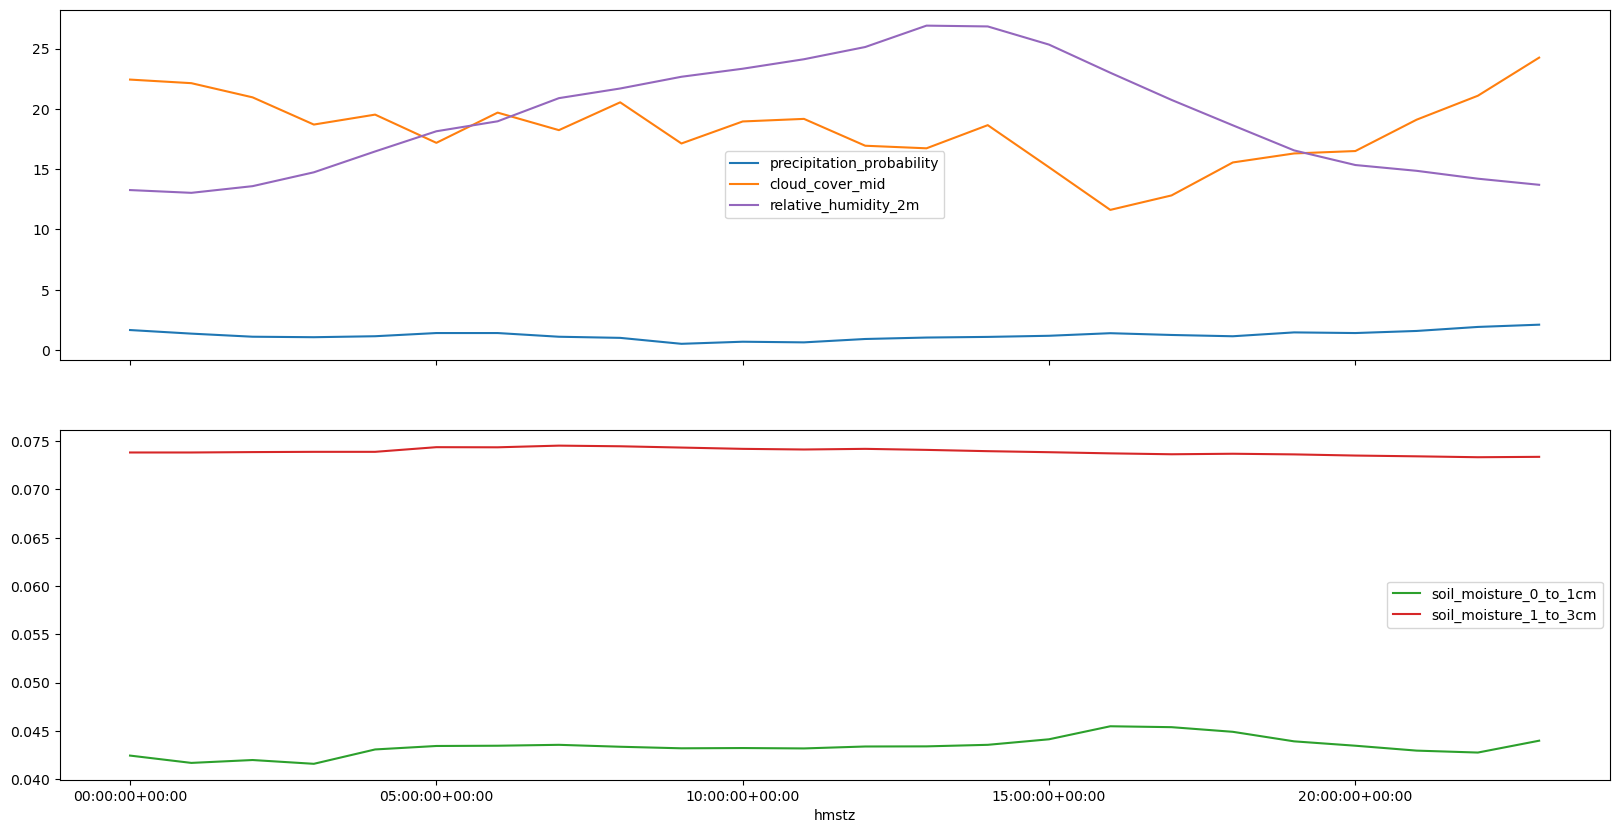

In [56]:
# Find Hourly Average values of Precipitation Probability (Plot)
dfha2 = df1.groupby(['hmstz'])[['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','relative_humidity_2m']].mean().sort_values(by = ['hmstz'], ascending=[True])
dfha2.plot(subplots=[('precipitation_probability','cloud_cover_mid','relative_humidity_2m'),('soil_moisture_0_to_1cm','soil_moisture_1_to_3cm')])

In [109]:
# Find Hourly Average values of Relative Humidity 2m (Table)
dfha3 = df1.groupby(['hmstz'])[df1h.columns[[4,0]]].mean().sort_values(by = ['relative_humidity_2m'], ascending=[False])
dfha3

relative_humidity_2m  precipitation_probability
hmstz                                                          
13:00:00+00:00             26.906667                   1.040000
14:00:00+00:00             26.840000                   1.093333
15:00:00+00:00             25.333333                   1.186667
12:00:00+00:00             25.133333                   0.920000
11:00:00+00:00             24.120000                   0.640000
10:00:00+00:00             23.333333                   0.693333
16:00:00+00:00             23.000000                   1.400000
09:00:00+00:00             22.666667                   0.520000
08:00:00+00:00             21.693333                   1.013333
07:00:00+00:00             20.893333                   1.106667
17:00:00+00:00             20.746667                   1.253333
06:00:00+00:00             18.973333                   1.413333
18:00:00+00:00             18.640000                   1.146667
05:00:00+00:00             18.146667                   1.413333
19:00:00+00:00             16.560000                   1.466667
04:00:00+00:00             16.472973                   1.148649
20:00:00+00:00             15.346667                   1.413333
21:00:00+00:00             14.866667                   1.586667
03:00:00+00:00             14.743243                   1.067568
22:00:00+00:00             14.213333                   1.920000
23:00:00+00:00             13.706667                   2.106667
02:00:00+00:00             13.594595                   1.108108
00:00:00+00:00             13.270270                   1.662162
01:00:00+00:00             13.040541                   1.364865

In [57]:
# Observation Result:
# - The fluctuation of average relative humidity has small impact to soil moisture. Maybe, it's due to partial condensation
#   phenomenon, so when the precipitation probability is relatively stable (almost flat), the soil moisture is still fluctuating.
#   This phenomenon is used in Fog Farming to supply fresh water in arid/semi-arid area by using a lot of nets to help water vapour condensation.

In [58]:
# Find Daily Maximum of Precipitation Probability (Table)
dfdmax1 = df1.groupby('ymd')[df1h.columns[0:]].max().sort_values('precipitation_probability', ascending=False).head(5)
dfdmax1

precipitation_probability  cloud_cover_mid  \
ymd                                                      
2025-05-05                       70.0            100.0   
2025-05-06                       54.0            100.0   
2025-05-04                       47.0            100.0   
2025-04-02                       23.0            100.0   
2025-05-03                       20.0             99.0   

            soil_moisture_0_to_1cm  soil_moisture_1_to_3cm  \
ymd                                                          
2025-05-05                   0.264                   0.135   
2025-05-06                   0.245                   0.206   
2025-05-04                   0.181                   0.072   
2025-04-02                   0.117                   0.060   
2025-05-03                   0.042                   0.051   

            relative_humidity_2m  dew_point_2m  vapour_pressure_deficit  \
ymd                                                                       
2025-05-05                  93.0     14.243151                 1.271882   
2025-05-06                  96.0     14.011498                 1.296059   
2025-05-04                  76.0     11.103669                 2.930076   
2025-04-02                  59.0      2.182480                 1.845239   
2025-05-03                  24.0      5.358303                 4.346065   

            temperature_2m  cloud_cover_high  cloud_cover_low  wind_speed_10m  \
ymd                                                                             
2025-05-05         20.6695              99.0            100.0       16.923830   
2025-05-06         21.6695              98.0            100.0       18.971008   
2025-05-04         27.6695              99.0            100.0       27.776047   
2025-04-02         18.4195               0.0            100.0       37.664326   
2025-05-03         32.2695             100.0              0.0       41.180286   

            soil_moisture_3_to_9cm  temperature_80m  soil_temperature_0cm  
ymd                                                                        
2025-05-05                   0.138        17.960001             24.264000  
2025-05-06                   0.161        22.160000             27.664000  
2025-05-04                   0.112        26.560000             31.664000  
2025-04-02                   0.094        15.560000             25.864000  
2025-05-03                   0.085        29.610000             41.463997

array([<Axes: xlabel='ymd'>, <Axes: xlabel='ymd'>], dtype=object)

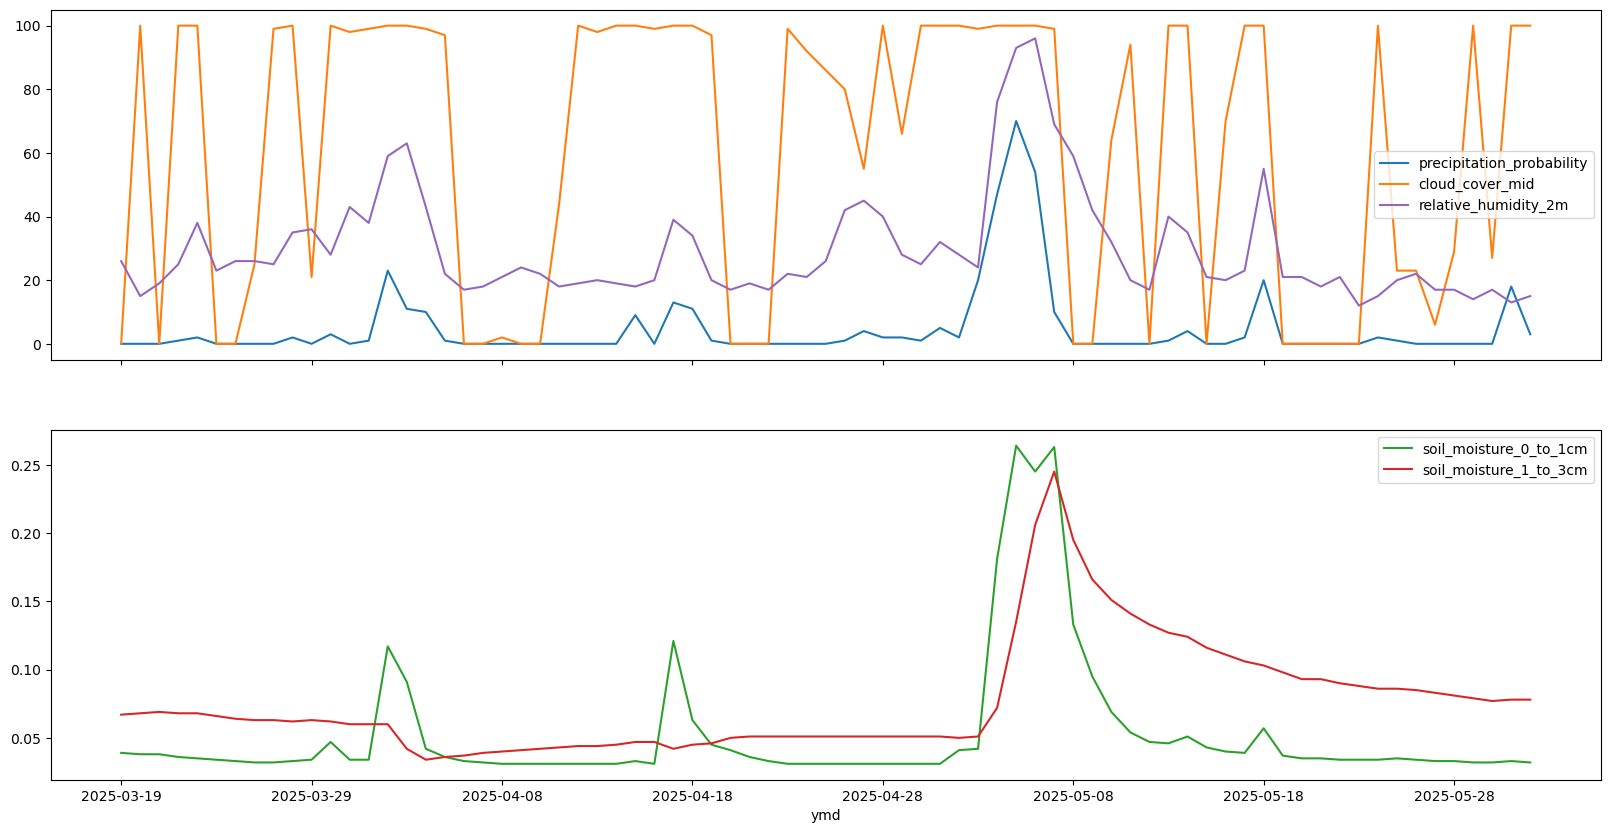

In [59]:
# Find Daily Maximum of Precipitation Probability (Plot)
dfdmax2 = df1.groupby('ymd')[['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','relative_humidity_2m']].max().sort_values('ymd', ascending=True)
dfdmax2.plot(subplots=[('precipitation_probability','cloud_cover_mid','relative_humidity_2m'),('soil_moisture_0_to_1cm','soil_moisture_1_to_3cm')])

In [60]:
# Find Daily Maximum of Relative Humidity 2m (Table)
dfdmax2 = df1.groupby('ymd')[df1h.columns[[4,0]]].max().sort_values('relative_humidity_2m', ascending=False).head(10)
dfdmax2

relative_humidity_2m  precipitation_probability
ymd                                                        
2025-05-06                  96.0                       54.0
2025-05-05                  93.0                       70.0
2025-05-04                  76.0                       47.0
2025-05-07                  69.0                       10.0
2025-04-03                  63.0                       11.0
2025-05-08                  59.0                        0.0
2025-04-02                  59.0                       23.0
2025-05-18                  55.0                       20.0
2025-04-27                  45.0                        4.0
2025-03-31                  43.0                        0.0

In [61]:
# Find Monthly Maximum values of Precipitation Probability (Table)
dfmmax1 = df1.groupby(['year','month'])[df1h.columns[0:]].max().sort_values(by = ['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','soil_moisture_3_to_9cm','cloud_cover_low',
            'relative_humidity_2m','cloud_cover_high','dew_point_2m',
            'vapour_pressure_deficit'], ascending=[False,False,False,False,False,False,False,False,False,False])
dfmmax1

precipitation_probability  cloud_cover_mid  \
year month                                               
2025 05                          70.0            100.0   
     04                          23.0            100.0   
     03                           3.0            100.0   
     06                           3.0            100.0   

            soil_moisture_0_to_1cm  soil_moisture_1_to_3cm  \
year month                                                   
2025 05                      0.264                   0.245   
     04                      0.121                   0.060   
     03                      0.047                   0.069   
     06                      0.032                   0.078   

            relative_humidity_2m  dew_point_2m  vapour_pressure_deficit  \
year month                                                                
2025 05                     96.0     14.243151                 7.356871   
     04                     63.0      3.911096                 5.367447   
     03                     43.0      4.301982                 4.619241   
     06                     15.0      4.657262                 7.146035   

            temperature_2m  cloud_cover_high  cloud_cover_low  wind_speed_10m  \
year month                                                                      
2025 05            41.3195             100.0            100.0       47.619442   
     04            35.4695             100.0            100.0       40.352130   
     03            32.7695             100.0              5.0       45.504055   
     06            40.7695             100.0              0.0       29.810522   

            soil_moisture_3_to_9cm  temperature_80m  soil_temperature_0cm  
year month                                                                 
2025 05                      0.194        38.010000             51.213997  
     04                      0.095        33.359997             44.814000  
     03                      0.101        30.310000             41.064000  
     06                      0.107        38.309998             45.614000

array([<Axes: xlabel='year,month'>, <Axes: xlabel='year,month'>],
      dtype=object)

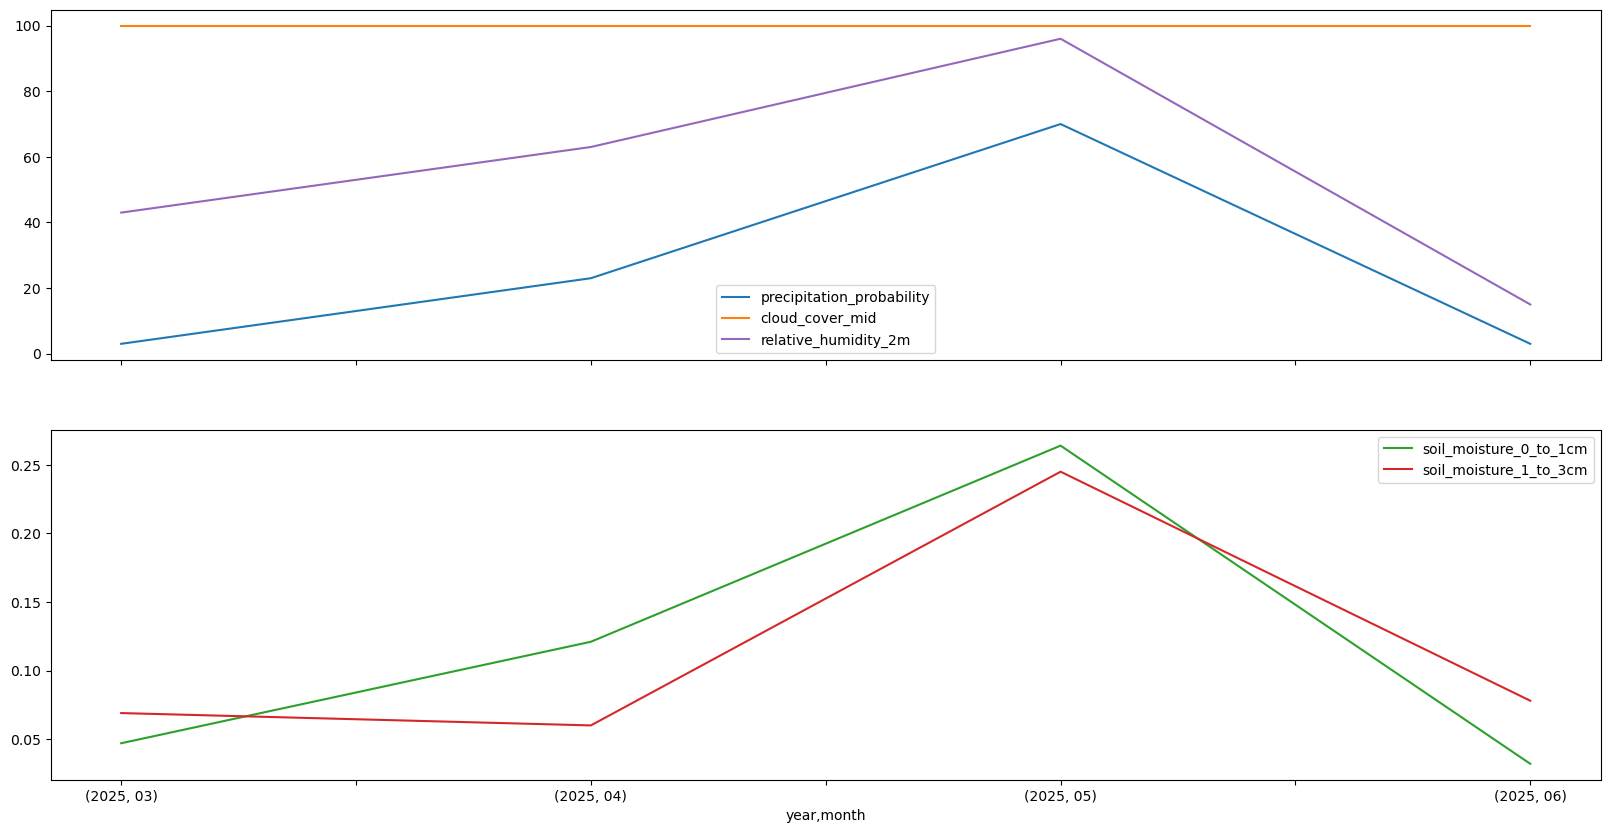

In [62]:
# Find Monthly Maximum values of Precipitation Probability (Plot)
dfmmax2 = df1.groupby(['year','month'])[['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','relative_humidity_2m']].max().sort_values(by = ['year','month'], ascending=[True,True])
dfmmax2.plot(subplots=[('precipitation_probability','cloud_cover_mid','relative_humidity_2m'),('soil_moisture_0_to_1cm','soil_moisture_1_to_3cm')])

In [63]:
# Find Monthly Maximum values of Relative Humidity 2m (Table)
dfmmax2 = df1.groupby(['year','month'])[df1h.columns[[4,0]]].max().sort_values(by = ['relative_humidity_2m'], ascending=[False])
dfmmax2

relative_humidity_2m  precipitation_probability
year month                                                 
2025 05                     96.0                       70.0
     04                     63.0                       23.0
     03                     43.0                        3.0
     06                     15.0                        3.0

In [64]:
# Find Hourly Maximum values of Precipitation Probability (Table)
dfhmax1 = df1.groupby(['hmstz'])[df1h.columns[0:]].max().sort_values(by = ['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','soil_moisture_3_to_9cm','cloud_cover_low',
            'relative_humidity_2m','cloud_cover_high','dew_point_2m',
            'vapour_pressure_deficit'], ascending=[False,False,False,False,False,False,False,False,False,False])
dfhmax1

precipitation_probability  cloud_cover_mid  \
hmstz                                                        
23:00:00+00:00                       70.0            100.0   
06:00:00+00:00                       54.0            100.0   
05:00:00+00:00                       53.0            100.0   
22:00:00+00:00                       51.0            100.0   
16:00:00+00:00                       47.0            100.0   
00:00:00+00:00                       46.0            100.0   
15:00:00+00:00                       46.0            100.0   
17:00:00+00:00                       44.0            100.0   
18:00:00+00:00                       41.0            100.0   
19:00:00+00:00                       38.0            100.0   
11:00:00+00:00                       37.0            100.0   
04:00:00+00:00                       37.0            100.0   
12:00:00+00:00                       35.0            100.0   
14:00:00+00:00                       35.0            100.0   
10:00:00+00:00                       34.0            100.0   
07:00:00+00:00                       33.0            100.0   
03:00:00+00:00                       32.0            100.0   
01:00:00+00:00                       32.0            100.0   
21:00:00+00:00                       27.0            100.0   
08:00:00+00:00                       26.0            100.0   
02:00:00+00:00                       25.0            100.0   
13:00:00+00:00                       23.0            100.0   
20:00:00+00:00                       21.0            100.0   
09:00:00+00:00                       14.0            100.0   

                soil_moisture_0_to_1cm  soil_moisture_1_to_3cm  \
hmstz                                                            
23:00:00+00:00                   0.264                   0.196   
06:00:00+00:00                   0.257                   0.232   
05:00:00+00:00                   0.263                   0.220   
22:00:00+00:00                   0.184                   0.199   
16:00:00+00:00                   0.219                   0.222   
00:00:00+00:00                   0.238                   0.195   
15:00:00+00:00                   0.224                   0.225   
17:00:00+00:00                   0.210                   0.219   
18:00:00+00:00                   0.199                   0.215   
19:00:00+00:00                   0.185                   0.211   
11:00:00+00:00                   0.233                   0.233   
04:00:00+00:00                   0.232                   0.200   
12:00:00+00:00                   0.233                   0.232   
14:00:00+00:00                   0.228                   0.227   
10:00:00+00:00                   0.237                   0.236   
07:00:00+00:00                   0.262                   0.245   
03:00:00+00:00                   0.224                   0.196   
01:00:00+00:00                   0.205                   0.192   
21:00:00+00:00                   0.182                   0.203   
08:00:00+00:00                   0.251                   0.245   
02:00:00+00:00                   0.245                   0.190   
13:00:00+00:00                   0.231                   0.230   
20:00:00+00:00                   0.174                   0.207   
09:00:00+00:00                   0.242                   0.241   

                relative_humidity_2m  dew_point_2m  vapour_pressure_deficit  \
hmstz                                                                         
23:00:00+00:00                  93.0     14.243151                 7.012977   
06:00:00+00:00                  91.0     13.314399                 5.457564   
05:00:00+00:00                  91.0     12.968334                 5.441759   
22:00:00+00:00                  70.0     12.657084                 7.356871   
16:00:00+00:00                  85.0     13.694188                 5.022630   
00:00:00+00:00                  83.0     12.350466                 7.146035   
15:00:00+00:00                  94.0     14.011498    

array([<Axes: xlabel='hmstz'>, <Axes: xlabel='hmstz'>], dtype=object)

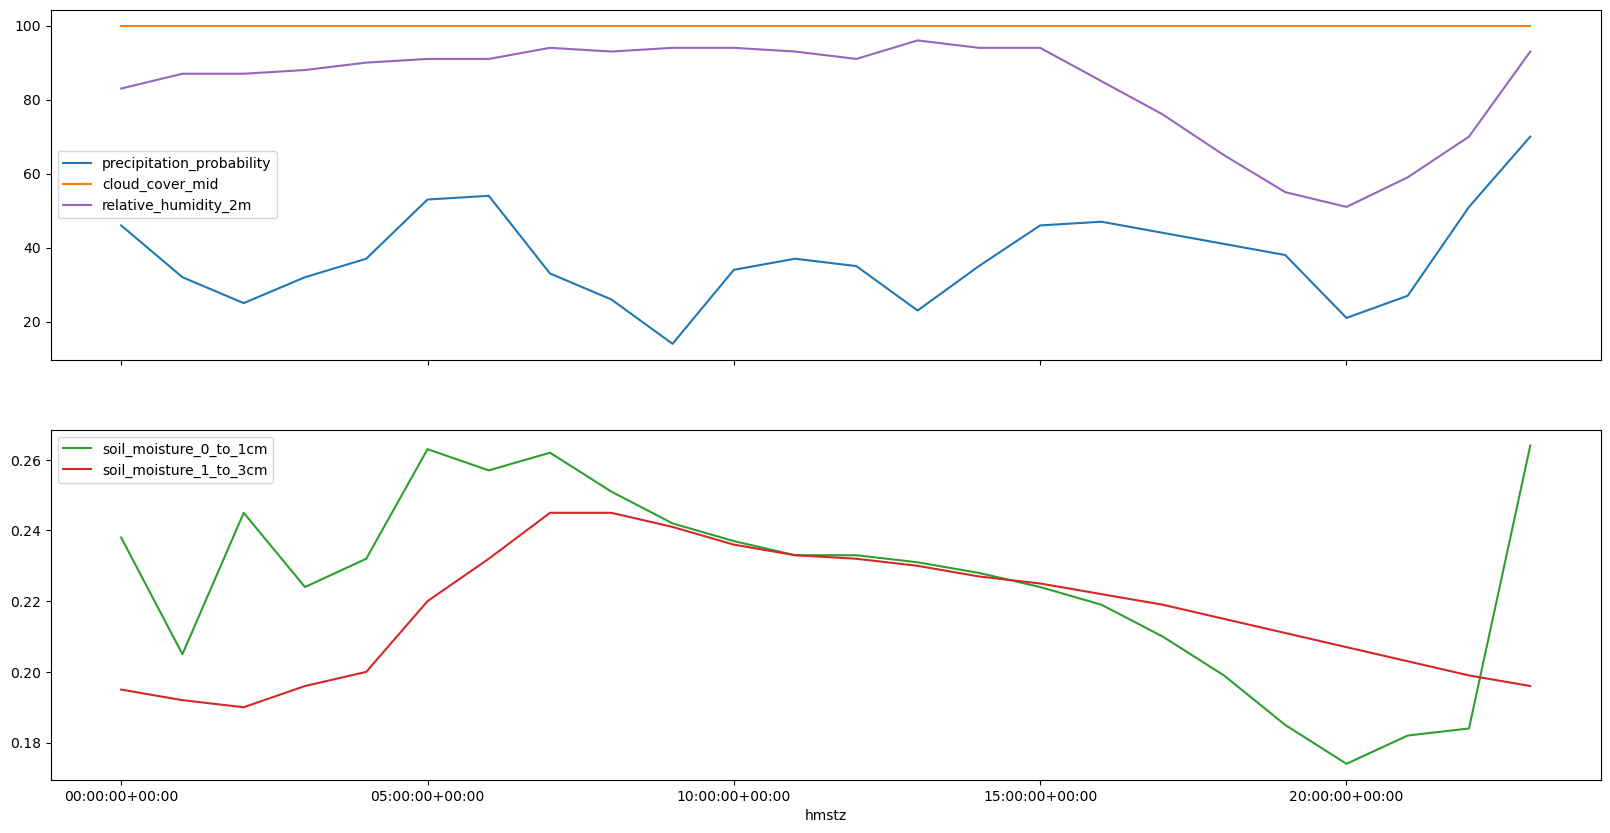

In [65]:
# Find Hourly Maximum values of Precipitation Probability (Plot)
dfhmax2 = df1.groupby(['hmstz'])[['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','relative_humidity_2m']].max().sort_values(by = ['hmstz'], ascending=[True])
dfhmax2.plot(subplots=[('precipitation_probability','cloud_cover_mid','relative_humidity_2m'),('soil_moisture_0_to_1cm','soil_moisture_1_to_3cm')])

In [66]:
# Find Hourly Maximum values of Relative Humidity 2m (Table)
dfhmax2 = df1.groupby(['hmstz'])[df1h.columns[[4,0]]].max().sort_values(by = ['relative_humidity_2m'], ascending=[False])
dfhmax2

relative_humidity_2m  precipitation_probability
hmstz                                                          
13:00:00+00:00                  96.0                       23.0
09:00:00+00:00                  94.0                       14.0
15:00:00+00:00                  94.0                       46.0
14:00:00+00:00                  94.0                       35.0
10:00:00+00:00                  94.0                       34.0
07:00:00+00:00                  94.0                       33.0
23:00:00+00:00                  93.0                       70.0
11:00:00+00:00                  93.0                       37.0
08:00:00+00:00                  93.0                       26.0
12:00:00+00:00                  91.0                       35.0
06:00:00+00:00                  91.0                       54.0
05:00:00+00:00                  91.0                       53.0
04:00:00+00:00                  90.0                       37.0
03:00:00+00:00                  88.0                       32.0
01:00:00+00:00                  87.0                       32.0
02:00:00+00:00                  87.0                       25.0
16:00:00+00:00                  85.0                       47.0
00:00:00+00:00                  83.0                       46.0
17:00:00+00:00                  76.0                       44.0
22:00:00+00:00                  70.0                       51.0
18:00:00+00:00                  65.0                       41.0
21:00:00+00:00                  59.0                       27.0
19:00:00+00:00                  55.0                       38.0
20:00:00+00:00                  51.0                       21.0

In [67]:
# Observation Result:
# - When the maximum value of 'relative_humidity_2m' and 'precipitation_probability' decreases, the maximum value of moisture rises. Maybe, it's due to
#   the occurence of rain (humidity falls due to part of water vapour turns to liquid, and after that, the precipitation_probability falls also because
#   it's already release the water vapour as rain).

In [68]:
# Find Daily Minimum of Precipitation Probability (Table)
dfdmin1 = df1.groupby('ymd')[df1h.columns[0:]].min().sort_values(['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm'], ascending=True).head(5)
dfdmin1

precipitation_probability  cloud_cover_mid  \
ymd                                                      
2025-03-20                        0.0             -1.0   
2025-04-10                        0.0              0.0   
2025-04-11                        0.0              0.0   
2025-04-12                        0.0              0.0   
2025-04-13                        0.0              0.0   

            soil_moisture_0_to_1cm  soil_moisture_1_to_3cm  \
ymd                                                          
2025-03-20                   0.037                   0.067   
2025-04-10                   0.030                   0.041   
2025-04-11                   0.030                   0.042   
2025-04-12                   0.030                   0.043   
2025-04-13                   0.030                   0.043   

            relative_humidity_2m  dew_point_2m  vapour_pressure_deficit  \
ymd                                                                       
2025-03-20                  12.0    -14.492778                 1.159523   
2025-04-10                   5.0    -12.953846                 1.588309   
2025-04-11                   5.0    -16.909462                 1.542835   
2025-04-12                   6.0    -11.360874                 2.328790   
2025-04-13                   6.0    -12.012876                 1.915399   

            temperature_2m  cloud_cover_high  cloud_cover_low  wind_speed_10m  \
ymd                                                                             
2025-03-20       11.559500               0.0              0.0        2.160000   
2025-04-10       17.269500               0.0              0.0        3.758510   
2025-04-11       16.519500               0.0              0.0        3.240000   
2025-04-12       22.769500               0.0              0.0        7.491114   
2025-04-13       20.369501               0.0              0.0        5.447788   

            soil_moisture_3_to_9cm  temperature_80m  soil_temperature_0cm  
ymd                                                                        
2025-03-20                   0.099        11.060000                 5.064  
2025-04-10                   0.089        22.960001                16.014  
2025-04-11                   0.088        23.060000                16.964  
2025-04-12                   0.087        21.710001                18.164  
2025-04-13                   0.087        19.810000                15.514

array([<Axes: xlabel='ymd'>, <Axes: xlabel='ymd'>], dtype=object)

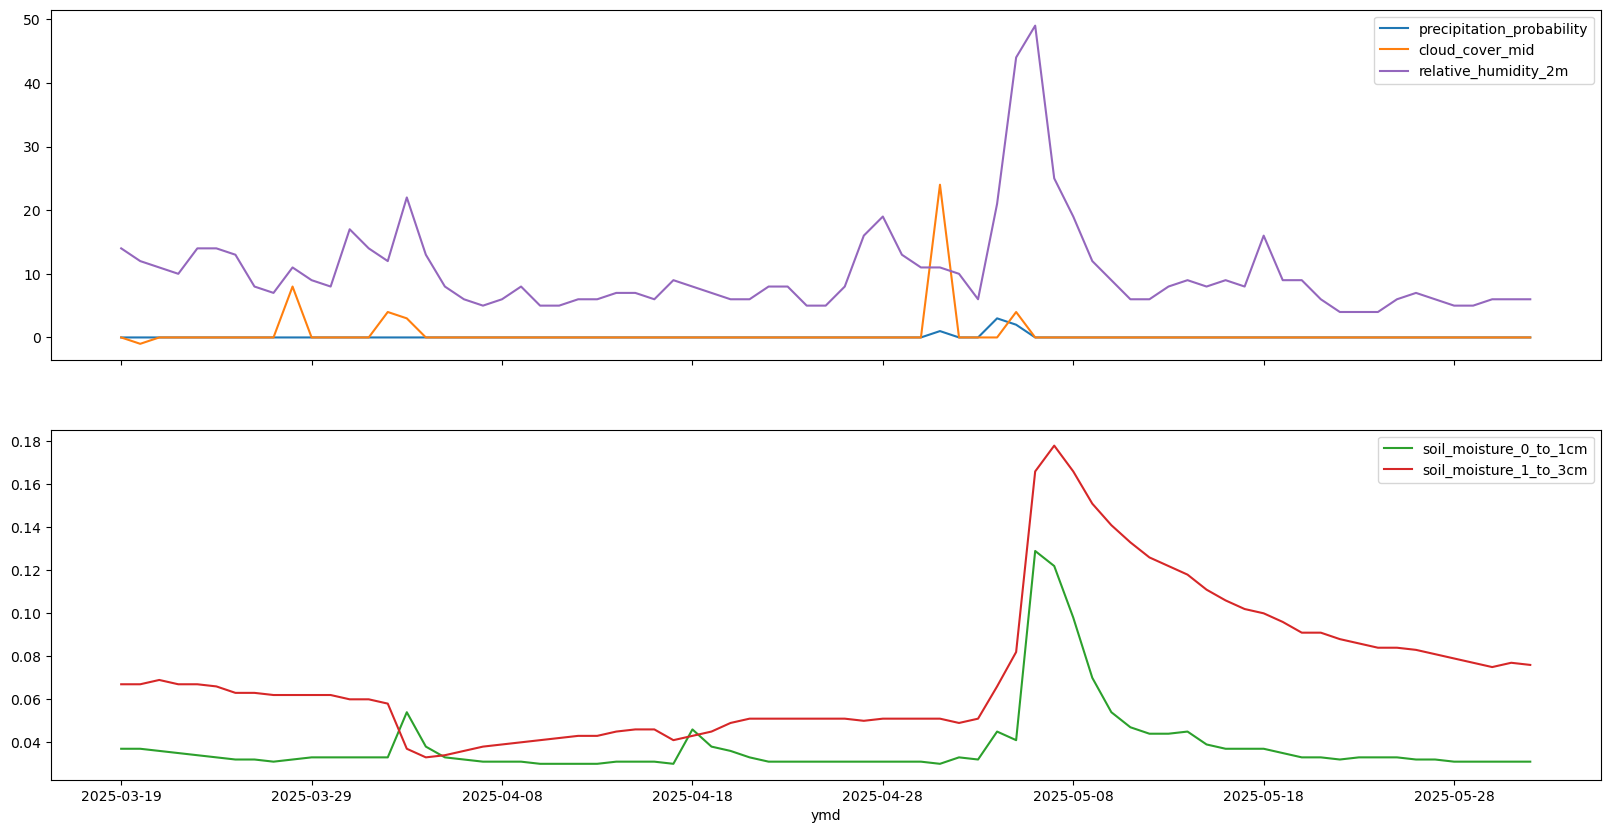

In [69]:
# Find Daily Minimum of Precipitation Probability (Plot)
dfdmin2 = df1.groupby('ymd')[['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','relative_humidity_2m']].min().sort_values('ymd', ascending=True)
dfdmin2.plot(subplots=[('precipitation_probability','cloud_cover_mid','relative_humidity_2m'),('soil_moisture_0_to_1cm','soil_moisture_1_to_3cm')])

In [70]:
# Find Daily Minimum of relative_humidity_2m (Table)
dfdmin3 = df1.groupby('ymd')[df1h.columns[[4,0]]].min().sort_values(['relative_humidity_2m'], ascending=True).head(5)
dfdmin3

relative_humidity_2m  precipitation_probability
ymd                                                        
2025-05-22                   4.0                        0.0
2025-05-23                   4.0                        0.0
2025-05-24                   4.0                        0.0
2025-04-25                   5.0                        0.0
2025-04-07                   5.0                        0.0

In [71]:
# Observation Result of Daily Minimum Data
# - Fluctuation of 'relative_humidity_2m' is similar to 'soil_moisture_0_to_1cm', different compared to Hourly Minimum Data, 
#   maybe due to longer time scope.

In [72]:
# Find Monthly Minimum values of Precipitation Probability (Table)
dfmmin1 = df1.groupby(['year','month'])[df1h.columns[0:]].min().sort_values(by = ['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','soil_moisture_3_to_9cm','cloud_cover_low',
            'relative_humidity_2m','cloud_cover_high','dew_point_2m',
            'vapour_pressure_deficit'], ascending=[True,True,True,True,True,True,True,True,True,True])
dfmmin1

precipitation_probability  cloud_cover_mid  \
year month                                               
2025 03                           0.0             -1.0   
     04                           0.0              0.0   
     05                           0.0              0.0   
     06                           0.0              0.0   

            soil_moisture_0_to_1cm  soil_moisture_1_to_3cm  \
year month                                                   
2025 03                      0.031                   0.060   
     04                      0.030                   0.033   
     05                      0.030                   0.049   
     06                      0.031                   0.076   

            relative_humidity_2m  dew_point_2m  vapour_pressure_deficit  \
year month                                                                
2025 03                      7.0    -14.492778                 0.848216   
     04                      5.0    -17.648800                 0.364434   
     05                      4.0    -14.610750                 0.065552   
     06                      6.0     -5.956471                 3.654214   

            temperature_2m  cloud_cover_high  cloud_cover_low  wind_speed_10m  \
year month                                                                      
2025 03             9.1595               0.0              0.0        0.509117   
     04             6.4195               0.0              0.0        0.509117   
     05            13.2195               0.0              0.0        0.720000   
     06            30.0195               0.0              0.0        9.000000   

            soil_moisture_3_to_9cm  temperature_80m  soil_temperature_0cm  
year month                                                                 
2025 03                      0.095         8.060000              3.214000  
     04                      0.085         7.310000              6.114000  
     05                      0.084        12.960000             13.114000  
     06                      0.105        28.960001             28.314001

array([<Axes: xlabel='year,month'>, <Axes: xlabel='year,month'>],
      dtype=object)

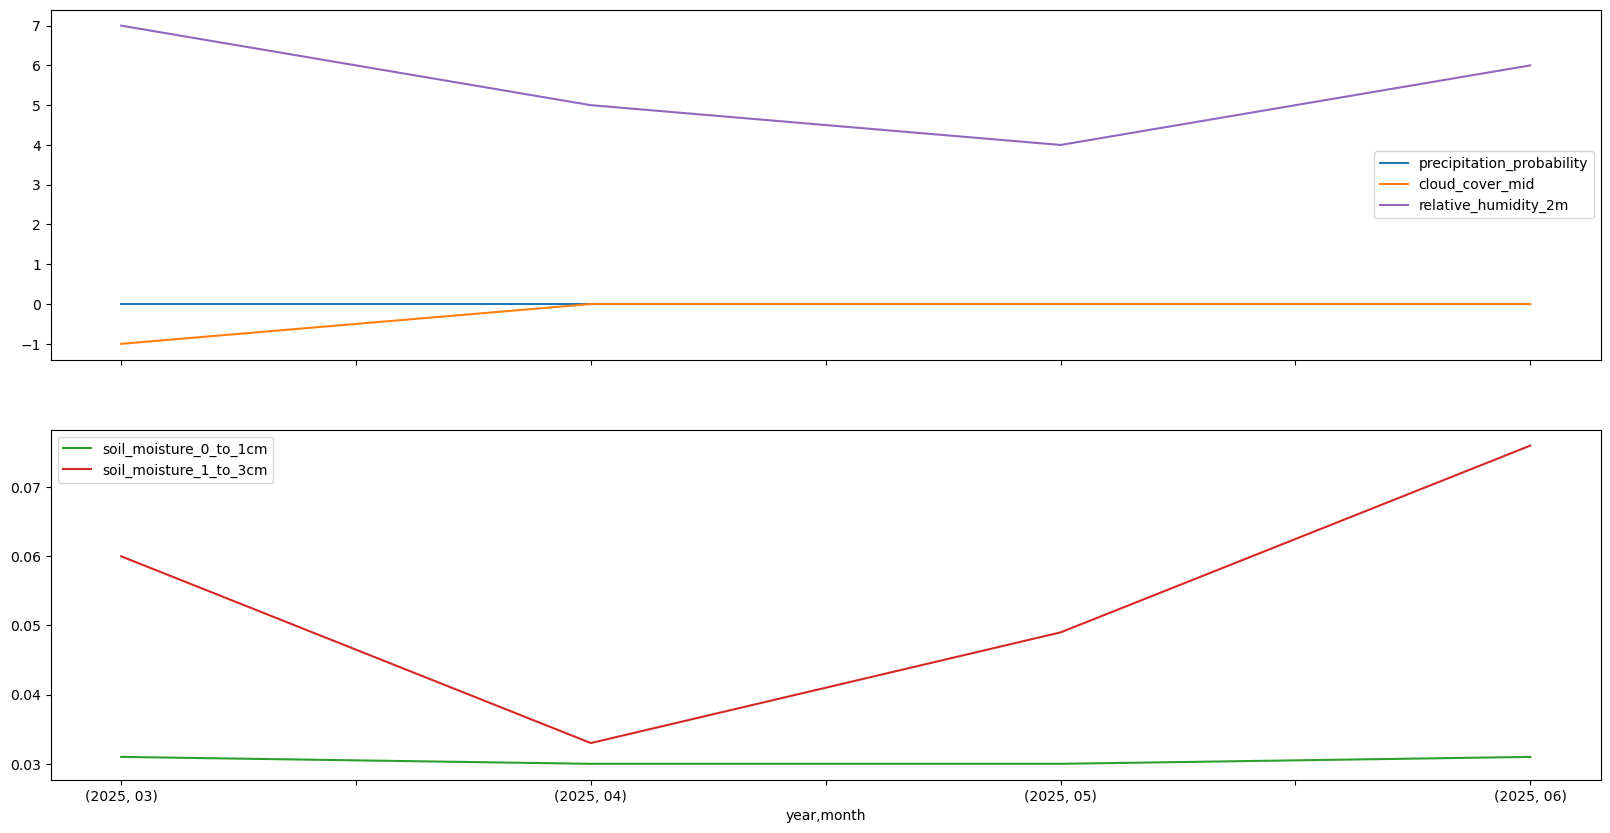

In [73]:
# Find Monthly Minimum values of Precipitation Probability (Plot)
dfmmin2 = df1.groupby(['year','month'])[['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','relative_humidity_2m']].min().sort_values(by = ['year','month'], ascending=[True,True])
dfmmin2.plot(subplots=[('precipitation_probability','cloud_cover_mid','relative_humidity_2m'),('soil_moisture_0_to_1cm','soil_moisture_1_to_3cm')])

In [74]:
# Find Monthly Minimum values of Relative Humidity 2m (Table)
dfmmin2 = df1.groupby(['year','month'])[df1h.columns[[4,0]]].min().sort_values(by = ['relative_humidity_2m'], ascending=[True])
dfmmin2

relative_humidity_2m  precipitation_probability
year month                                                 
2025 05                      4.0                        0.0
     04                      5.0                        0.0
     06                      6.0                        0.0
     03                      7.0                        0.0

In [75]:
# Find Hourly Minimum values of Precipitation Probability (Table)
dfhmin1 = df1.groupby(['hmstz'])[df1h.columns[0:]].min().sort_values(by = ['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','soil_moisture_3_to_9cm','cloud_cover_low',
            'relative_humidity_2m','cloud_cover_high','dew_point_2m',
            'vapour_pressure_deficit'], ascending=[True,True,True,True,True,True,True,True,True,True])
dfhmin1

precipitation_probability  cloud_cover_mid  \
hmstz                                                        
12:00:00+00:00                        0.0             -1.0   
01:00:00+00:00                        0.0              0.0   
02:00:00+00:00                        0.0              0.0   
00:00:00+00:00                        0.0              0.0   
03:00:00+00:00                        0.0              0.0   
04:00:00+00:00                        0.0              0.0   
05:00:00+00:00                        0.0              0.0   
06:00:00+00:00                        0.0              0.0   
23:00:00+00:00                        0.0              0.0   
22:00:00+00:00                        0.0              0.0   
21:00:00+00:00                        0.0              0.0   
08:00:00+00:00                        0.0              0.0   
07:00:00+00:00                        0.0              0.0   
09:00:00+00:00                        0.0              0.0   
11:00:00+00:00                        0.0              0.0   
10:00:00+00:00                        0.0              0.0   
20:00:00+00:00                        0.0              0.0   
19:00:00+00:00                        0.0              0.0   
18:00:00+00:00                        0.0              0.0   
17:00:00+00:00                        0.0              0.0   
15:00:00+00:00                        0.0              0.0   
16:00:00+00:00                        0.0              0.0   
14:00:00+00:00                        0.0              0.0   
13:00:00+00:00                        0.0              0.0   

                soil_moisture_0_to_1cm  soil_moisture_1_to_3cm  \
hmstz                                                            
12:00:00+00:00                   0.031                   0.034   
01:00:00+00:00                   0.030                   0.033   
02:00:00+00:00                   0.030                   0.033   
00:00:00+00:00                   0.030                   0.033   
03:00:00+00:00                   0.030                   0.033   
04:00:00+00:00                   0.030                   0.033   
05:00:00+00:00                   0.030                   0.033   
06:00:00+00:00                   0.030                   0.033   
23:00:00+00:00                   0.030                   0.034   
22:00:00+00:00                   0.030                   0.034   
21:00:00+00:00                   0.030                   0.034   
08:00:00+00:00                   0.031                   0.033   
07:00:00+00:00                   0.031                   0.033   
09:00:00+00:00                   0.031                   0.033   
11:00:00+00:00                   0.031                   0.033   
10:00:00+00:00                   0.031                   0.033   
20:00:00+00:00                   0.031                   0.034   
19:00:00+00:00                   0.031                   0.034   
18:00:00+00:00                   0.031                   0.034   
17:00:00+00:00                   0.031                   0.034   
15:00:00+00:00                   0.031                   0.034   
16:00:00+00:00                   0.031                   0.034   
14:00:00+00:00                   0.031                   0.034   
13:00:00+00:00                   0.031                   0.034   

                relative_humidity_2m  dew_point_2m  vapour_pressure_deficit  \
hmstz                                                                         
12:00:00+00:00                   8.0    -14.438404                 0.152326   
01:00:00+00:00                   4.0    -17.574831                 0.224315   
02:00:00+00:00                   4.0    -16.503166                 0.223596   
00:00:00+00:00                   4.0    -14.659351                 0.294288   
03:00:00+00:00                   5.0    -17.648800                 0.203762   
04:00:00+00:00                   5.0    -16.758446                 0.167628   
05:00:00+00:00                   6.0    -14.917891    

array([<Axes: xlabel='hmstz'>, <Axes: xlabel='hmstz'>], dtype=object)

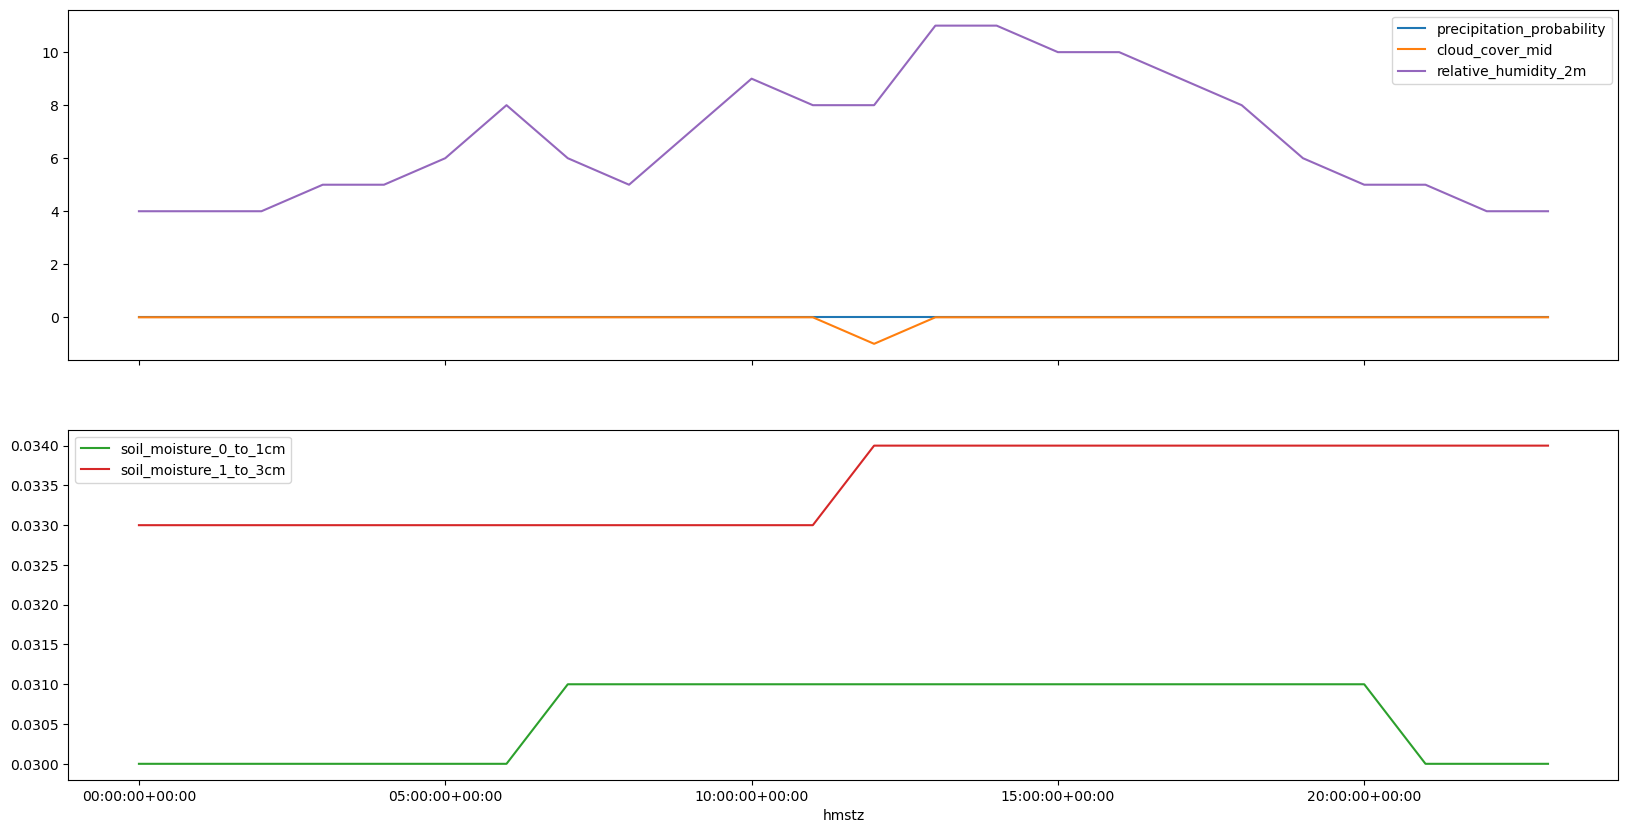

In [76]:
# Find Hourly Minimum values of Precipitation Probability (Plot)
dfhmin2 = df1.groupby(['hmstz'])[['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','relative_humidity_2m']].min().sort_values(by = ['hmstz'], ascending=[True])
dfhmin2.plot(subplots=[('precipitation_probability','cloud_cover_mid','relative_humidity_2m'),('soil_moisture_0_to_1cm','soil_moisture_1_to_3cm')])

In [77]:
# Find Hourly Minimum values of Relative Humidity 2m (Table)
dfhmin2 = df1.groupby(['hmstz'])[df1h.columns[[4,0]]].min().sort_values(by = ['relative_humidity_2m'], ascending=[True])
dfhmin2

relative_humidity_2m  precipitation_probability
hmstz                                                          
00:00:00+00:00                   4.0                        0.0
22:00:00+00:00                   4.0                        0.0
23:00:00+00:00                   4.0                        0.0
01:00:00+00:00                   4.0                        0.0
02:00:00+00:00                   4.0                        0.0
03:00:00+00:00                   5.0                        0.0
04:00:00+00:00                   5.0                        0.0
21:00:00+00:00                   5.0                        0.0
08:00:00+00:00                   5.0                        0.0
20:00:00+00:00                   5.0                        0.0
05:00:00+00:00                   6.0                        0.0
07:00:00+00:00                   6.0                        0.0
19:00:00+00:00                   6.0                        0.0
09:00:00+00:00                   7.0                        0.0
18:00:00+00:00                   8.0                        0.0
11:00:00+00:00                   8.0                        0.0
12:00:00+00:00                   8.0                        0.0
06:00:00+00:00                   8.0                        0.0
17:00:00+00:00                   9.0                        0.0
10:00:00+00:00                   9.0                        0.0
16:00:00+00:00                  10.0                        0.0
15:00:00+00:00                  10.0                        0.0
14:00:00+00:00                  11.0                        0.0
13:00:00+00:00                  11.0                        0.0

In [78]:
# Observation result:
# - When the minimum value of 'relative_humidity_2m' rises, the min value of 'soil_moisture_0_to_1cm' doesn't immediately rise, but instead, steadily almost flat. Maybe, it's due to part of liquid water in the soil vaporize and change into water vapour, so increase the relative humidity of air (near the soil).
# - When 'relative_humidity_2m' falls, the value of 'soil_moisture_0_to_1cm' doesn't immediately falls, but instead, in contrary, rises big enough. Maybe, it's due to part of water vapour in the air near the soil condensates and add liquid water in the soil so the soil moisture increases.

# Mode value of a Column (for sample, we take 'temperature_2m' Column)

In [79]:
# Find Mode value if not rounded
dfmod = df1.mode().sort_values(by = ['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','soil_moisture_3_to_9cm','cloud_cover_low',
            'relative_humidity_2m','cloud_cover_high','dew_point_2m',
            'vapour_pressure_deficit'], ascending=[False,False,False,False,False,False,False,False,False,False])
dfmod = dfmod.dropna()
dfmod
# The result is 17.4525 if we don't do any number rounding. But this result in the most cases, maybe is not the best mode at all.

Unnamed: 0                       date  temperature_2m  \
0         437  2025-03-19 05:00:00+00:00         20.8195   

   relative_humidity_2m  dew_point_2m  apparent_temperature  \
0                   9.0     -11.41719              1.279143   

   precipitation_probability  precipitation  rain  showers  pressure_msl  \
0                        0.0            0.0   0.0      0.0        1007.1   

   surface_pressure  cloud_cover  cloud_cover_low  cloud_cover_mid  \
0          937.6389          0.0              0.0              0.0   

   cloud_cover_high  visibility  wind_speed_10m  soil_moisture_0_to_1cm  \
0               0.0     90000.0         7.42159                   0.031   

   soil_moisture_1_to_3cm  soil_moisture_3_to_9cm  soil_moisture_9_to_27cm  \
0                   0.051                   0.087                      0.1   

   soil_moisture_27_to_81cm  evapotranspiration  snowfall  snow_depth  \
0                     0.105                 0.0       0.0         0.0   

   et0_fao_evapotranspiration  vapour_pressure_deficit  wind_speed_80m  \
0                         0.0                 1.754564        3.319036   

   wind_speed_120m  wind_speed_180m  wind_direction_10m  wind_direction_80m  \
0          4.42464         4.024922            135.0001               180.0   

   wind_direction_120m  wind_direction_180m  temperature_80m  \
0                180.0             135.0001            26.01   

   temperature_120m  temperature_180m  soil_temperature_0cm  \
0             26.41            20.864                20.364   

   soil_temperature_6cm  soil_temperature_18cm  soil_temperature_54cm  \
0             20.814001                 23.414                 25.114   

   wind_gusts_10m   Location         ymd           hmstz  year month day hour  \
0       10.440001  Las Vegas  2025-03-20  05:00:00+00:00  2025    05  01   05   

  minute  sectz tzsec  
0     00  00+00    00

In [80]:
dfmoda = df1[(df1['temperature_2m'] >= 17.45245) &  (df1['temperature_2m'] < 17.45255)] #.where(df1['temperature_2m'] == 19)
dfmoda = dfmoda.dropna()
print(dfmoda['temperature_2m'])
len(dfmoda)
# The result: the temperature of 17.4525 only occurred 11 times out of 1651 data samples.

Series([], Name: temperature_2m, dtype: float64)


0

In [81]:
# Find Mode value precise to 0 decimal number
dfmod0 = df1.round(0).mode().sort_values(by = ['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','soil_moisture_3_to_9cm','cloud_cover_low',
            'relative_humidity_2m','cloud_cover_high','dew_point_2m',
            'vapour_pressure_deficit'], ascending=[False,False,False,False,False,False,False,False,False,False])
dfmod0 = dfmod0.dropna()
dfmod0
# The result is 19 if we round it to the nearest integer (0 decimal number)

Unnamed: 0                       date  temperature_2m  \
0         437  2025-03-19 05:00:00+00:00            22.0   

   relative_humidity_2m  dew_point_2m  apparent_temperature  \
0                   9.0          -3.0                  19.0   

   precipitation_probability  precipitation  rain  showers  pressure_msl  \
0                        0.0            0.0   0.0      0.0        1008.0   

   surface_pressure  cloud_cover  cloud_cover_low  cloud_cover_mid  \
0             940.0          0.0              0.0              0.0   

   cloud_cover_high  visibility  wind_speed_10m  soil_moisture_0_to_1cm  \
0               0.0     90000.0             7.0                     0.0   

   soil_moisture_1_to_3cm  soil_moisture_3_to_9cm  soil_moisture_9_to_27cm  \
0                     0.0                     0.0                      0.0   

   soil_moisture_27_to_81cm  evapotranspiration  snowfall  snow_depth  \
0                       0.0                 0.0       0.0         0.0   

   et0_fao_evapotranspiration  vapour_pressure_deficit  wind_speed_80m  \
0                         0.0                      2.0             7.0   

   wind_speed_120m  wind_speed_180m  wind_direction_10m  wind_direction_80m  \
0              6.0              7.0               135.0               180.0   

   wind_direction_120m  wind_direction_180m  temperature_80m  \
0                180.0                223.0             27.0   

   temperature_120m  temperature_180m  soil_temperature_0cm  \
0              26.0              25.0                  18.0   

   soil_temperature_6cm  soil_temperature_18cm  soil_temperature_54cm  \
0                  22.0                   23.0                   23.0   

   wind_gusts_10m   Location         ymd           hmstz  year month day hour  \
0            10.0  Las Vegas  2025-03-20  05:00:00+00:00  2025    05  01   05   

  minute  sectz tzsec  
0     00  00+00    00

In [82]:
# Find out how many occurrences of 'temperature_2m' rounded to 19C (0 decimal number)
dfmod0a = df1[(df1['temperature_2m'] >= 18.5) &  (df1['temperature_2m'] < 19.5)]
dfmod0a = dfmod0a.dropna()
print(dfmod0a['temperature_2m'])
# The result: temperature of 19C occurred 127 times out of 1651 data samples.
# This is far more occurences than if we use the 17.4525C (4 decimal numbers)

480     18.959500
481     19.259500
482     19.359500
483     19.259500
484     18.559500
          ...    
1835    19.019500
1887    19.069500
1907    19.069500
1931    19.219501
1932    19.019500
Name: temperature_2m, Length: 82, dtype: float64


In [83]:
# Find Mode value of Precipitation Probability (Table) precise to 1 decimal number
dfmod1 = df1.round(1).mode().sort_values(by = ['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','soil_moisture_3_to_9cm','cloud_cover_low',
            'relative_humidity_2m','cloud_cover_high','dew_point_2m',
            'vapour_pressure_deficit'], ascending=[False,False,False,False,False,False,False,False,False,False])
dfmod1 = dfmod1.dropna()
dfmod1

Unnamed: 0                       date  temperature_2m  \
0         437  2025-03-19 05:00:00+00:00            23.4   

   relative_humidity_2m  dew_point_2m  apparent_temperature  \
0                   9.0          -2.3                  20.5   

   precipitation_probability  precipitation  rain  showers  pressure_msl  \
0                        0.0            0.0   0.0      0.0        1007.1   

   surface_pressure  cloud_cover  cloud_cover_low  cloud_cover_mid  \
0             939.7          0.0              0.0              0.0   

   cloud_cover_high  visibility  wind_speed_10m  soil_moisture_0_to_1cm  \
0               0.0     90000.0             7.6                     0.0   

   soil_moisture_1_to_3cm  soil_moisture_3_to_9cm  soil_moisture_9_to_27cm  \
0                     0.1                     0.1                      0.1   

   soil_moisture_27_to_81cm  evapotranspiration  snowfall  snow_depth  \
0                       0.1                 0.0       0.0         0.0   

   et0_fao_evapotranspiration  vapour_pressure_deficit  wind_speed_80m  \
0                         0.1                      1.5             7.6   

   wind_speed_120m  wind_speed_180m  wind_direction_10m  wind_direction_80m  \
0              6.3              1.8               135.0               180.0   

   wind_direction_120m  wind_direction_180m  temperature_80m  \
0                180.0                135.0             22.3   

   temperature_120m  temperature_180m  soil_temperature_0cm  \
0              17.2              20.9                  20.4   

   soil_temperature_6cm  soil_temperature_18cm  soil_temperature_54cm  \
0                  22.6                   23.4                   25.1   

   wind_gusts_10m   Location         ymd           hmstz  year month day hour  \
0            10.4  Las Vegas  2025-03-20  05:00:00+00:00  2025    05  01   05   

  minute  sectz tzsec  
0     00  00+00    00

In [84]:
# Find out how many occurrences of 'temperature_2m' rounded to 19.7C (1 decimal number)
dfmod1a = df1[(df1['temperature_2m'] >= 19.65) &  (df1['temperature_2m'] < 19.75)] #.where(df1['temperature_2m'] == 19)
dfmod1a = dfmod1a.dropna()
print(dfmod1a['temperature_2m'])
len(dfmod1a)
# The result: the temperature of 19.7C occurred only 18 times out of 1651 data samples.

564     19.659500
639     19.719501
657     19.669500
919     19.719501
920     19.719501
1285    19.719501
1390    19.669500
1555    19.669500
1560    19.719501
1834    19.719501
Name: temperature_2m, dtype: float64


10

In [85]:
# Find Mode value of Precipitation Probability (Table) precise to 2 decimal numbers
dfmod2 = df1.round(2).mode().sort_values(by = ['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','soil_moisture_3_to_9cm','cloud_cover_low',
            'relative_humidity_2m','cloud_cover_high','dew_point_2m',
            'vapour_pressure_deficit'], ascending=[False,False,False,False,False,False,False,False,False,False])
dfmod2 = dfmod2.dropna()
dfmod2

Unnamed: 0                       date  temperature_2m  \
0         437  2025-03-19 05:00:00+00:00           20.82   

   relative_humidity_2m  dew_point_2m  apparent_temperature  \
0                   9.0          -1.7                 14.61   

   precipitation_probability  precipitation  rain  showers  pressure_msl  \
0                        0.0            0.0   0.0      0.0        1007.1   

   surface_pressure  cloud_cover  cloud_cover_low  cloud_cover_mid  \
0            941.44          0.0              0.0              0.0   

   cloud_cover_high  visibility  wind_speed_10m  soil_moisture_0_to_1cm  \
0               0.0     90000.0            7.42                    0.03   

   soil_moisture_1_to_3cm  soil_moisture_3_to_9cm  soil_moisture_9_to_27cm  \
0                    0.05                    0.09                      0.1   

   soil_moisture_27_to_81cm  evapotranspiration  snowfall  snow_depth  \
0                       0.1                 0.0       0.0         0.0   

   et0_fao_evapotranspiration  vapour_pressure_deficit  wind_speed_80m  \
0                        0.12                     1.93            3.32   

   wind_speed_120m  wind_speed_180m  wind_direction_10m  wind_direction_80m  \
0             7.39             4.02               135.0               180.0   

   wind_direction_120m  wind_direction_180m  temperature_80m  \
0                180.0                135.0            26.01   

   temperature_120m  temperature_180m  soil_temperature_0cm  \
0             26.41             20.86                 20.36   

   soil_temperature_6cm  soil_temperature_18cm  soil_temperature_54cm  \
0                 20.81                  23.41                  25.11   

   wind_gusts_10m   Location         ymd           hmstz  year month day hour  \
0           10.44  Las Vegas  2025-03-20  05:00:00+00:00  2025    05  01   05   

  minute  sectz tzsec  
0     00  00+00    00

In [86]:
# Find out how many occurrences of 'temperature_2m' rounded to 17.45C (2 decimal numbers)
dfmod2a = df1[(df1['temperature_2m'] >= 17.445) &  (df1['temperature_2m'] < 17.455)] #.where(df1['temperature_2m'] == 19)
dfmod2a = dfmod2a.dropna()
print(dfmod2a['temperature_2m'])
len(dfmod2a)
# The result: the temperature of 17.45C occurred only 11 times out of 1651 data samples. This is perfectly the same as if we don't round it.

Series([], Name: temperature_2m, dtype: float64)


0

In [87]:
# CONCLUSION: to get the nearest possible Mode value of a Column (in this sample, we take 'temperature_2m'), we can't just take the real values
# but, instead, maybe we have to round it to the nearest integer/whole number.

# Standard Deviation and Outliers of Precipitation Probability

In [88]:
# Function Definition
def find_outliers_iqr(series):
       Q1 = series.quantile(0.25)
       print('Q1 = ', Q1)
       Q2 = series.quantile(0.50)
       print('Q2 = ', Q2)
       Q3 = series.quantile(0.75)
       print('Q3 = ', Q3)
       IQR = Q3 - Q1
       lower_bound = Q1 - 1.5 * IQR
       print('Lower Bound = ', lower_bound)
       upper_bound = Q3 + 1.5 * IQR
       print('Upper Bound = ', upper_bound)
       outliers = series[(series < lower_bound) | (series > upper_bound)]
       return outliers

In [89]:
##### Standard Deviation of 'precipitation_probability'
df1stdevpp = df1[['precipitation_probability']].std() #.sort_values(ascending=False)
df1stdevpp

precipitation_probability    5.284249
dtype: float64

In [90]:
df1[['precipitation_probability']].mean()

precipitation_probability    1.236769
dtype: float64

<Axes: ylabel='Density'>

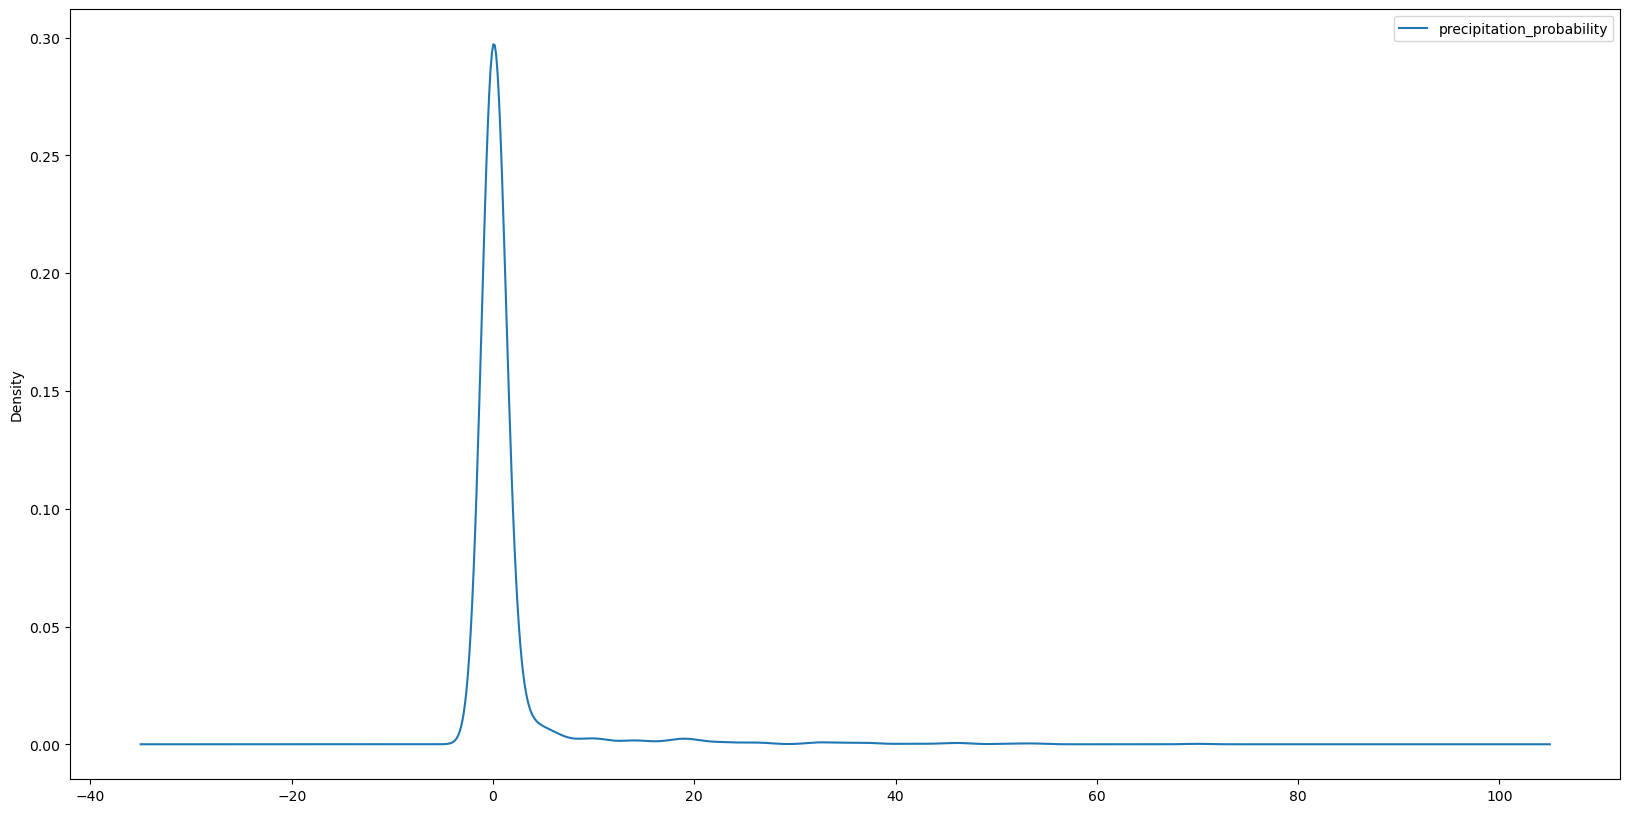

In [91]:
# Distribution Plot of 'precipitation_probability'
df1[['precipitation_probability']].plot.kde()

In [92]:
##### Outliers of 'precipitation_probability'
# Quantiles of 'precipitation_probability'
# Note: either Lower Bound and/or Upper Bound doesn't have to be exist at all in the Dataset.
find_outliers_iqr(df1[['precipitation_probability']]).dropna().sort_values(by='precipitation_probability', ascending=False)

Q1 =  precipitation_probability    0.0
Name: 0.25, dtype: float64
Q2 =  precipitation_probability    0.0
Name: 0.5, dtype: float64
Q3 =  precipitation_probability    0.0
Name: 0.75, dtype: float64
Lower Bound =  precipitation_probability    0.0
dtype: float64
Upper Bound =  precipitation_probability    0.0
dtype: float64


precipitation_probability
1583                       70.0
1590                       54.0
1589                       53.0
1582                       51.0
1552                       47.0
...                         ...
1176                        1.0
1175                        1.0
1174                        1.0
1173                        1.0
524                         1.0

[342 rows x 1 columns]

<Axes: >

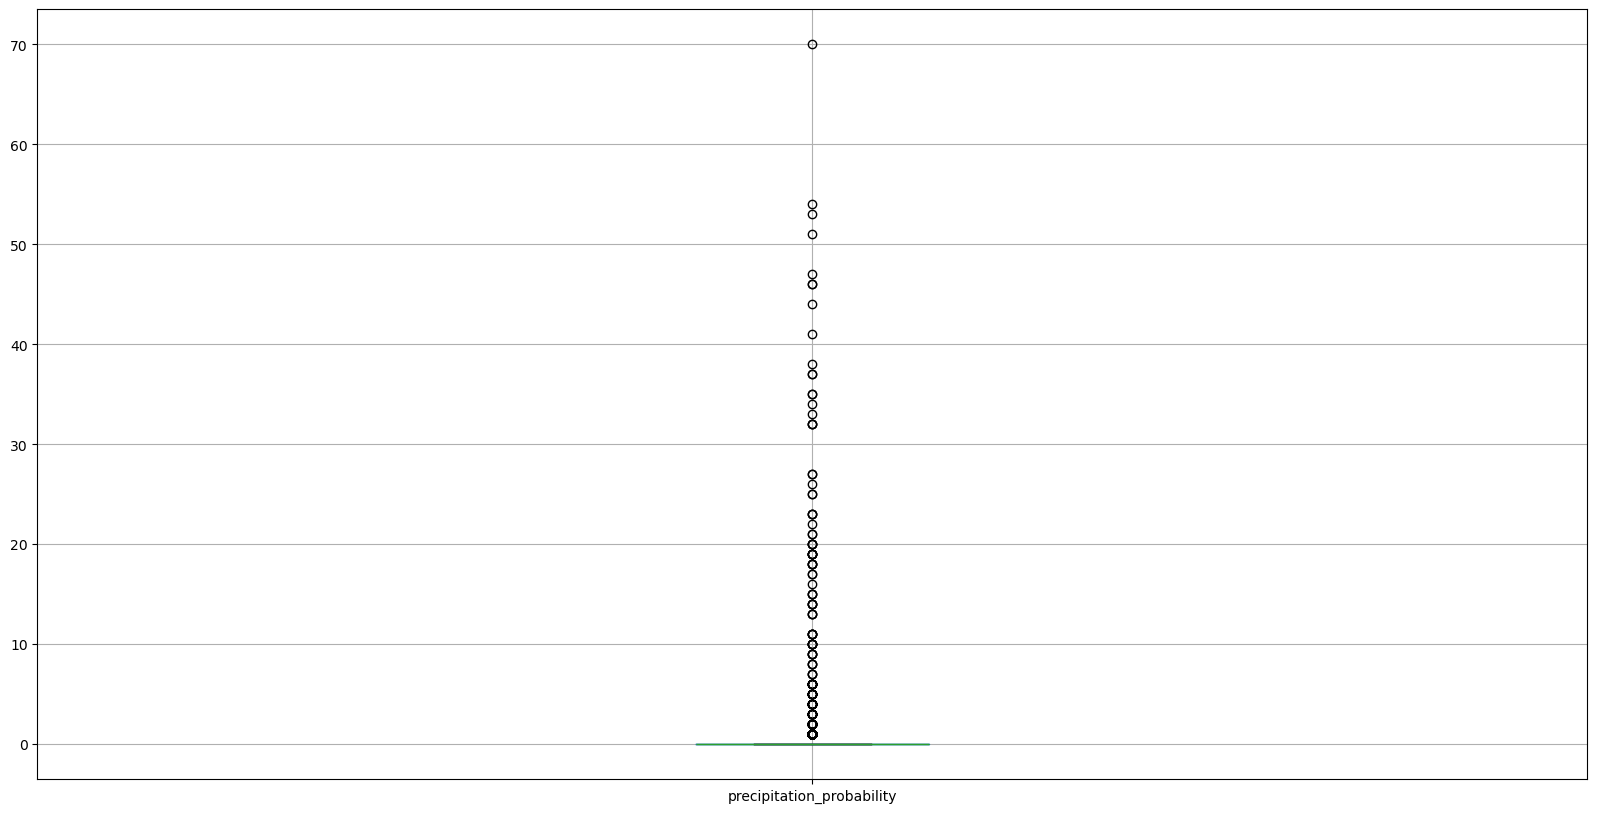

In [93]:
# Box Plot of 'precipitation_probability'
# Note:
# Top black horizontal line is Upper Bound value
# Bottom black horizontal line is Lower Bound value
# Lower blue line is 25 percentile
# Green line is Median a.k.a 50 percentile
# Upper blue line is 75 percentile
df1[['precipitation_probability']].boxplot()

<Axes: xlabel='date', ylabel='precipitation_probability'>

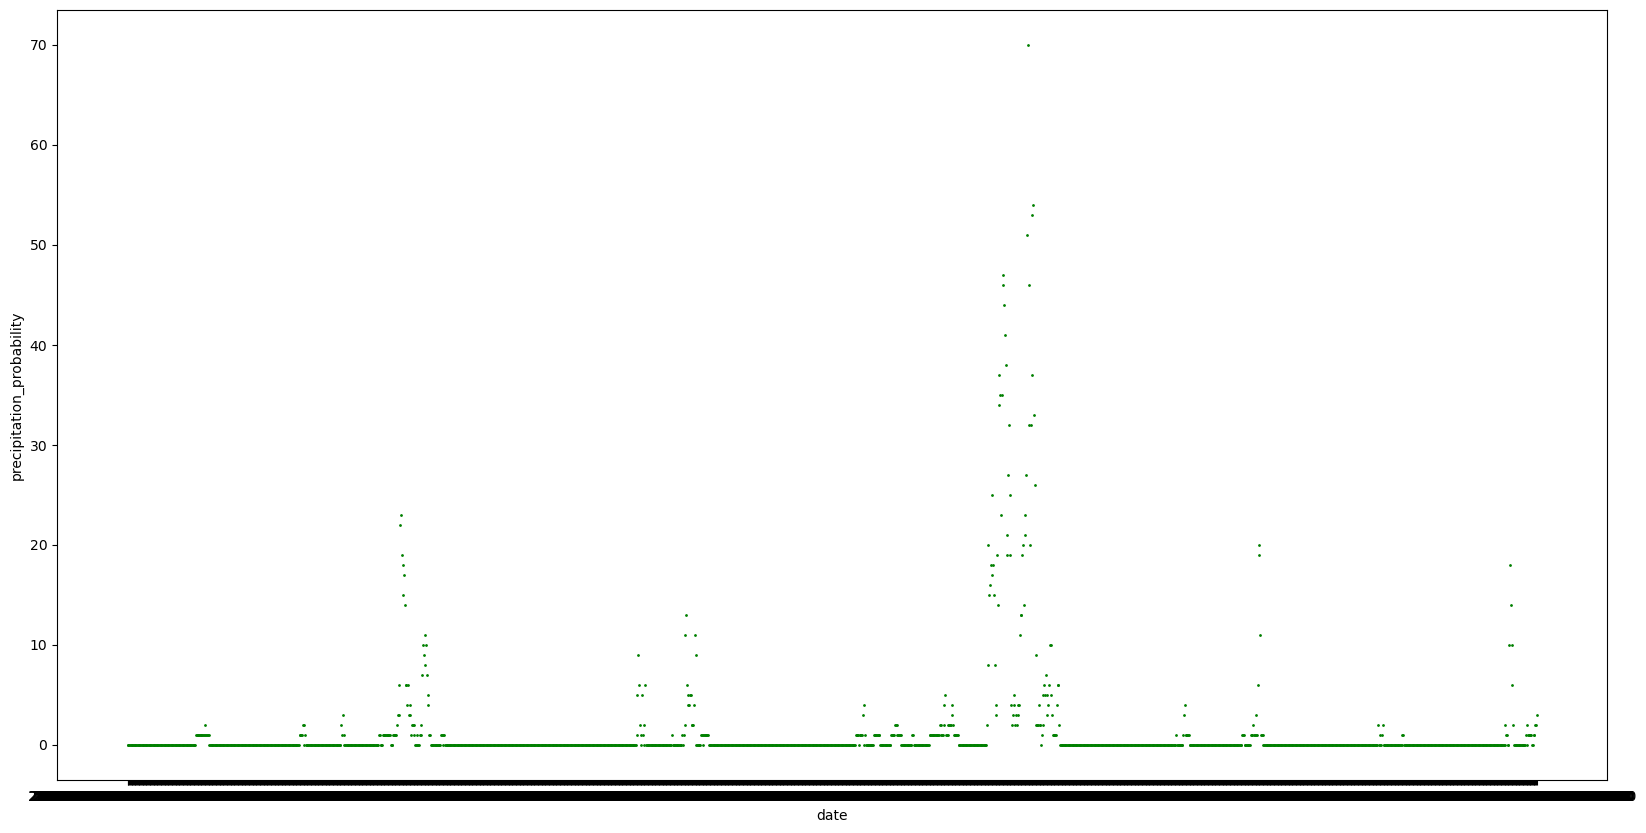

In [94]:
# Draw the Scatter Plot of 'precipitation_probability'
# We can see that the dots are concentrated at below/bottom (below the Upper Bound of 17.5)
import matplotlib.pyplot as plt
df1[['date','precipitation_probability']].plot.scatter(x='date', y='precipitation_probability', s=1, c='green')

In [95]:
##### Standard Deviation of 'temperature_2m'
df1stdevtemp = df1[['temperature_2m']].std() #.sort_values(ascending=False)
df1stdevtemp

temperature_2m    6.807911
dtype: float64

In [96]:
df1[['temperature_2m']].mean()

temperature_2m    23.069952
dtype: float64

In [97]:
df1[['temperature_2m']].max()

temperature_2m    41.3195
dtype: float64

<Axes: ylabel='Density'>

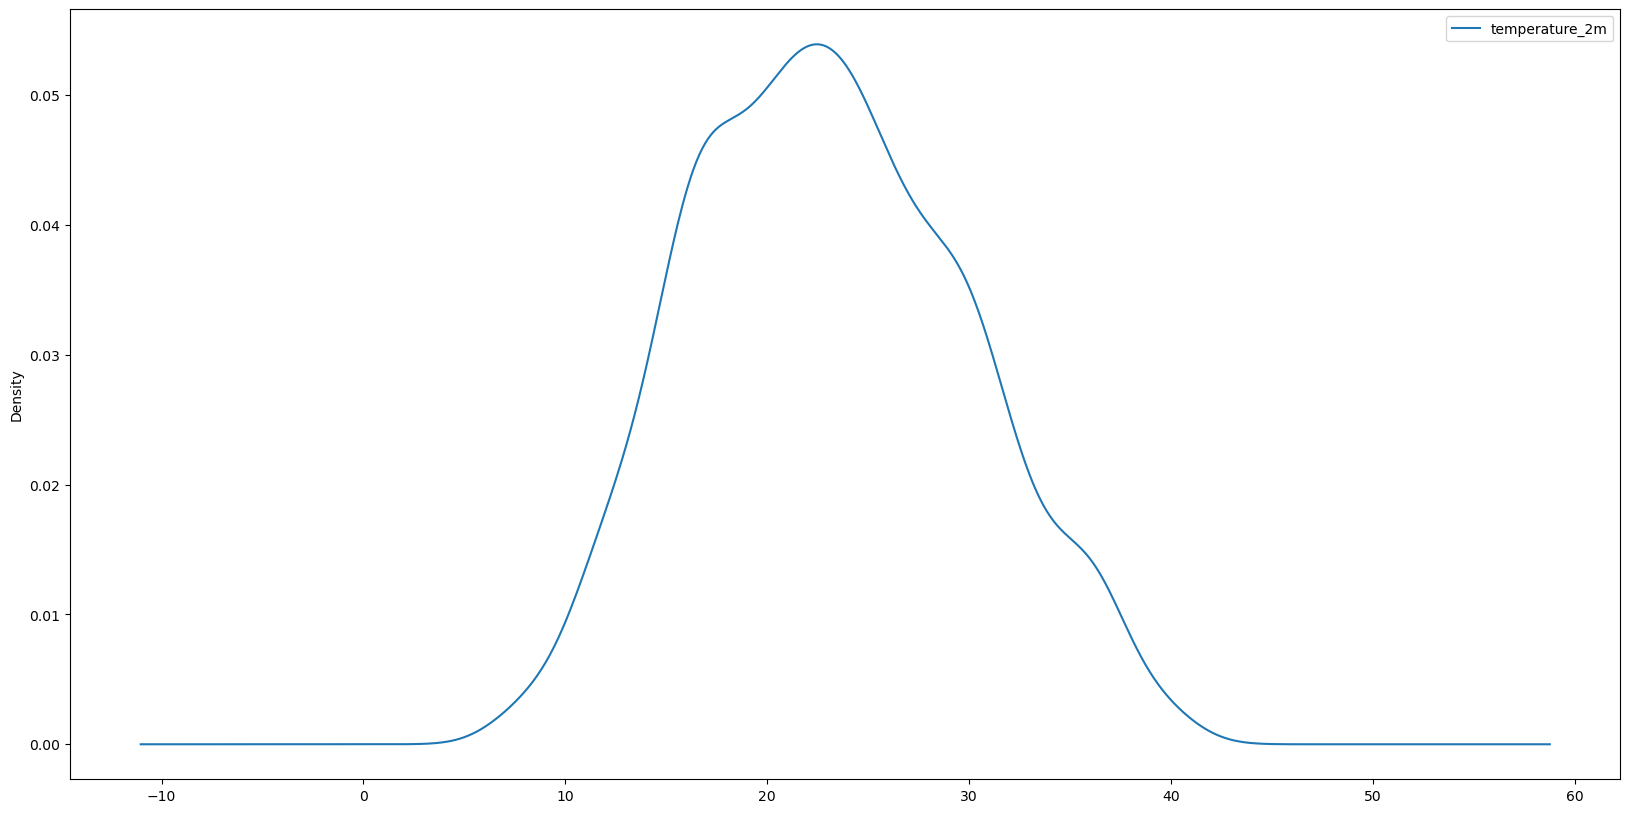

In [98]:
df1[['temperature_2m']].plot.kde()

In [99]:
##### Outliers of 'temperature_2m'
# Quantiles of 'temperature_2m'
# Note: either Lower Bound and/or Upper Bound doesn't have to be exist at all in the Dataset.
outlierstemp = find_outliers_iqr(df1[['temperature_2m']])
print(outlierstemp.dropna().sort_values(by='temperature_2m', ascending=False))

Q1 =  temperature_2m    17.7695
Name: 0.25, dtype: float64
Q2 =  temperature_2m    22.7695
Name: 0.5, dtype: float64
Q3 =  temperature_2m    27.844501
Name: 0.75, dtype: float64
Lower Bound =  temperature_2m    2.656999
dtype: float64
Upper Bound =  temperature_2m    42.957001
dtype: float64
Empty DataFrame
Columns: [temperature_2m]
Index: []


<Axes: >

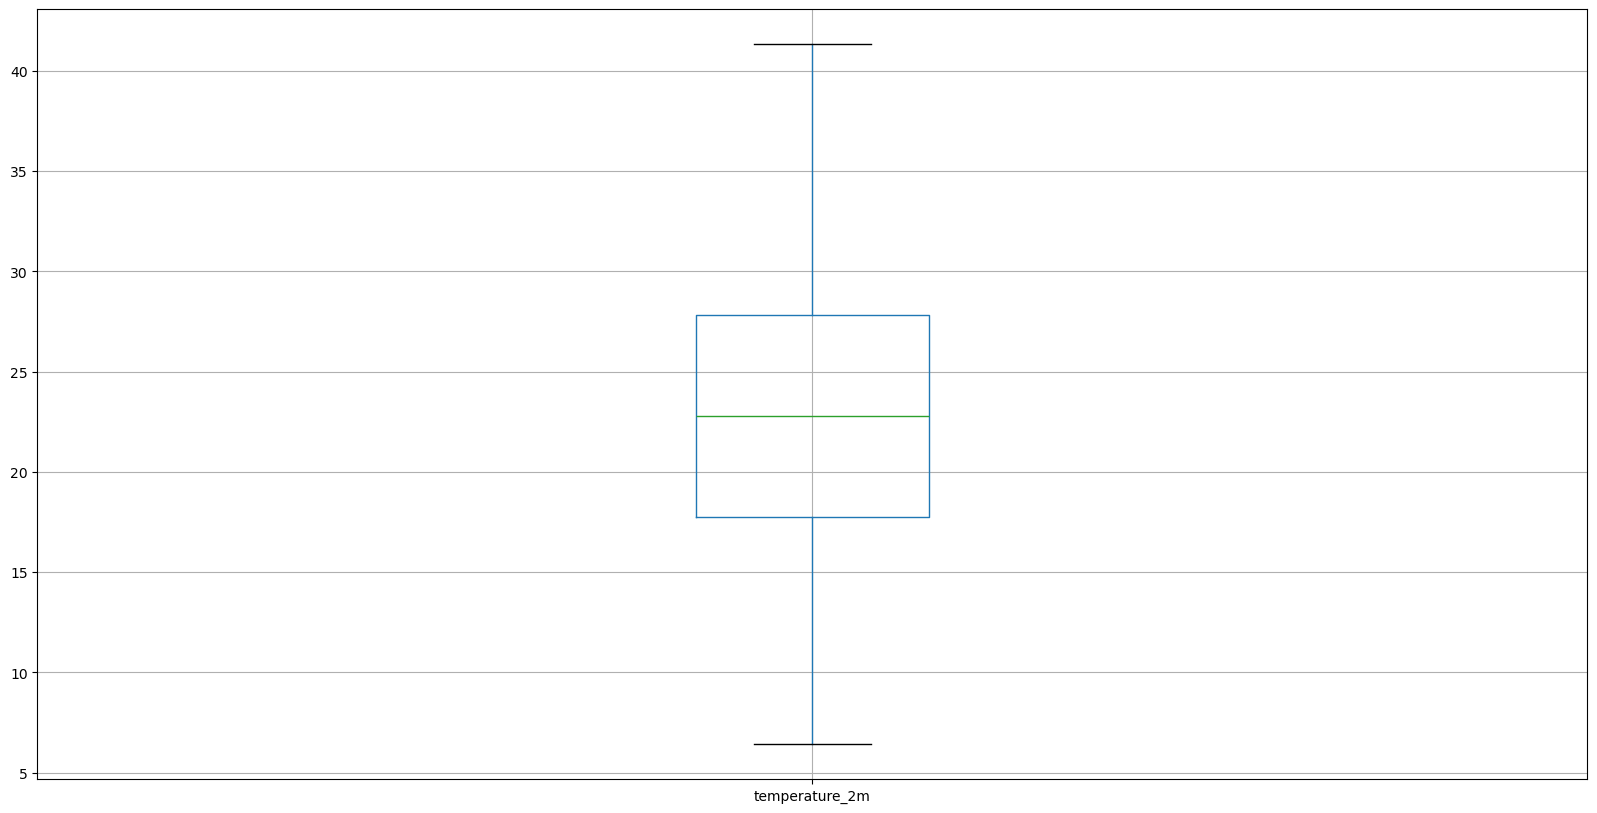

In [100]:
# Box Plot of 'temperature_2m'
# Note:
# Top black horizontal line is Upper Bound value
# Bottom black horizontal line is Lower Bound value
# Lower blue line is 25 percentile
# Green line is Median a.k.a 50 percentile
# Upper blue line is 75 percentile
df1[['temperature_2m']].boxplot()

<Axes: xlabel='date', ylabel='temperature_2m'>

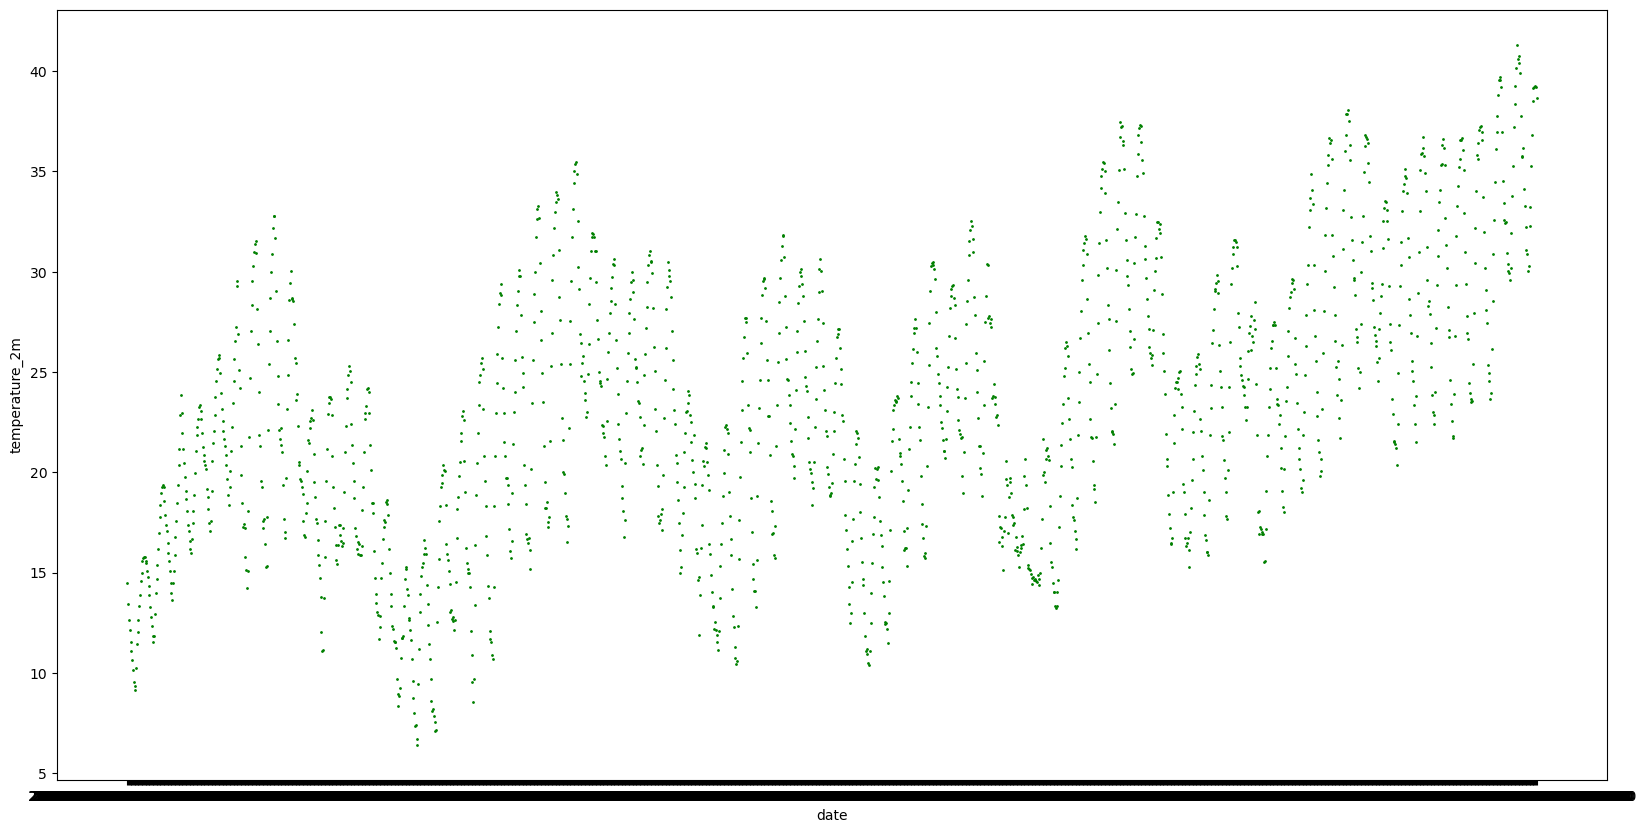

In [101]:
# Draw the Scatter Plot of 'temperature_2m'
# We can see that the dots are concentrated at below/bottom (below the Upper Bound of 17.5)
import matplotlib.pyplot as plt
df1[['date','temperature_2m']].plot.scatter(x='date', y='temperature_2m', s=1, c='green')

<Axes: >

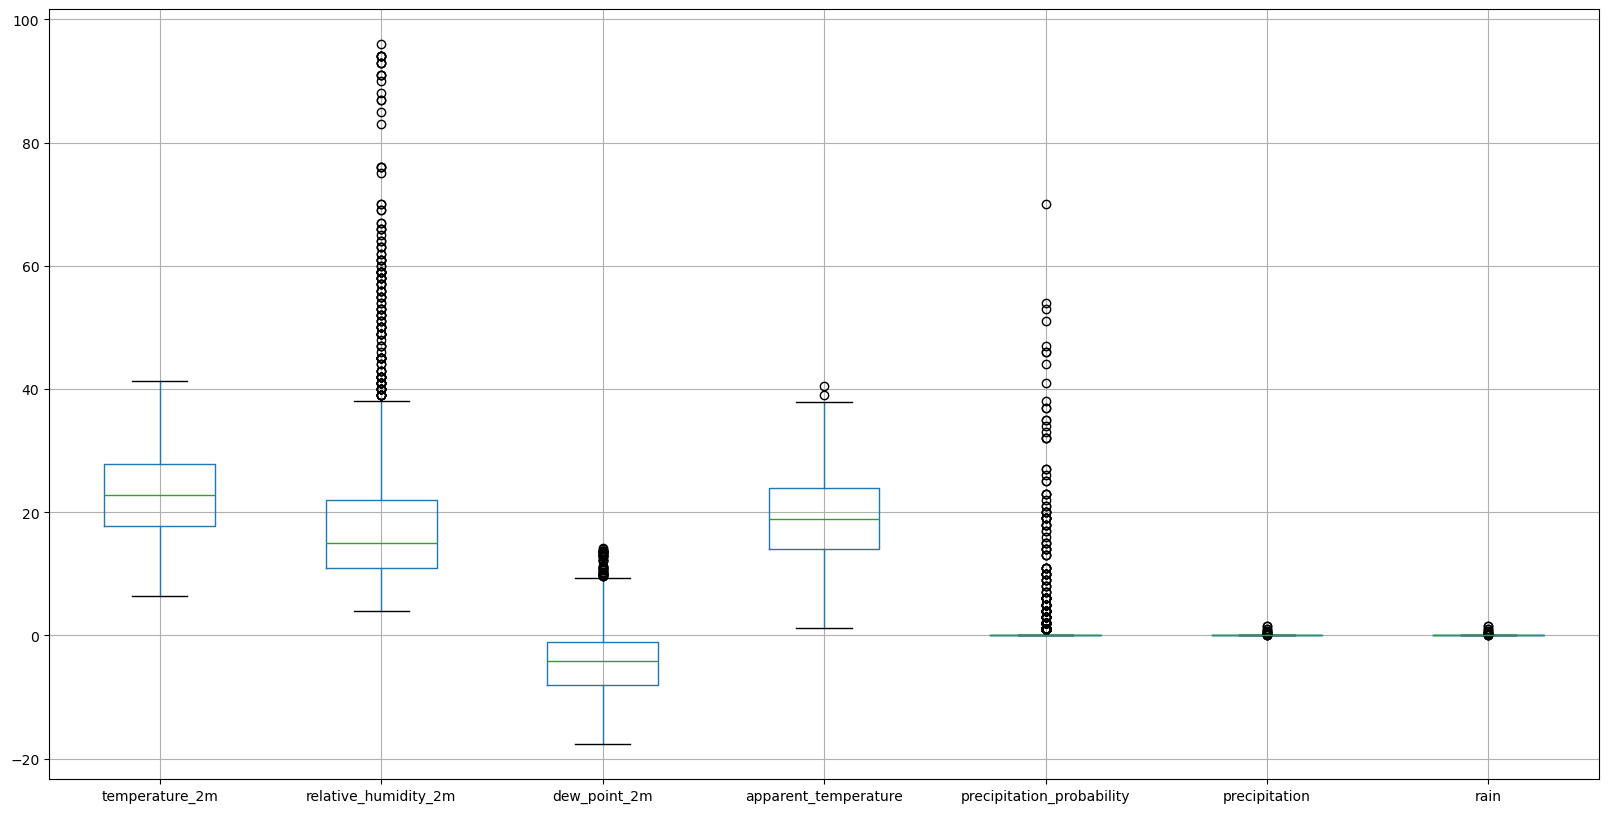

In [102]:
# Boxplot of all Columns
df1[df1.columns[1:9]].boxplot()

<Axes: >

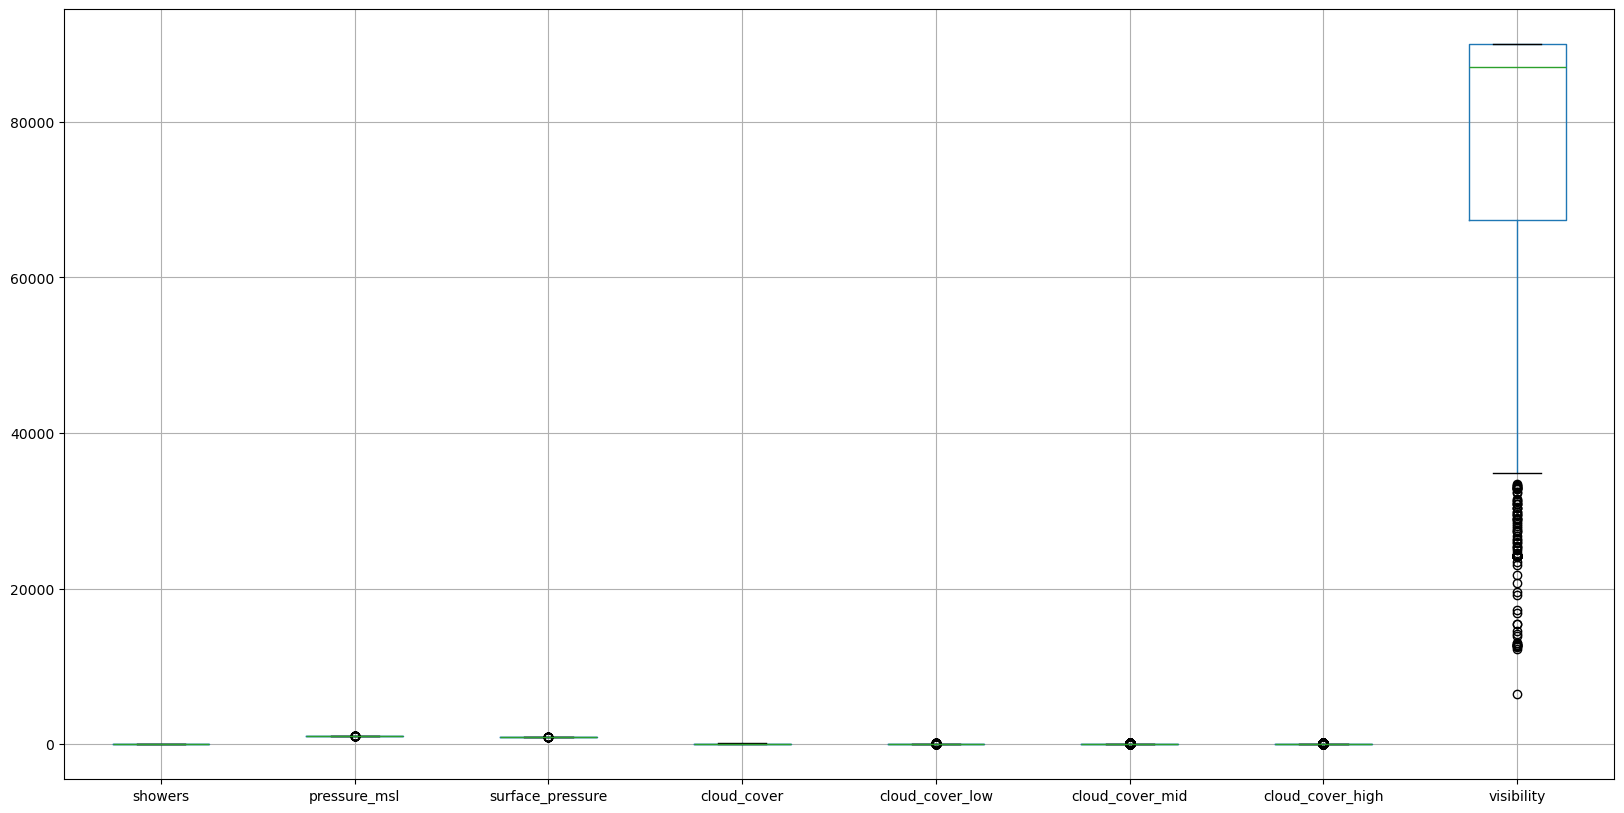

In [103]:
df1[df1.columns[9:17]].boxplot()

<Axes: >

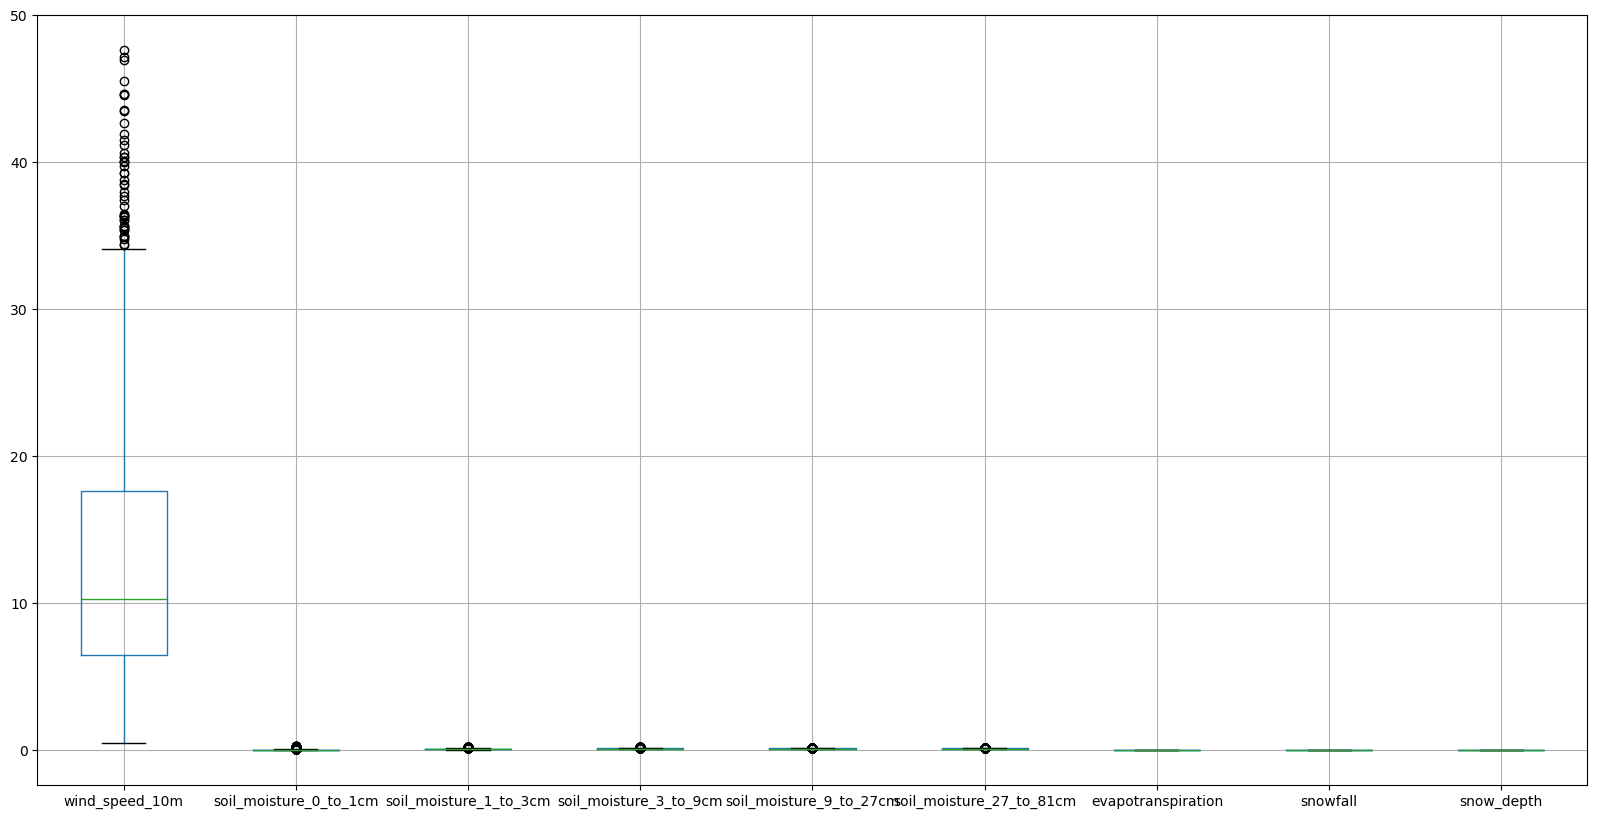

In [104]:
df1[df1.columns[17:26]].boxplot()

<Axes: >

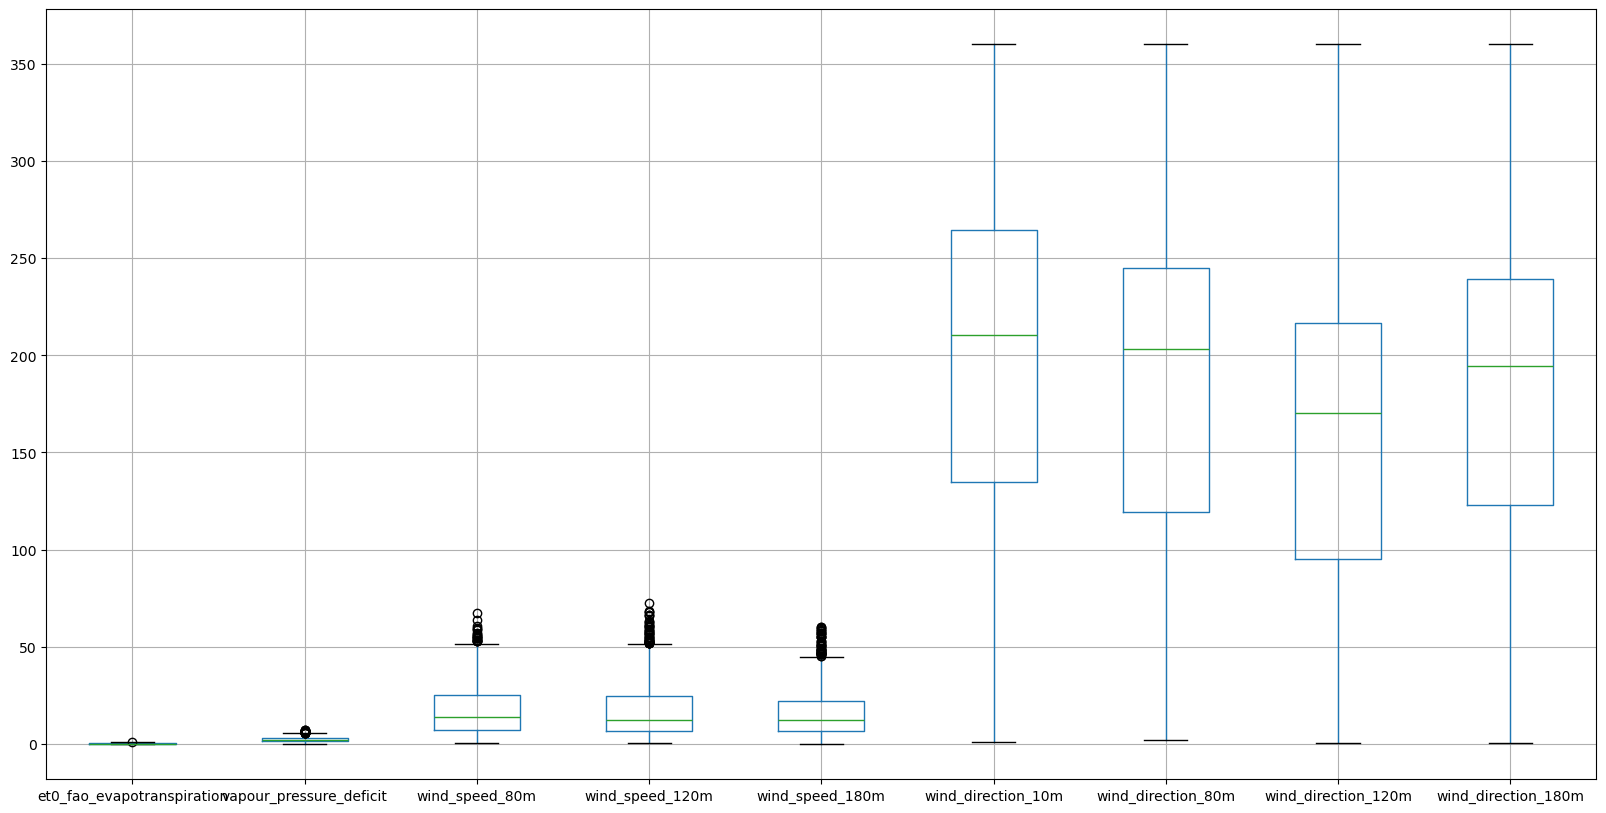

In [105]:
df1[df1.columns[26:35]].boxplot()

<Axes: >

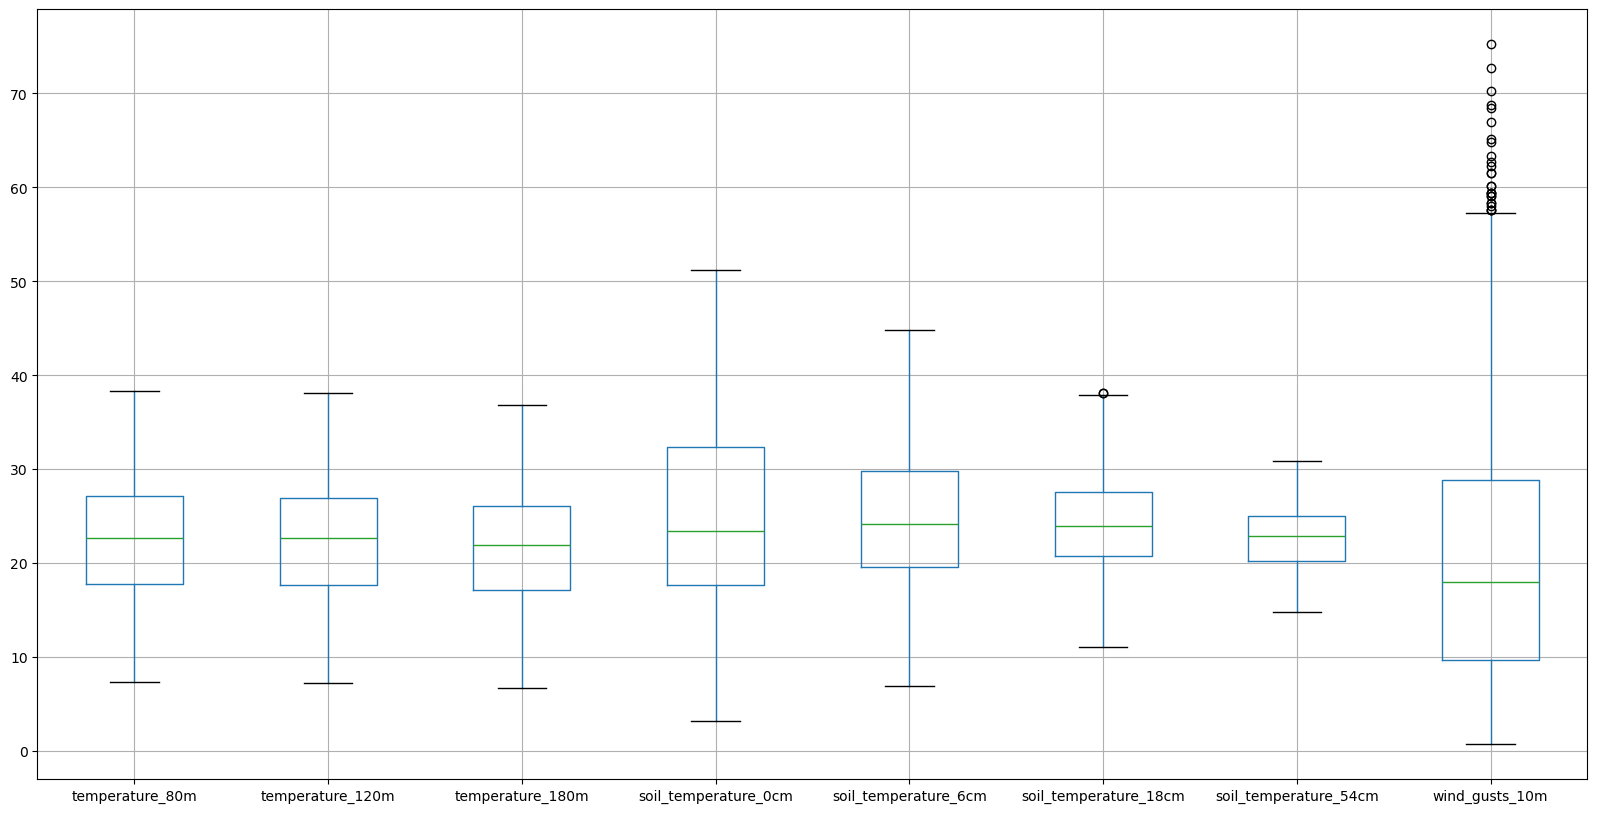

In [106]:
df1[df1.columns[35:]].boxplot()